<center><h1>TENNIS 2023</h1></center> <center><h3> Partie 2</h3></center> &nbsp;  <center><h2>Ajustement des Tier List</h2></center>
&nbsp;    

# Introduction
    
Dans la partie 1 du projet, à partir d'une base de données comprenant tous les matchs du circuit principal de la saison 2023 pour l'ATP et la WTA, j'ai créé une nouvelle base de donnée avec le nombre de victoires et de défaites par surface, niveau de tournoi et niveau d'adversité. Egalement, à partir d'une base de données comprenant des informations sur les joueurs, j'ai créé une nouvelle base de donnée sur le même principe avec les informations qui me seront utiles et composée de tous les joueurs ayant remporté au moins un match sur le circuit principal "bis".
    
Pour bien préciser, j'entends par circuit principal "bis", uniquement les tournois 250, 500, M1000 et GC (pas de United Cup, Billie Jean, FINALS, etc...), ces 4 types de tournois formant évidemment les 4 niveaux de tournois. 
    
Concernant le niveau d'adversité, de manière arbitraire et principalement basé par ma propre connaissance des joueurs, j'ai classé tous ces joueurs dans différentes Tier List allant de I à VII, de manière décroissante (cf partie 1 pour plus de détails). Cela ne résultant que de mon point de vue et de recherches peu approfondies, il est fort probable, pour diverses raisons, que ma Tier List ne soit pas juste. Par conséquent, j'ai décidé d'ajuster ma Tier List et c'est ce que nous verrons dans cette partie 2
    
Dans la partie 1, j'ai créé une base de donnée que j'ai ensuite utilisée dans Tableau Public (**ajouter lien**). J'ai crée une visualisation avec les toutes les données qui me semblent pertinentes et donc avoir un outils, basé sur ma propre TL, me permettant d'ajuster les TL.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
tennis_p = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_player.csv",sep=',')
tennis_wl = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_winlose.csv",sep=',')
tennis_m = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_matches.csv",sep=',')

atp_pr = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\atp_player_rank.csv",sep=',')
wta_pr = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\wta_player_rank.csv",sep=',')

atp_matches = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\atp_matches_cp.csv",sep=',')
wta_matches = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\wta_matches_cp.csv",sep=',')

In [3]:
I_atp = ['Novak Djokovic','Carlos Alcaraz','Daniil Medvedev','Jannik Sinner']

II_atp = ['Andrey Rublev','Stefanos Tsitsipas','Alexander Zverev','Holger Rune','Hubert Hurkacz','Grigor Dimitrov',
          'Karen Khachanov']

III_atp = ['Taylor Fritz','Casper Ruud','Alex De Minaur','Tommy Paul','Frances Tiafoe','Ben Shelton','Nicolas Jarry',
           'Ugo Humbert','Sebastian Korda','Matteo Berrettini']

IV_atp = ['Cameron Norrie','Adrian Mannarino','Francisco Cerundolo','Tallon Griekspoor','Jan Lennard Struff',
          'Alejandro Davidovich Fokina','Lorenzo Musetti','Sebastian Baez','Felix Auger Aliassime','Tomas Martin Etcheverry',
          'Jiri Lehecka','Alexander Bublik','Laslo Djere','Aslan Karatsev','Arthur Fils','Roman Safiullin','Matteo Arnaldi',
          'Jack Draper','Gael Monfils']

V_atp = ['Christopher Eubanks','Borna Coric','Daniel Evans','Alexei Popyrin','Mackenzie Mcdonald','Andy Murray',
         'Sebastian Ofner','Max Purcell','Dusan Lajovic','Lorenzo Sonego','Yoshihito Nishioka','Alexander Shevchenko',
         'Stan Wawrinka','Botic Van De Zandschulp','Yannick Hanfmann','J J Wolf','Miomir Kecmanovic','Jordan Thompson',
         'Daniel Altmaier','Roberto Bautista Agut','Zhizhen Zhang','Marton Fucsovics','Marcos Giron','Aleksandar Vukic',
         'Roberto Carballes Baena','Fabian Marozsan','Thanasi Kokkinakis','Pavel Kotov','Christopher Oconnell',
         'Emil Ruusuvuori','Taro Daniel','Richard Gasquet','Dominic Thiem','Diego Schwartzman','Denis Shapovalov',
         'Pablo Carreno Busta','Marin Cilic','Rafael Nadal']

I_wta = ['Iga Swiatek','Aryna Sabalenka','Cori Gauff','Elena Rybakina','Jessica Pegula']

II_wta = ['Ons Jabeur','Marketa Vondrousova','Karolina Muchova','Maria Sakkari','Barbora Krejcikova','Beatriz Haddad Maia',
          'Madison Keys','Petra Kvitova','Qinwen Zheng','Jelena Ostapenko','Belinda Bencic','Daria Kasatkina','Elina Svitolina']

III_wta = ['Liudmila Samsonova','Veronika Kudermetova','Caroline Garcia','Ekaterina Alexandrova','Victoria Azarenka',
           'Donna Vekic','Sorana Cirstea','Anastasia Potapova','Mirra Andreeva','Paula Badosa']

IV_wta = ['Magda Linette','Anhelina Kalinina','Elise Mertens','Jasmine Paolini','Lesia Tsurenko','Sofia Kenin','Marie Bouzkova',
          'Leylah Fernandez','Petra Martic','Linda Noskova','Anastasia Pavlyuchenkova']

V_wta = ['Emma Navarro','Xin Yu Wang','Lin Zhu','Karolina Pliskova','Marta Kostyuk','Martina Trevisan','Varvara Gracheva',
         'Caroline Dolehide','Katerina Siniakova','Sloane Stephens','Sara Sorribes Tormo','Elisabetta Cocciaretto',
         'Peyton Stearns','Alycia Parks','Anna Blinkova','Arantxa Rus','Danielle Collins','Camila Giorgi','Tatjana Maria',
         'Mayar Sherif','Lucia Bronzetti','Bernarda Pera','Yulia Putintseva','Lauren Davis','Xiyu Wang','Irina Camelia Begu',
         'Anna Kalinskaya','Taylor Townsend','Bianca Andreescu','Amanda Anisimova','Caroline Wozniacki','Daria Saville']

TL_atp = I_atp + II_atp + III_atp + IV_atp + V_atp
TL_wta = I_wta + II_wta + III_wta + IV_wta + V_wta

J'ai récupéré les fichiers sauvegardés dans la partie 1 et mes TL

### Processus d'ajustement

Je vais executer des classifications ascendantes hierarchiques (CAH) et utiliser ma visualisation comme aide à la décision. J'ajusterai les TL une par une, en commençant par la TL VI, puis je m'occuperai, par ordre croissant, des TL I à V. Dès que l'ajustement d'une TL sera terminé, j'enleverai les joueurs appartenant à cette TL et je mettrai à jour, ici et sur Tableau, ma base de données.

Les critères favorables et défavorables changeront selon les TL et certains critères pourront décider automatiquement de l'admission ou du recalage d'un joueur

## Tier List VI
    
La TL VI comprends implicitement la TL VII (les joueurs classés au-delà de la 200e place et n'appartenant pas aux TL V ou moins)
    
Ma vision sur la différence entre la TL V et la TL VI est que la TL V sera composé de joueurs bien encrés dans le circuit principal avec un certains nombre de matchs disputés cette saison et des %W, global et contre les TL V+, convenables. L'expérience peut aussi être un atout pour les joueurs "viellissants" qui pourront bénéficier d'un léger traitement de faveur, toutefois certaines entrées fracassantes sur le circuit, malgrés un nombre léger de matchs, peuvent aussi être discutées. Il peut aussi, il y avoir des cas très spéciaux comme celui de Nadal qui n'a joué que 2 matchs et est quasiment non classé, mais qui, par respect, ne peut pas figurer au-delà de TL 
    
### ATP    

In [4]:
bdd_h = tennis_p.loc[tennis_p['genre']=='H']
bdd_h = pd.merge(bdd_h,tennis_wl,on='player_id',how='inner')
bdd_h = bdd_h.loc[bdd_h['rank']<201]
bdd_h.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_h.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_h = bdd_h.groupby(['name','tier_list']).sum()
bdd_h['M'] = bdd_h['win'] + bdd_h['lose']
bdd_h['%W'] = bdd_h['win'] / bdd_h['M']
bdd_h.drop(columns={'win','lose'},inplace=True)
bdd_h = bdd_h.pivot_table(index='name',columns='tier_list')
bdd_h.fillna(0,inplace=True)
bdd_h.head()

%W                                          \
tier_list                           I        II       III        IV         V   
name                                                                            
Abedallah Shelbayh           0.000000  0.000000  0.000000  0.000000  0.000000   
Adrian Mannarino             0.333333  0.333333  0.400000  0.714286  0.631579   
Albert Ramos                 0.000000  0.000000  0.000000  0.200000  0.666667   
Alejandro Davidovich Fokina  0.000000  0.375000  0.333333  0.555556  0.625000   
Alejandro Tabilo             0.000000  0.000000  0.000000  0.000000  1.000000   

                                              M                              \
tier_list                          VI  VII    I   II   III   IV     V    VI   
name                                                                          
Abedallah Shelbayh           0.400000  0.0  0.0  0.0   0.0  1.0   2.0   5.0   
Adrian Mannarino             0.750000  1.0  3.0  3.0  10.0  7.0  19.0  16.0   
Albert Ramos                 0.318182  0.0  1.0  1.0   0.0  5.0   6.0  22.0   
Alejandro Davidovich Fokina  0.750000  1.0  4.0  8.0   6.0  9.0   8.0  16.0   
Alejandro Tabilo             0.400000  0.0  0.0  0.0   1.0  0.0   1.0   5.0   

                                  
tier_list                    VII  
name                              
Abedallah Shelbayh           0.0  
Adrian Mannarino             3.0  
Albert Ramos                 0.0  
Alejandro Davidovich Fokina  3.0  
Alejandro Tabilo             0.0

Ici j'ai créé un dataframe avec uniquement les hommes et appartenant au top 200 (au delà, cela concerne des joueurs de la TL VII sauf cas exceptionnel) et je n'ai gardé en variables que le nombre de matchs disputés et le taux de victoires pour chaque TL

In [5]:
scal_h = pre.StandardScaler().fit_transform(bdd_h)
scal_h = pd.DataFrame(scal_h,index=bdd_h.index,columns=bdd_h.columns)
scal_h.head()

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


%W                                          \
tier_list                           I        II       III        IV         V   
name                                                                            
Abedallah Shelbayh          -0.338709 -0.631435 -0.801979 -1.147036 -1.518837   
Adrian Mannarino             1.291687  0.607441  0.408812  1.300838  0.590904   
Albert Ramos                -0.338709 -0.631435 -0.801979 -0.461631  0.708112   
Alejandro Davidovich Fokina -0.338709  0.762301  0.207014  0.756866  0.568928   
Alejandro Tabilo            -0.338709 -0.631435 -0.801979 -1.147036  1.821586   

                                                        M                      \
tier_list                          VI       VII         I        II       III   
name                                                                            
Abedallah Shelbayh          -0.667327 -1.218583 -0.708689 -0.881890 -1.022399   
Adrian Mannarino             0.531951  1.028146  0.665575  0.149679  2.583572   
Albert Ramos                -0.947677 -1.218583 -0.250601 -0.538034 -1.022399   
Alejandro Davidovich Fokina  0.531951  1.028146  1.123663  1.868960  1.141184   
Alejandro Tabilo            -0.667327 -1.218583 -0.708689 -0.881890 -0.661802   

                                                                     
tier_list                          IV         V        VI       VII  
name                                                                 
Abedallah Shelbayh          -0.957027 -0.943266 -0.537046 -1.087479  
Adrian Mannarino             0.582670  2.109409  1.563950  0.914739  
Albert Ramos                 0.069437 -0.224990  2.709948 -1.087479  
Alejandro Davidovich Fokina  1.095902  0.134149  1.563950  0.914739  
Alejandro Tabilo            -1.213643 -1.122835 -0.537046 -1.087479

Je normalise le dataframe précédent et je peux mainteant effectuer ma CAH

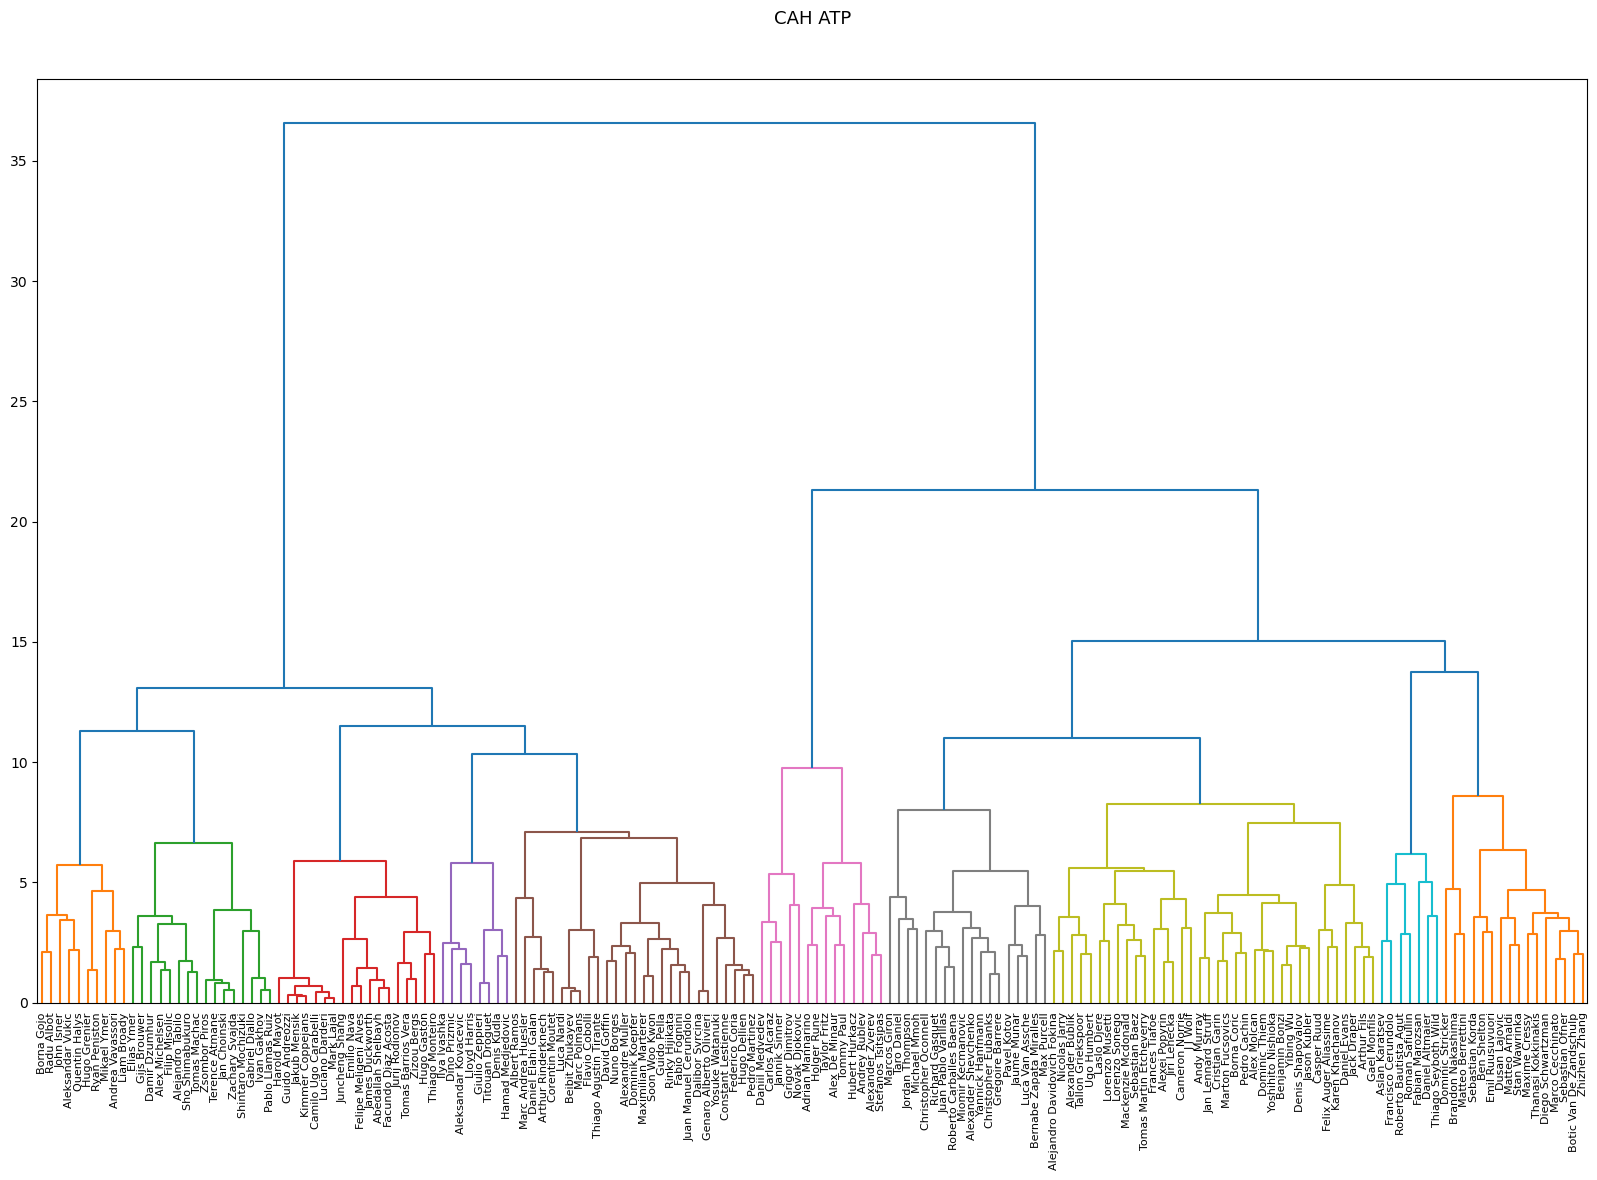

In [6]:
Zh = linkage(scal_h,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH ATP',y=1.05,fontsize=13)

dendrogram(Zh,labels=scal_h.index,leaf_font_size=8,color_threshold=10)

plt.show()

In [7]:
cah_cluster_h = fcluster(Zh,t=10,criterion='distance')
scal_h['cah cluster'] = cah_cluster_h
scal_h['cah cluster'] = scal_h['cah cluster'].astype('category')
scal_h.reset_index(inplace=True)
c1h = scal_h['cah cluster']==1
c2h = scal_h['cah cluster']==2
c3h = scal_h['cah cluster']==3
c4h = scal_h['cah cluster']==4
c5h = scal_h['cah cluster']==5
c6h = scal_h['cah cluster']==6
c7h = scal_h['cah cluster']==7
c8h = scal_h['cah cluster']==8
c9h = scal_h['cah cluster']==9
c10h = scal_h['cah cluster']==10

cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_h = cah_cluster_mean_h.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_h

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\1046996114.py:16: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T


In [8]:
len(TL_atp)

78

In [9]:
len(scal_h['name'][c6h+c7h+c8h+c9h+c10h])

91

On observe qu'il y a déjà une première grande séparation, avec à gauche du G1 au G5 quasiment que du rouge (moins de matchs joués et des taux de victoires faibles) et avec à droite du G6 au G10 principalement du vert.

On devrait logiquement retrouver les "mauvais" joueurs à gauche et les meilleurs à droite. Il y a 91 joueurs à droite et j'ai classé 78 joueurs appartenant aux TL I à V

Je vais d'abord m'occuper des groupes de gauche et nous verrons si certains joueurs de ma TL I-V en font partie

Comme les caractéristiques de ces groupes sont essentiellement négatives (on remarque qu'ils se différencient par un %W très élevé contre une TL particulière)

### Groupes 1 à 5

In [10]:
scal_h['name'][c1h+c2h+c3h+c4h+c5h][scal_h['name'][c1h+c2h+c3h+c4h+c5h].isin(TL_atp)==True]

6    Aleksandar Vukic
Name: name, dtype: object

Il n'y a qu'un seul joueur faisant partie de la TL I-V, Vukic.

**Vukic - 61e 28M 39%W**

C'est un joueur que je connais de nom, mais peu en réalité. C'est probablement son classement et certains résultats récents (finale au 250 d'Atlanta en fin septembre) qui m'ont poussé à le mettre en TL V.

En 0-2 TL II, 2-1 TL III et 0-4 TL IV, puis 6-3 TL V, 2-5 TL VI et 1-2 TL VII

Ici, on a un profil d'un joueur très irrégulier qui a réussi quelques perfs et esquissé pas mal de contre-perfs également. C'est un joueur qui ne doit pas être sous-estimé, mais c'est catastrophique face à la TL VI et son %W, sous les 40, est très léger et ce n'est pas suffisant pour la TL V

**<font color='red'> Direction TL VI**
    
Etant donné que c'est le seul joueur de ma TL I-V présent dans les groupes de gauche, on peut supposer que tous les autres joueurs n'aspirent pas à la TL V (le risque d'erreur étant minime et les cas serait de toutes façons très disputables)
    
### Groupes 6 à 10
    
On a vu qu'il y avait une petite quinzaine de joueurs hors TL I-V qui font partie de ces groupes
    
Pour commencer, il y a le G6 qui est de loin le meilleur groupe, ensuite c'est un peu plus contrasté. Le G8 se manifeste par un bon nombre de matchs et des %W plutôt bons (sauf TL I). Le G10 avec un peu de moins de matchs et des résulats plutôt bons, notamment contre les TL II et III, montre une défaillance contre la TL VII (mais avec très peu matchs). Le G9 lui va se démarquer avec un %W extrêment élevé contre la TL I. Pour finir le G7, s'il a également un bon nombre de matchs joués, va indiquer des %W moyens et clairement en dessous de ces voisins, il semble être le vilain petit canard des groupes de droite.
    
Le G6 ne devrait posséder aucun joueur hors TL I-V, alors que le G7, lui, devrait en posséder le plus. 

In [11]:
scal_h['name'][c6h][scal_h['name'][c6h].isin(TL_atp)==False]

Series([], Name: name, dtype: object)

In [12]:
scal_h['name'][c6h][scal_h['name'][c6h].isin(TL_atp)==True]

1        Adrian Mannarino
7          Alex De Minaur
12       Alexander Zverev
16          Andrey Rublev
31         Carlos Alcaraz
43        Daniil Medvedev
72        Grigor Dimitrov
77            Holger Rune
78         Hubert Hurkacz
90          Jannik Sinner
126        Novak Djokovic
147    Stefanos Tsitsipas
150          Taylor Fritz
160            Tommy Paul
Name: name, dtype: object

En effet il n'ay aucun joueur de la TL VI+ et on y trouve les meilleurs joueurs du circuit

In [13]:
scal_h['name'][c7h][scal_h['name'][c7h].isin(TL_atp)==False]

24     Bernabe Zapata Miralles
71            Gregoire Barrere
92                 Jaume Munar
97         Juan Pablo Varillas
108            Luca Van Assche
122               Michael Mmoh
Name: name, dtype: object

In [14]:
scal_h['name'][c7h][scal_h['name'][c7h].isin(TL_atp)==True]

11        Alexander Shevchenko
33         Christopher Eubanks
34        Christopher Oconnell
95             Jordan Thompson
114               Marcos Giron
119                Max Purcell
124          Miomir Kecmanovic
129                Pavel Kotov
134            Richard Gasquet
137    Roberto Carballes Baena
149                Taro Daniel
162           Yannick Hanfmann
Name: name, dtype: object

Dans le "pire" groupe de droite, on a 6 joueurs de la TL VI+ et 12 de la TL I-V. Comme ce groupe semble être le plus indécis, je vais regarder au cas par cas (plus ou moins rapidement en fonction des stats globals)

&nbsp;  

Pour ceux de la TL VI+ :

**Zapata - 89e 39M 44%W**

Un pur terrien qui n'a perfomé uniquement sur cette surface (16-11 sinon 1-11). Globalement, c'est très moyen, il y a aussi un 4-3 TL VII très moche, pour l'instant la TL ne prends pas en compte les différentes surfaces et ce n'est vraiment pas suffisant  
**Barrere - 84e 45M 47%W**

Un bon bilan en TL VI+ 14-5, mais un bilan en TL V- léger malgrés quelques bonnes perfs. Ici on a un cas se situant à la limite des TL V-VI, en soit on peut le mettre en TL V ,c'était un joueur bien implanté dans le circuit de 2023

**<font color='green'> Direction TL V**
    
**Munar - 85e 32M 44%W**
    
Un autre pur terrien (12-10 sinon 2-8), à l'image d'un Zapata, c'est globalement très moyen et on a aussi un 3-3 TL VII très moche.   
    
**Varillas - 83e 34M 44%W**
    
Une fois n'est pas coutume, de nouveau un terrien avec également 44%W global, pour lui non plus ce n'est pas suffisant pour la TL V avec des résultats très négatifs, 2-11 en TL IV-    
    
**Van Assche - 66e 26M 35%W**
    
Recalé    

**Mmoh - 122e 22M 59%W**

Déjà le %W est très fort, il y a également un 3-0 en TL II (avec un bémol - Zverev qui faisait son retour à l'AO après plus de 6 mois à cause d'une très lourde blessure et Khachanov son 1er match à l'US après 3 mois de blessures). Egalement en 3-0 TL VII, sinon cela reste du ± du 50/50 pour les TL III-VI

En soit il mérite sa place en TL V mais attention il a peu de matchs et est très irrégulier

**<font color='green'> Direction TL V**
    
&nbsp;      
    
Pour ceux de la TL I-V :
    
**Shevchenko 49e 32M 50%W**
    
Un joueur que l'on a un peu plus découvert cette saison, certes irrégulier mais qui mérite totalement sa place en TL V      
    
**Eubanks - 34e 41 51%W**
    
On l'a aussi bien découvert cette saison avec notamment un QF à Wimbledon perdu en 5 sets contre Medvedev, place en TL V méritée    
    
**O'Connell - 68e 41M 44%**

En 2-11 TL IV-, 7-9 TL V, 5-3 TL VI et 4-0 TL VII

Ici, on a un joueur présent sur le circuit principal avec 41 matchs, un bilan très mauvais face aux joueurs meilleurs, moyen contre sa TL et assez bon contre les TL plus faible. A la frontière TL V-VI, ça me parait un peu faiblard malheuresement 

**<font color='red'> Direction TL VI**
    
**Thompson - 56e 39M 49%W**
    
Un habitué du circuit, notamment très fort sur gazon, il est très irréguliers mais il peut poser des problèmes à n'importe qui et est typiquement un joueur de la TL V    
    
**Giron - 59e 53M 45%W**
    
Tout comme Thompson, on le connait bien. 53 matches sur le circuit principal c'est énorme, bon le %W est un peu faible, néanmoins ça reste un joueur ± problèmatique et comme beaucoup d'autres joueurs de cette TL V, il pâtit d'une forte irrégularité mais a sa place en TL V    
    
**Purcell - 45e 29M 34%W**

Comment a-t-il atteint cette place de 45e est une bonne question, par contre savoir s'il mérite sa place en TL V n'en est pas une 

**<font color='red'> Direction TL VI**
    
**Kecmanovic - 55e 52M 44%W**
    
Auteur d'une très bonne saison 2022 lui permettant d'obtenir son meilleur classement en janvier 2023, 27e, la suite fut un peu plus difficile. Avec des stats globals similaires à celles de Giron, on a affaire à un joueur très présent sur le circuit, un peu plus régulier face aux moins forts, mais du coup plutôt mauvais contre plus forts, on est proche du cas O'connell, heuresement pour lui, sa forte présence sur le circuit lui permettra de garder sa place en TL V    
    
**Kotov - 67e 29M 52%W**
    
Une nouvelle tête du circuit cette année, c'est assez solide quand favoris, un bon joueur de la TL V.    
    
**Gasquet - 76e 38M 37%**
    
Un joueur avec une des longévités la plus importante de l'ATP dans le top 100, mais à 36 ans, les résultats en 2023 sont devenus vraiment moins bons et sonnent la fin de la TL V.
    
**<font color='red'> Direction TL VI**        

**Carballes - 63e 39M 41%W**

Un terrien (12-11 sinon 4-12), en 3-11 TL IV-, 3-7 TL V et 10-5 TL VI+, c'est mauvais contre les joueurs de la TL V-, pas exceptionnel non plus contre la TL VI+.    
    
**<font color='red'> Direction TL VI** 

**Daniel - 75e 26M 38%W**
    
Même si on le connait et on le retrouve de temps en temps pour faire un bon coup, ce n'est malheuresement pas assez bon
    
**<font color='red'> Direction TL VI**  
    
**Hanfmann - 52e 43M 49%W**
    
Un terrien (14-10 sinon 7-12), cependant il semble avoir un peu plus d'armes que ceux d'avant, en 6-6 TL II-III il a posé pas mal de problèmes à de très bons joueurs, c'est pas terrible ensuite avec 1-4 TL IV 3-5 TL V 9-5 TL VI et 3-0 TL VII, mais globalement ça reste sérieux et dangereux, il a sa place en TL V  

In [15]:
scal_h['name'][c8h][scal_h['name'][c8h].isin(TL_atp)==False]

9         Alex Molcan
23     Benjamin Bonzi
37     Cristian Garin
91       Jason Kubler
130      Pedro Cachin
163         Yibing Wu
Name: name, dtype: object

In [16]:
scal_h['name'][c8h][scal_h['name'][c8h].isin(TL_atp)==True]

3      Alejandro Davidovich Fokina
10                Alexander Bublik
14                  Alexei Popyrin
17                     Andy Murray
18                     Arthur Fils
25                     Borna Coric
29                  Cameron Norrie
32                     Casper Ruud
42                    Daniel Evans
46                Denis Shapovalov
50                   Dominic Thiem
61           Felix Auger Aliassime
64                  Frances Tiafoe
67                    Gael Monfils
84                        J J Wolf
85                     Jack Draper
89              Jan Lennard Struff
93                    Jiri Lehecka
100                Karen Khachanov
102                    Laslo Djere
105                Lorenzo Musetti
106                 Lorenzo Sonego
110             Mackenzie Mcdonald
116               Marton Fucsovics
125                  Nicolas Jarry
140                 Sebastian Baez
148              Tallon Griekspoor
159        Tomas Martin Etcheverry
161                 

Dans ce G8, il y a énormément de joueurs appartenant à ma TL V- et en regardant le nom des joueurs, je ne vois aucun cas suceptible de faire de gros débats, on va donc se pencher uniquement sur les 6 joueurs qui n'en font pas partie

**Molcan 113e 29M 48%W**

En 0-6 TL II, 1-3 TL IV, 7-3 TL V, 4-3 TL VI et 2-0 TL VII. On a un joueur qui ne parvient pas à trouver la faille contre les meilleurs joueurs du circuit, mais qui s'en sort plutôt bien contre les joueurs à sa portée

**<font color='green'> Direction TL V** 

**Bonzi - 73e 30M 50%W**

Des résultats mitigés en TL IV-V, mais de très bon résultats en TL VI+, de plus il a un ratio de 50%W avec 30 matchs, il a sa place en TL V

**<font color='green'> Direction TL V**
    
**Garin - 87e 34M 56%W**

En 3-10 TL IV-, 5-2 TL V, 9-3 TL VI et 2-0 TL VII, il est bon contre la TL V+ comme Molcan et a plus de 50%W

**<font color='green'> Direction TL V**
    
**Kubler - 101e 23M 39%W**
    
Recalé    
    
**Cachin - 70e 36M 42%W**
  
Là c'est du pur de chez pur terrien (14-12 sinon 1-9), je ne vais pas trop m'attarder dessus, même si ce n'est pas catastrophique à première vue, il n'a pas le niveau TL V    

**Wu - 116e 26M 50%W**

Cas similaire à celui de Bonzi et souvent blessé cette saison, d'où son classement 

**<font color='green'> Direction TL V**

In [17]:
scal_h['name'][c9h][scal_h['name'][c9h].isin(TL_atp)==False]

155    Thiago Seyboth Wild
Name: name, dtype: object

In [18]:
scal_h['name'][c9h][scal_h['name'][c9h].isin(TL_atp)==True]

20            Aslan Karatsev
40           Daniel Altmaier
56           Fabian Marozsan
65       Francisco Cerundolo
136    Roberto Bautista Agut
138          Roman Safiullin
Name: name, dtype: object

Peu de joueurs constituent ce G9 et un seul n'appartient pas à la TL I-V. N'oublions que c'est un groupe définit par un %W extrêmement élevé contre la TL I. Je vais évidemment regarder le cas Seyboth Wild, mais également les autres cas, sauf Cerundolo et Safiullin pour lesquels je n'ai aucun doute

**Seyboth Wild - 80e 9M 33%W**

Victorieux face à Medvedev lors du 1er tour de RG, sinon merci.

&nbsp;  

**Altmaier - 57e 35M 37%W**

Encore un terrien (10-8 sinon 3-14), il parvient à atteindre les QF du M1000 de Madrid, mis à part ça merci

**<font color='red'> Direction TL VI**

**Maroszan - 64e 18M 61%W**
    
Joueur que l'on aura certes peu vu, mais qui aura fait de grosses étincelles dès lors qu'il mettait le pieds sur un court du circuit principal   

**Bautista - 36e 38M 45%W**
    
Un vieux briscard qui aura été longtemps dans le haut du classement de l'ATP, malheuresement la pente descendante a commencé cette saison. Il a montré de très fortes faiblesses contre les meilleurs joueurs avec 2-8 TL III-, sinon ça se bat encore avec des résultats équilibré sur la TL IV+, c'est très irrégulier mais il mérite encore sa place en TL V, à voir si ce sera sa dernière année dedans    

In [19]:
scal_h['name'][c10h][scal_h['name'][c10h].isin(TL_atp)==False]

28     Brandon Nakashima
49      Dominic Stricker
113     Marco Cecchinato
120        Maxime Cressy
Name: name, dtype: object

In [20]:
scal_h['name'][c10h][scal_h['name'][c10h].isin(TL_atp)==True]

22                 Ben Shelton
27     Botic Van De Zandschulp
47           Diego Schwartzman
52               Dusan Lajovic
54             Emil Ruusuvuori
117             Matteo Arnaldi
118          Matteo Berrettini
141            Sebastian Korda
142            Sebastian Ofner
146              Stan Wawrinka
152         Thanasi Kokkinakis
167              Zhizhen Zhang
Name: name, dtype: object

Ce dernier groupe se définit par un %W extrêmement faible face à la TL VII, tout comme le G9 avec une caractéristique très particulière, il peut se cacher des cas douteux

Tout d'abord, on va regarder les 4 joueurs de la TL VI+

**Nakashima - 133e 33M 39%W**

Recalé

**Stricker - 92e 13M 54%W**

Certes le ratio est positif, mais sur très peu de matchs et malheuresement ce ne sera pas suffisant pour prétendre à la TL V.

**Cecchinato - 200e 25M 44%W**

Un pur terrien (10-9 sinon 1-6), les résultats sont très mitigés et sa 200e place sera rédhibitoire pour une place en TL V

**Cressy - 124e 29M 31%W**

Recalé

&nbsp;  

Puis on va checké rapidement les cas les moins évidents de ceux appartenant a ma TL V

**Van de Zandschulp - 51e 42 45%W**

Un joueur très irrégulier qui est devenu un joueur récurrent du circuit principal depuis 2 saisons, les résultats ne sont pas fameux mais il peut poser de temps en temps des problèmes contre des bons joueurs et mérite sa place en TL V

**Schwartzman - 112e 35M 37%W**

Longtemps dans l'élite du classement (top 20), depuis 2023 il n'est plus que l'ombre de lui même avec un bilan de 1-12 Tier III- et 12-10 tier IV+, malheureusement ce n'est pas assez bon pour figurer en TL V

**<font color='red'> Direction TL VI**

**Ruusuvuori - 69e 44M 48%W**
    
C'est globalement moyen, mais ce sont surtout ses lacunes contre les TL I-II qui ressortent avec un 2-9. Sinon il est en 5-6 TL III-IV, 7-4 TL V et 7-4 TL VI, ce qui est plutôt correct et mérite sa place en TL V      

**Ofner - 43e 26M 50%W**
    
RAS    

**Kokkinakis - 65e 29M 48%W**
    
Extrêmement dominé par les TL I-III avec 1-9, il se rattrape bien ensuite avec 1-1 Tl IV, 6-3 TL V, 6-1 TL VI et 0-1 TL VII, de quoi assurer sa place en TL V même si ce n'est pas parfait, en témoigne sa défaite en TL VII     

**Zhang - 58e 35M 51%W**
    
RAS 

&nbsp;    
    
### Récapitulatif
    
<font color='green'> **Promotion en TL V :**
 
- Barrere
- Mmoh    
- Molcan
- Bonzi
- Garin    
- Wu
    
<font color='red'> **Relégation en TL VI :**
    
- Vukic
- O'Connell    
- Purcell
- Gasquet
- Carballes
- Daniel    
- Altmaier
- Schwartzman
        
L'ajustement de la TL VI est terminée, j'ai juste donc à modifier les joueurs appartenant à TL V (les autres TL n'étant pas concernés)

In [21]:
V_atp = ['Christopher Eubanks','Borna Coric','Daniel Evans','Alexei Popyrin','Mackenzie Mcdonald','Andy Murray',
         'Sebastian Ofner','Dusan Lajovic','Lorenzo Sonego','Yoshihito Nishioka','Alexander Shevchenko',
         'Stan Wawrinka','Botic Van De Zandschulp','Yannick Hanfmann','J J Wolf','Miomir Kecmanovic','Jordan Thompson',
         'Roberto Bautista Agut','Zhizhen Zhang','Marton Fucsovics','Marcos Giron','Fabian Marozsan','Thanasi Kokkinakis',
         'Pavel Kotov','Emil Ruusuvuori','Dominic Thiem','Denis Shapovalov','Pablo Carreno Busta','Marin Cilic','Rafael Nadal',
         'Cristian Garin','Benjamin Bonzi','Alex Molcan','Yibing Wu','Gregoire Barrere','Michael Mmoh']
TL_atp = I_atp+II_atp+III_atp+IV_atp+V_atp

### WTA

En utilisant exactement la même méthode pour l'ATP, on va ajuster la TL VI de la WTA 

In [22]:
bdd_f = tennis_p.loc[tennis_p['genre']=='F']
bdd_f = pd.merge(bdd_f,tennis_wl,on='player_id',how='inner')
bdd_f = bdd_f.loc[bdd_f['rank']<201]
bdd_f.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_f.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_f = bdd_f.groupby(['name','tier_list']).sum()
bdd_f['M'] = bdd_f['win'] + bdd_f['lose']
bdd_f['%W'] = bdd_f['win'] / bdd_f['M']
bdd_f.drop(columns={'win','lose'},inplace=True)
bdd_f = bdd_f.pivot_table(index='name',columns='tier_list')
bdd_f.fillna(0,inplace=True)
bdd_f.head()

%W                                                     \
tier_list                I        II  III    IV         V        VI       VII   
name                                                                            
Aliaksandra Sasnovich  0.0  0.222222  0.2  0.20  0.666667  0.750000  0.000000   
Alina Korneeva         0.0  0.000000  0.0  0.00  0.000000  0.500000  0.000000   
Aliona Bolsova         0.0  0.000000  0.0  0.00  0.000000  0.000000  1.000000   
Alize Cornet           0.0  0.333333  0.0  0.00  0.200000  0.533333  0.666667   
Alycia Parks           0.0  0.000000  0.5  0.25  0.333333  0.500000  1.000000   

                         M                                 
tier_list                I   II  III   IV    V    VI  VII  
name                                                       
Aliaksandra Sasnovich  2.0  9.0  5.0  5.0  3.0  12.0  0.0  
Alina Korneeva         0.0  0.0  0.0  0.0  0.0   2.0  0.0  
Aliona Bolsova         0.0  0.0  0.0  0.0  1.0   3.0  1.0  
Alize Cornet           1.0  3.0  1.0  2.0  5.0  15.0  3.0  
Alycia Parks           0.0  5.0  4.0  4.0  6.0  14.0  1.0

In [23]:
scal_f = pre.StandardScaler().fit_transform(bdd_f)
scal_f = pd.DataFrame(scal_f,index=bdd_f.index,columns=bdd_f.columns)
scal_f.head()

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


%W                                          \
tier_list                     I        II       III        IV         V   
name                                                                      
Aliaksandra Sasnovich -0.403853  0.110339 -0.165209 -0.296296  0.795158   
Alina Korneeva        -0.403853 -0.688964 -0.742906 -0.855613 -1.242204   
Aliona Bolsova        -0.403853 -0.688964 -0.742906 -0.855613 -1.242204   
Alize Cornet          -0.403853  0.509990 -0.742906 -0.855613 -0.630995   
Alycia Parks          -0.403853 -0.688964  0.701337 -0.156467 -0.223523   

                                                  M                      \
tier_list                    VI       VII         I        II       III   
name                                                                      
Aliaksandra Sasnovich  0.612997 -1.266488  0.146212  1.636461  1.082271   
Alina Korneeva        -0.343571 -1.266488 -0.761839 -0.899417 -0.934171   
Aliona Bolsova        -2.256708  0.924975 -0.761839 -0.899417 -0.934171   
Alize Cornet          -0.216028  0.194487 -0.307814 -0.054124 -0.530883   
Alycia Parks          -0.343571  0.924975 -0.761839  0.509404  0.678983   

                                                               
tier_list                    IV         V        VI       VII  
name                                                           
Aliaksandra Sasnovich  1.265237 -0.545575  0.790020 -0.996558  
Alina Korneeva        -1.001432 -1.278993 -1.351382 -0.996558  
Aliona Bolsova        -1.001432 -1.034521 -1.137241 -0.288161  
Alize Cornet          -0.094765 -0.056629  1.432440  1.128632  
Alycia Parks           0.811903  0.187844  1.218300 -0.288161

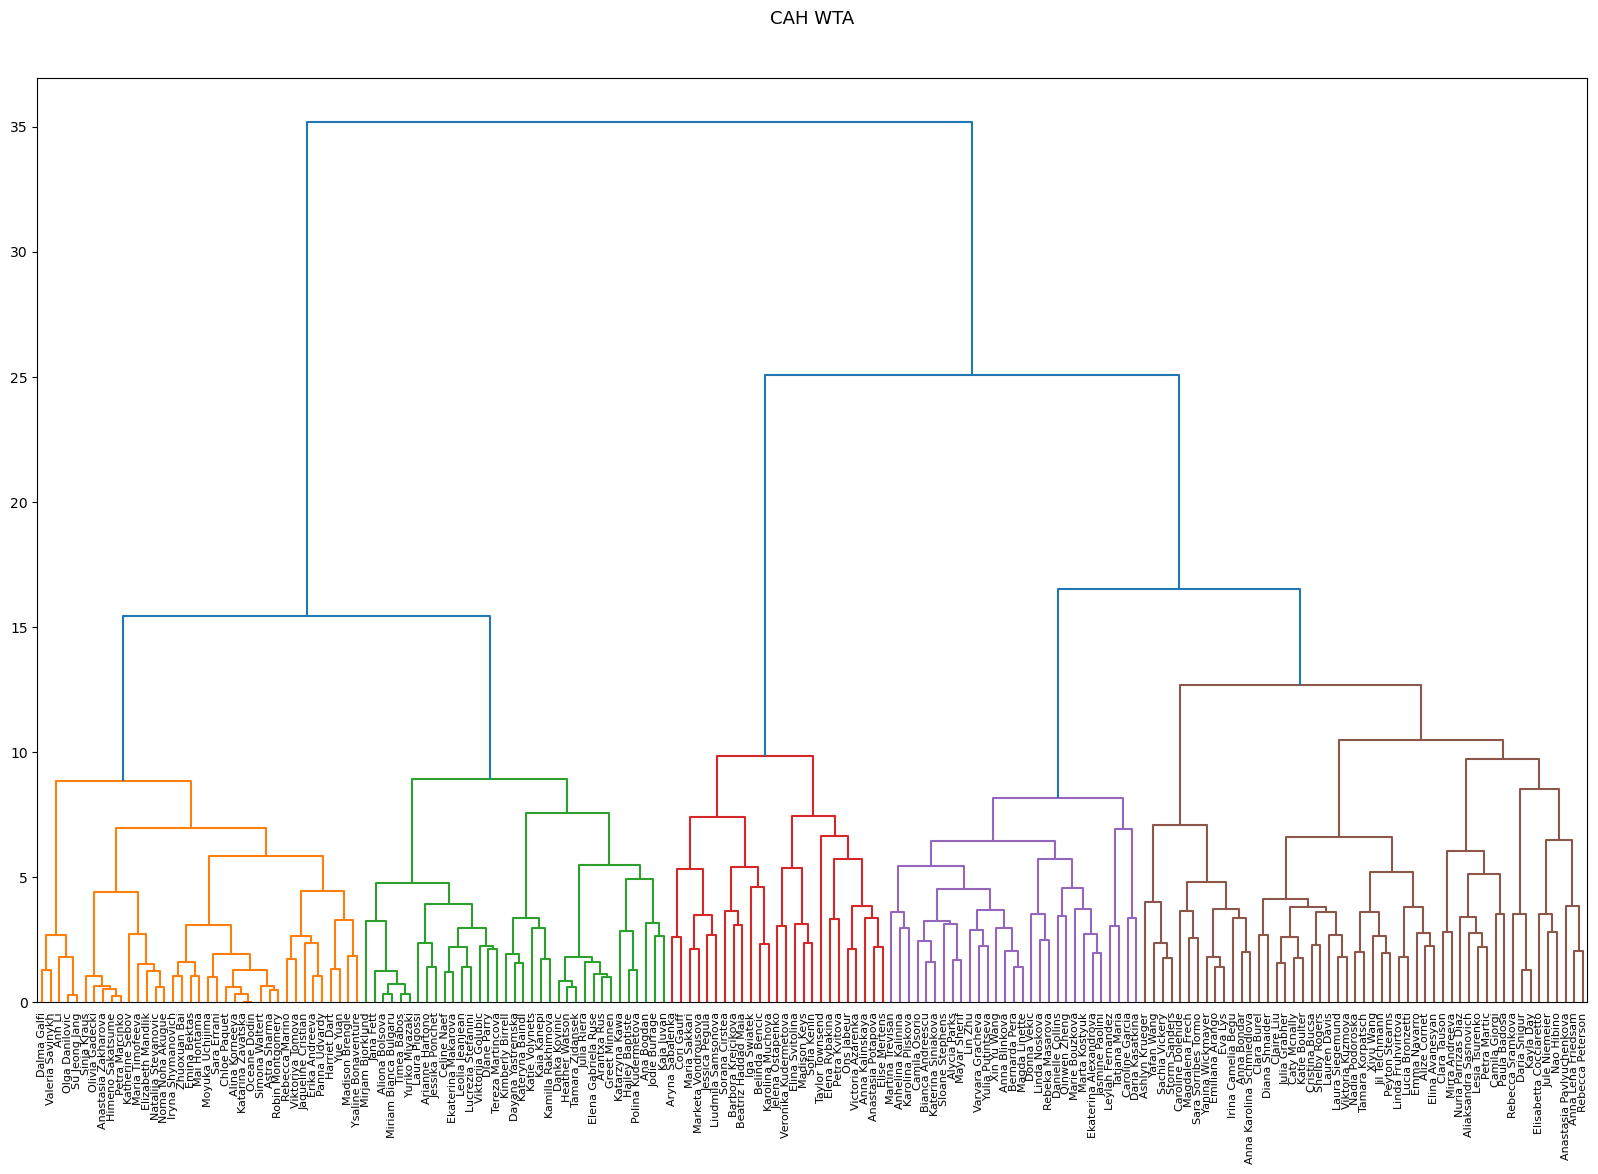

In [24]:
Zf = linkage(scal_f,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH WTA',y=1.05,fontsize=13)

dendrogram(Zf,labels=scal_f.index,leaf_font_size=8,color_threshold=14)

plt.show()

In [25]:
cah_cluster_f = fcluster(Zf,t=14,criterion='distance')
scal_f['cah cluster'] = cah_cluster_f
scal_f['cah cluster'] = scal_f['cah cluster'].astype('category')
scal_f.reset_index(inplace=True)
c1f = scal_f['cah cluster']==1
c2f = scal_f['cah cluster']==2
c3f = scal_f['cah cluster']==3
c4f = scal_f['cah cluster']==4
c5f = scal_f['cah cluster']==5

cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_f = cah_cluster_mean_f.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_f

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\1659181998.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T


In [26]:
len(TL_wta)

71

In [27]:
len(scal_h['name'][c3f+c4f])

53

Le G3 se démarque avec des caractéristiques très positives dans l'ensemble, ensuite viens le G4 avec également des caractéristiques positives, puis le G5 où c'est plutôt neutre et pour finir, le G1 et le G2 avec des caractéristiques négatives

Les G3 et G4 comportent 53 joueuses, on peut espérer qu'ils ne comportent que des joueuses de la TL I-V, à l'inverses des G1 et G2 qui ne devraient en comporter aucun

### Groupes 1 et 2

In [28]:
scal_f['name'][c1f+c2f][scal_f['name'][c1f+c2f].isin(TL_wta)==True]

16    Arantxa Rus
Name: name, dtype: object

Une seule joueuse fait partie de ma TL I-V

**Rus - 51e 16M 44%W**

On remarque qu'elle a joué peu de matchs sur le circuit principal, de plus le %W n'est pas terrible, il y a en effet une erreur de ma part avec cette joueuse qui a plutôt sa place dans la TL VI

<font color='red'> **Direction TL VI**
    
### Groupes 3 et 4     

In [29]:
scal_f['name'][c3f+c4f][scal_f['name'][c3f+c4f].isin(TL_wta)==False]

27       Camila Osorio
142    Rebeka Masarova
Name: name, dtype: object

Deux joueuses hors de ma TL I-V sont présentes

**Osorio - 80e 30M 57%W**

Il y a erreur de ma part ici, les stats globales sont excellentes

**<font color='green'> Direction TL V**

**Masarova - 65e 28M 57%W**
    
Une autre erreur avec un cas identique 
    
**<font color='green'> Direction TL V**

### Groupe 5 
    
Ce dernier groupe, le plus indécis, comporte un bon nombre de joueuse, de plus il reste environ une vingtaine de joueuses devant valider leur place en TL I-V, je vais par conséquent refaire une CAH sur ce G5 pour y voir plus  

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


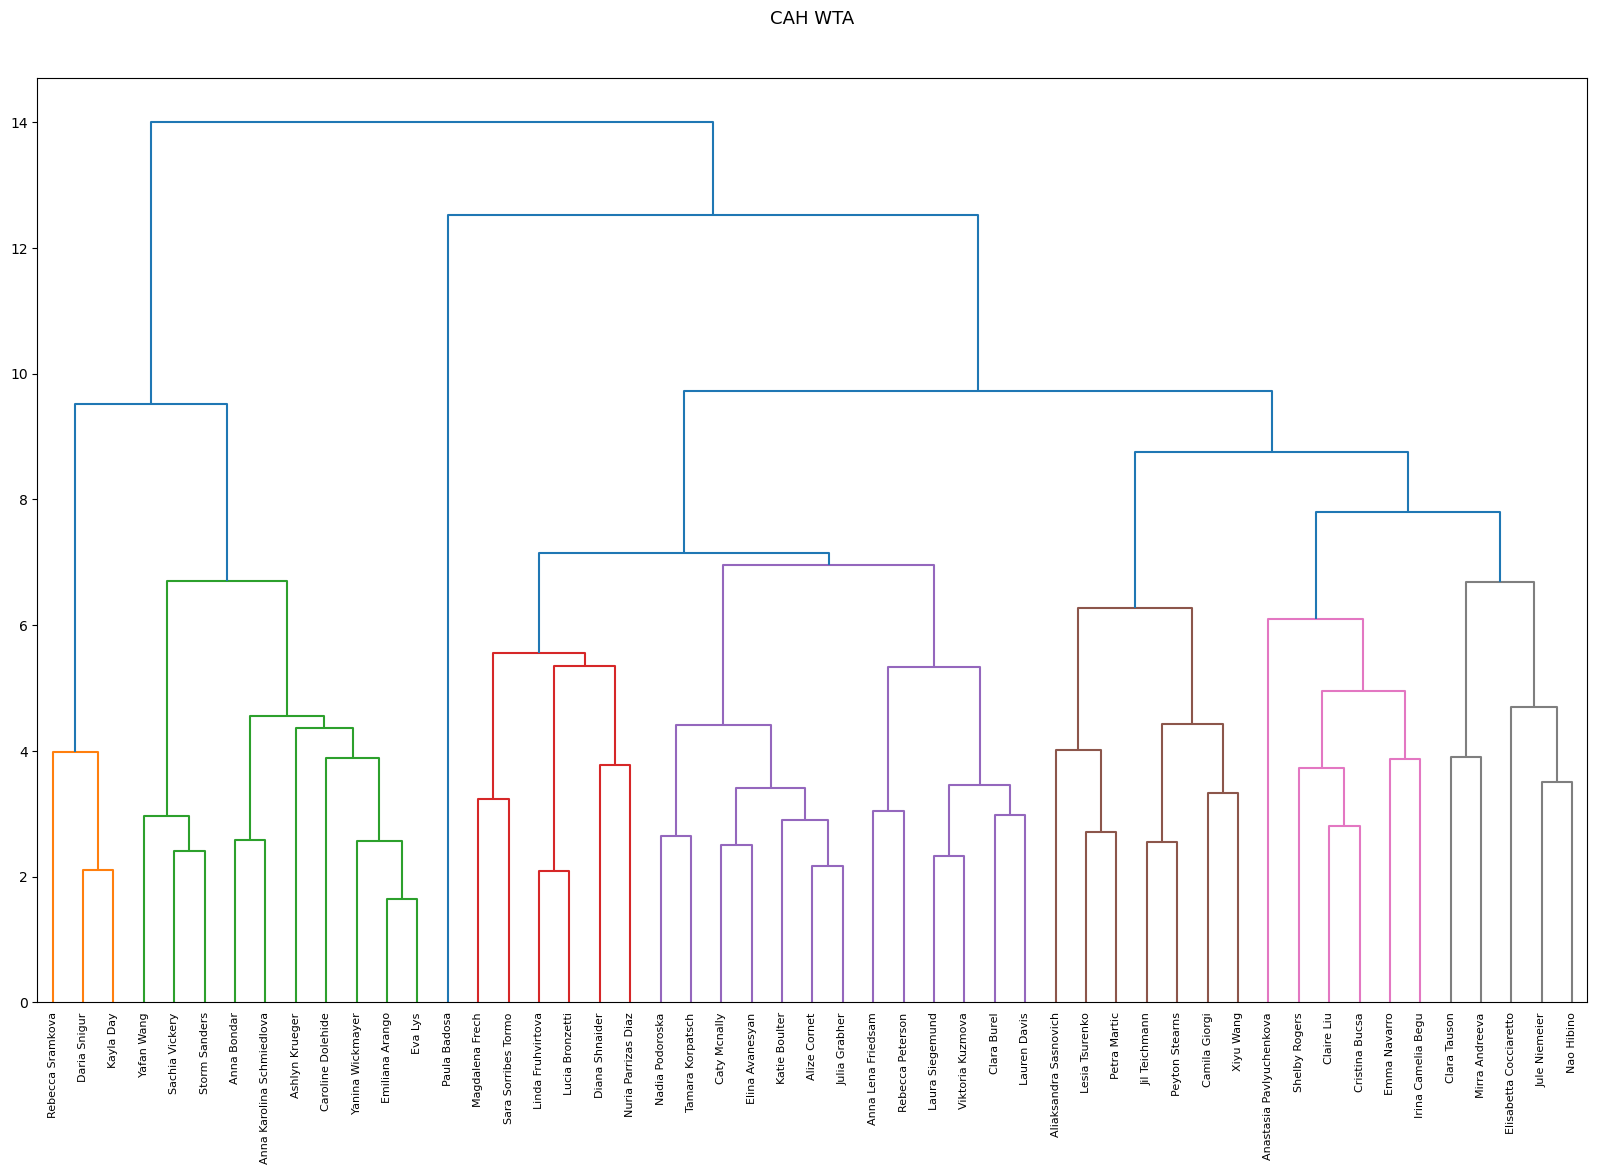

In [30]:
a = scal_f['name'][c5f].unique()
bdd_f = tennis_p.loc[tennis_p['name'].isin(a)==True]
bdd_f = pd.merge(bdd_f,tennis_wl,on='player_id',how='inner')
bdd_f.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_f.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_f = bdd_f.groupby(['name','tier_list']).sum()
bdd_f['M'] = bdd_f['win'] + bdd_f['lose']
bdd_f['%W'] = bdd_f['win'] / bdd_f['M']
bdd_f.drop(columns={'win','lose'},inplace=True)
bdd_f = bdd_f.pivot_table(index='name',columns='tier_list')
bdd_f.fillna(0,inplace=True)
scal_f = pre.StandardScaler().fit_transform(bdd_f)
scal_f = pd.DataFrame(scal_f,index=bdd_f.index,columns=bdd_f.columns)

Zf = linkage(scal_f,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH WTA',y=1.05,fontsize=13)

dendrogram(Zf,labels=scal_f.index,leaf_font_size=8,color_threshold=7)

plt.show()

In [31]:
cah_cluster_f = fcluster(Zf,t=7,criterion='distance')
scal_f['cah cluster'] = cah_cluster_f
scal_f['cah cluster'] = scal_f['cah cluster'].astype('category')
scal_f.reset_index(inplace=True)
c1f = scal_f['cah cluster']==1
c2f = scal_f['cah cluster']==2
c3f = scal_f['cah cluster']==3
c4f = scal_f['cah cluster']==4
c5f = scal_f['cah cluster']==5
c6f = scal_f['cah cluster']==6
c7f = scal_f['cah cluster']==7
c8f = scal_f['cah cluster']==8


cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_f = cah_cluster_mean_f.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_f

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\138136240.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T


Les G1 et G2 semblent être les plus faibles (surtout en terme de nombre de matchs joués pour le G2). Les G3 et G5 montrent un nombre important de matchs joués, mais dans l'ensemble pour les groupes 3 à 7, les %W sont plutôt moyens (sauf le G7 qui semble meilleur avec des %W TL II et IV très élevés). Puis il y a le cas Badosa, seule et représentant le G8 dans le tableau ci-dessus, qui appartient à ma TL III.

**Badosa - 68e 25M 68%W**

RAS

### Groupes 1 et 2

In [32]:
scal_f['name'][c1f+c2f][scal_f['name'][c1f+c2f].isin(TL_wta)==True]

8    Caroline Dolehide
Name: name, dtype: object

Seule Dolehide fait execption, on ne regardera pas le cas des autres joueuses

**Dolehide - 45e 14M 64%W**

Très peu de matchs, mais un %W exceptionnel, ce qui lui suffit sa place en TL V, de plus elle atteint la finale du M1000 de Guadalajara (Avec énormément d'absences parmi les meilleurs joueuses)

### Groupes 3 à 7

Les caractéristiques des %W étant mitigés, on va maintenant faire au cas par cas (± rapidement selon les noms composant un groupe)

In [33]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(TL_wta)==True]

31        Lucia Bronzetti
43    Sara Sorribes Tormo
Name: name, dtype: object

In [34]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(TL_wta)==False]

15         Diana Shnaider
30      Linda Fruhvirtova
32        Magdalena Frech
36    Nuria Parrizas Diaz
Name: name, dtype: object

**Bronzetti - 52e 37M 46%W**

Les résultats sont très mitigés avec du 5-4 TL V, 8-8 TL VI, du 1-8 TL IV- et 3-0 TL VII. Ce n'est pas catastrophique, mais ça reste trop juste pour la TL V

**<font color='red'> Direction TL VI**

**Sorribes - 53e 26M 65%W**

RAS    
    
&nbsp;
    
**Shnaider - 97e 26M 58%W**
    
Une jeune joueuse qui vient d'effectuer sa première vraie saison sur le circuit principal, même s'il n'y a pas énormément de matchs, dans l'ensemble c'est plutôt solide avec un 13-4 TL V+ et mérite une place en TL V        
    
**<font color='green'> Direction TL V**  
    
**Fruhvirtova - 88e 35M 43%W**
    
En 2-4 TL II, 0-2 TL III et 0-3 TL IV, c'est assez faible. Par contre un beau 6-2 TL V viens redorer le blason, qui est ensuite terni par un 6-8 TL VI et 1-1 TL VII. C'est encore trop juste pour la TL V
    
**Frech - 70e 30M 40%W**
    
A part un 4-0 TL VII, le reste est mauvais    
    
**Parrizas - 123e 24M 42%W**
    
Cas un peu similaire à celui de Sasnovich avec moins de matchs et un 0-2 TL VII qui fait défaut. Pas suffisant pour la TL V     

In [35]:
scal_f['name'][c4f][scal_f['name'][c4f].isin(TL_wta)==True]

28    Lauren Davis
Name: name, dtype: object

In [36]:
scal_f['name'][c4f][scal_f['name'][c4f].isin(TL_wta)==False]

1           Alize Cornet
5     Anna Lena Friedsam
9           Caty Mcnally
11           Clara Burel
16       Elina Avanesyan
24         Julia Grabher
25         Katie Boulter
27       Laura Siegemund
34       Nadia Podoroska
40      Rebecca Peterson
46      Tamara Korpatsch
47      Viktoria Kuzmova
Name: name, dtype: object

Avec beaucoup de joueuses n'appartenant pas à la TL I-V, je vais me contenter ici de mettre en valeur les cas méritant une promotion en TL V

**Davis - 72e 29M 48%W**
    
En 0-4 TL III-, 1-1 TL IV, 6-5 TL V, 6-5 TL VI et 1-0 TL VII, on a ici une joueuse très irrégulière. On va dire que globalement c'est correct et qu'elle peut, de très peu, garder sa place en TL V

&nbsp;

**Burel - 56e 25M 60%W**

Une nouvelle erreur de ma part

**<font color='green'> Direction TL V**
        
**Siegemund - 92e 23M 57%W**
    
Un cas un peu comme Burel (mais en moins bien partout), on a affaire à une joueuse très expérimentée avec notamment un joli 7-2 TL V
    
**<font color='green'> Direction TL V** 

In [37]:
scal_f['name'][c5f][scal_f['name'][c5f].isin(TL_wta)==True]

7      Camila Giorgi
29    Lesia Tsurenko
38      Petra Martic
39    Peyton Stearns
48         Xiyu Wang
Name: name, dtype: object

In [38]:
scal_f['name'][c5f][scal_f['name'][c5f].isin(TL_wta)==False]

0     Aliaksandra Sasnovich
22            Jil Teichmann
Name: name, dtype: object

**Giorgi - 55e 33M 58%W**

RAS

**Tsurenko - 32e 31M 68%W**

RAS
    
**Martic - 41e 37M 49%W**
    
Une joueuse bien connue du circuit, en 0-4 TL I et 4-8 TL II-IV, elle éprouve des difficultés quand le niveau se hausse. Par contre en 4-4 TL, 10-2 TL VI et malheursement 0-1 TL VII, ce n'est pas parfait mais elle tient souvent son rang et mérite sa place en TL V     
    
**Stearns - 49e 29M 52%W**
    
RAS    

**Xiyu Wang - 71e 39M 41%W**

Du 4-7 TL V et 1-1- TL IV, puis 0-8 TL II-III, c'est vraiment pas bon et même contre la TL VI+ ce n'est pas serein non plus avec du 11-6 TL VI et 0-1 TL VII

**<font color='red'> Direction TL VI**
    
&nbsp;      
    
**Sasnovich - 86e 36M 42%W**

En 4-15 TL II-IV, 1-1 TL V et 10-3 TL VI. Un cas difficile, qui s'en sort plutôt bien en favoris mais qui peine face à des joueuses plus fortes. Malheusement ce n'est pas suffisant pour faire partie de la TL V
   
**Teichmann - 130e 27M 33%W**
    
Recalée    
    
    
    
   

In [39]:
scal_f['name'][c6f][scal_f['name'][c6f].isin(TL_wta)==True]

2     Anastasia Pavlyuchenkova
19                Emma Navarro
21          Irina Camelia Begu
Name: name, dtype: object

In [40]:
scal_f['name'][c6f][scal_f['name'][c6f].isin(TL_wta)==False]

10        Claire Liu
13    Cristina Bucsa
44     Shelby Rogers
Name: name, dtype: object

**Pavlyuchenkova - 60e 26M 54%**

RAS

**Navarro - 31e 23M 51%W**

RAS

**Begu - 79e 26M 50%W**

En 5-6 TL II-IV c'est très correct, par contre un 0-2 en TL V, mais elle se rattrape avec un 7-3 TL VI et 1-0 TL VII. C'est irrégulier mais ça peut obtenir de très bons résultats de temps en temps, notamment sur terre. Elle doit garder sa place en TL V

&nbsp;

**Liu - 95e 32M 38%W**

Recalée

**Bucsa - 61e 29M 34%W**
    
Recalée

**Rogers - 149e 21M 38%W**
    
Recalée  

In [41]:
scal_f['name'][c7f][scal_f['name'][c7f].isin(TL_wta)==True]

17    Elisabetta Cocciaretto
33            Mirra Andreeva
Name: name, dtype: object

In [42]:
scal_f['name'][c7f][scal_f['name'][c7f].isin(TL_wta)==False]

12     Clara Tauson
23    Jule Niemeier
35       Nao Hibino
Name: name, dtype: object

**Cocciaretto - 47e 35M 54%W**

RAS

**Andreeva - 58e 21M 63%W**

RAS (on aura l'occasion d'en reparler, elle qui fait partie de ma TL III)

&nbsp;  

**Tauson - 107e 15M 60%W**
    
Jeune joueuse de 20 ans, elle a atteint la 32e place en février 2022 et a disparu du circuit en 2023. Très peu de matchs mais 60%W global avec surtout un 2-0 TL II-III, elle mérite une place en TL V
    
**<font color='green'> Direction TL V**
    
**Nieimeier - 169e 26M 35%W**
    
Recalée    
    
**Hibino - 93e 21M 43%W**    

Certes en 2-1 TL II-IV, mais 0-3 TL V et 6-8 TL VI c'est clairement insuffisant

&nbsp;    
    
### Récapitulatif

<font color='green'> **Promotion en TL V :**

- Osorio
- Masarova
- Shnaider
- Burel
- Siegemund
- Tauson    

<font color='red'> **Relégation en TL VI :**

- Rus   
- Xiyu Wang
- Bronzetti    

In [43]:
V_wta = ['Emma Navarro','Xin Yu Wang','Lin Zhu','Karolina Pliskova','Marta Kostyuk','Martina Trevisan','Varvara Gracheva',
         'Caroline Dolehide','Katerina Siniakova','Sloane Stephens','Sara Sorribes Tormo','Elisabetta Cocciaretto',
         'Peyton Stearns','Alycia Parks','Anna Blinkova','Danielle Collins','Camila Giorgi','Tatjana Maria',
         'Mayar Sherif','Bernarda Pera','Yulia Putintseva','Lauren Davis','Irina Camelia Begu','Anna Kalinskaya',
         'Taylor Townsend','Bianca Andreescu','Amanda Anisimova','Caroline Wozniacki','Daria Saville','Rebeka Masarova',
         'Camila Osorio','Clara Tauson','Diana Shnaider','Clara Burel','Laura Siegemund']
TL_wta = I_wta+II_wta+III_wta+IV_wta+V_wta

Les ajustements pour la TL VI sont maintenant terminés pour l'ATP et la WTA. Il se peut que certains cas soient passés entre les mailles du filet, toutefois il y aura une nouvelle chance de les identfier, en ce qui concerne le passage de TL V à VI, plus tard lorsque j'étudirai les cas de la TL IV-V

Avant d'attaquer la suite, il ne reste plus qu'à rafraichir la base de donnée avec les changements venant d'être opérés.

In [44]:
atp_pr['tier_list'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                       'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_pr['name'],atp_pr['rank'])]
wta_pr['tier_list'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                       'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_pr['name'],wta_pr['rank'])]
atp_matches['winner_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                            'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['winner_name'],atp_matches['winner_rank'])]
atp_matches['loser_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                           'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['loser_name'],atp_matches['loser_rank'])]
wta_matches['winner_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                            'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['winner_name'],wta_matches['winner_rank'])]
wta_matches['loser_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                           'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['loser_name'],wta_matches['loser_rank'])]
atp_pr['genre'] = 'H'
wta_pr['genre'] = 'F'

tennis_p = pd.concat([atp_pr,wta_pr])
tennis_m = pd.concat([atp_matches,wta_matches])
tennis_m.drop(columns={'winner_name','loser_name','tourney_name','tourney_date','winner_ioc','winner_age','loser_ioc','loser_age','round','score','winner_rank',
                       'loser_rank','match_num'},inplace=True)
tennis_w = tennis_m.drop(columns={'loser_id'}).copy()
tennis_w['win'] = 1
tennis_w = tennis_w.groupby(by=['winner_id','surface','tourney_level','loser_tl'],as_index=False).sum()
tennis_l = tennis_m.drop(columns={'winner_id'}).copy()
tennis_l['lose'] = 1
tennis_l = tennis_l.groupby(by=['loser_id','surface','tourney_level','winner_tl'],as_index=False).sum()
tennis_w.rename(columns={'winner_id':'player_id','loser_tl':'tier_list'},inplace=True)
tennis_l.rename(columns={'loser_id':'player_id','winner_tl':'tier_list'},inplace=True)
tennis_wl = pd.merge(tennis_w,tennis_l,how='outer',on=['player_id','tourney_level','surface','tier_list'])
tennis_wl.fillna(0,inplace=True)
tennis_wl['win'] = np.int64(tennis_wl['win'])
tennis_wl['lose'] = np.int64(tennis_wl['lose'])

In [45]:
tennis_wl.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_winlose.csv",index=False)
tennis_p.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_player.csv",index=False)

## Tier List I

La TL I, que ce soit pour l'ATP ou la WTA, est la plus petite TL et est d'ores et déja figée car le gap est trop important entre cette TL et la TL II 
    
Je vais tout de même effectuer une CAH sans les TL VI+ par curiosité et observer si les joueurs et joueuses de la TL I se démarquent (ce qui devrait être le cas vu le gap)

### ATP

In [46]:
I_atp

['Novak Djokovic', 'Carlos Alcaraz', 'Daniil Medvedev', 'Jannik Sinner']

In [47]:
bdd_h = tennis_p.loc[tennis_p['name'].isin(TL_atp)==True]
bdd_h = pd.merge(bdd_h,tennis_wl,on='player_id',how='inner')
bdd_h.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_h.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_h = bdd_h.groupby(['name','tier_list']).sum()
bdd_h['M'] = bdd_h['win'] + bdd_h['lose']
bdd_h['%W'] = bdd_h['win'] / bdd_h['M']
bdd_h.drop(columns={'win','lose'},inplace=True)
bdd_h = bdd_h.pivot_table(index='name',columns='tier_list')
bdd_h.fillna(0,inplace=True)
bdd_h.head()

%W                                          \
tier_list                           I        II       III        IV         V   
name                                                                            
Adrian Mannarino             0.333333  0.333333  0.400000  0.714286  0.588235   
Alejandro Davidovich Fokina  0.000000  0.375000  0.333333  0.555556  0.700000   
Alex De Minaur               0.166667  0.428571  0.666667  0.461538  0.714286   
Alex Molcan                  0.000000  0.000000  0.000000  0.250000  0.700000   
Alexander Bublik             0.000000  0.333333  0.600000  0.500000  0.384615   

                                              M                               \
tier_list                          VI  VII    I   II   III    IV     V    VI   
name                                                                           
Adrian Mannarino             0.777778  1.0  3.0  3.0  10.0   7.0  17.0  18.0   
Alejandro Davidovich Fokina  0.714286  1.0  4.0  8.0   6.0   9.0  10.0  14.0   
Alex De Minaur               0.928571  1.0  6.0  7.0   6.0  13.0  14.0  14.0   
Alex Molcan                  0.571429  1.0  0.0  6.0   0.0   4.0  10.0   7.0   
Alexander Bublik             0.600000  1.0  2.0  9.0   5.0   4.0  13.0  10.0   

                                  
tier_list                    VII  
name                              
Adrian Mannarino             3.0  
Alejandro Davidovich Fokina  3.0  
Alex De Minaur               4.0  
Alex Molcan                  2.0  
Alexander Bublik             1.0

In [48]:
bdd_h = tennis_p.loc[tennis_p['name'].isin(TL_atp)==True]
bdd_h = pd.merge(bdd_h,tennis_wl,on='player_id',how='inner')
bdd_h.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_h.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_h = bdd_h.groupby(['name','tier_list']).sum()
bdd_h['M'] = bdd_h['win'] + bdd_h['lose']
bdd_h['%W'] = bdd_h['win'] / bdd_h['M']
bdd_h.drop(columns={'win','lose'},inplace=True)
bdd_h = bdd_h.pivot_table(index='name',columns='tier_list')
bdd_h.fillna(0,inplace=True)

In [49]:
bdd_h.shape

(76, 14)

In [50]:
len(TL_atp)

76

Il y a bien tous les joueurs présent dans le dataframe (ce qui n'était pas le cas avant à cause d'une mauvaise saisie du nom de YIbing Wu)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


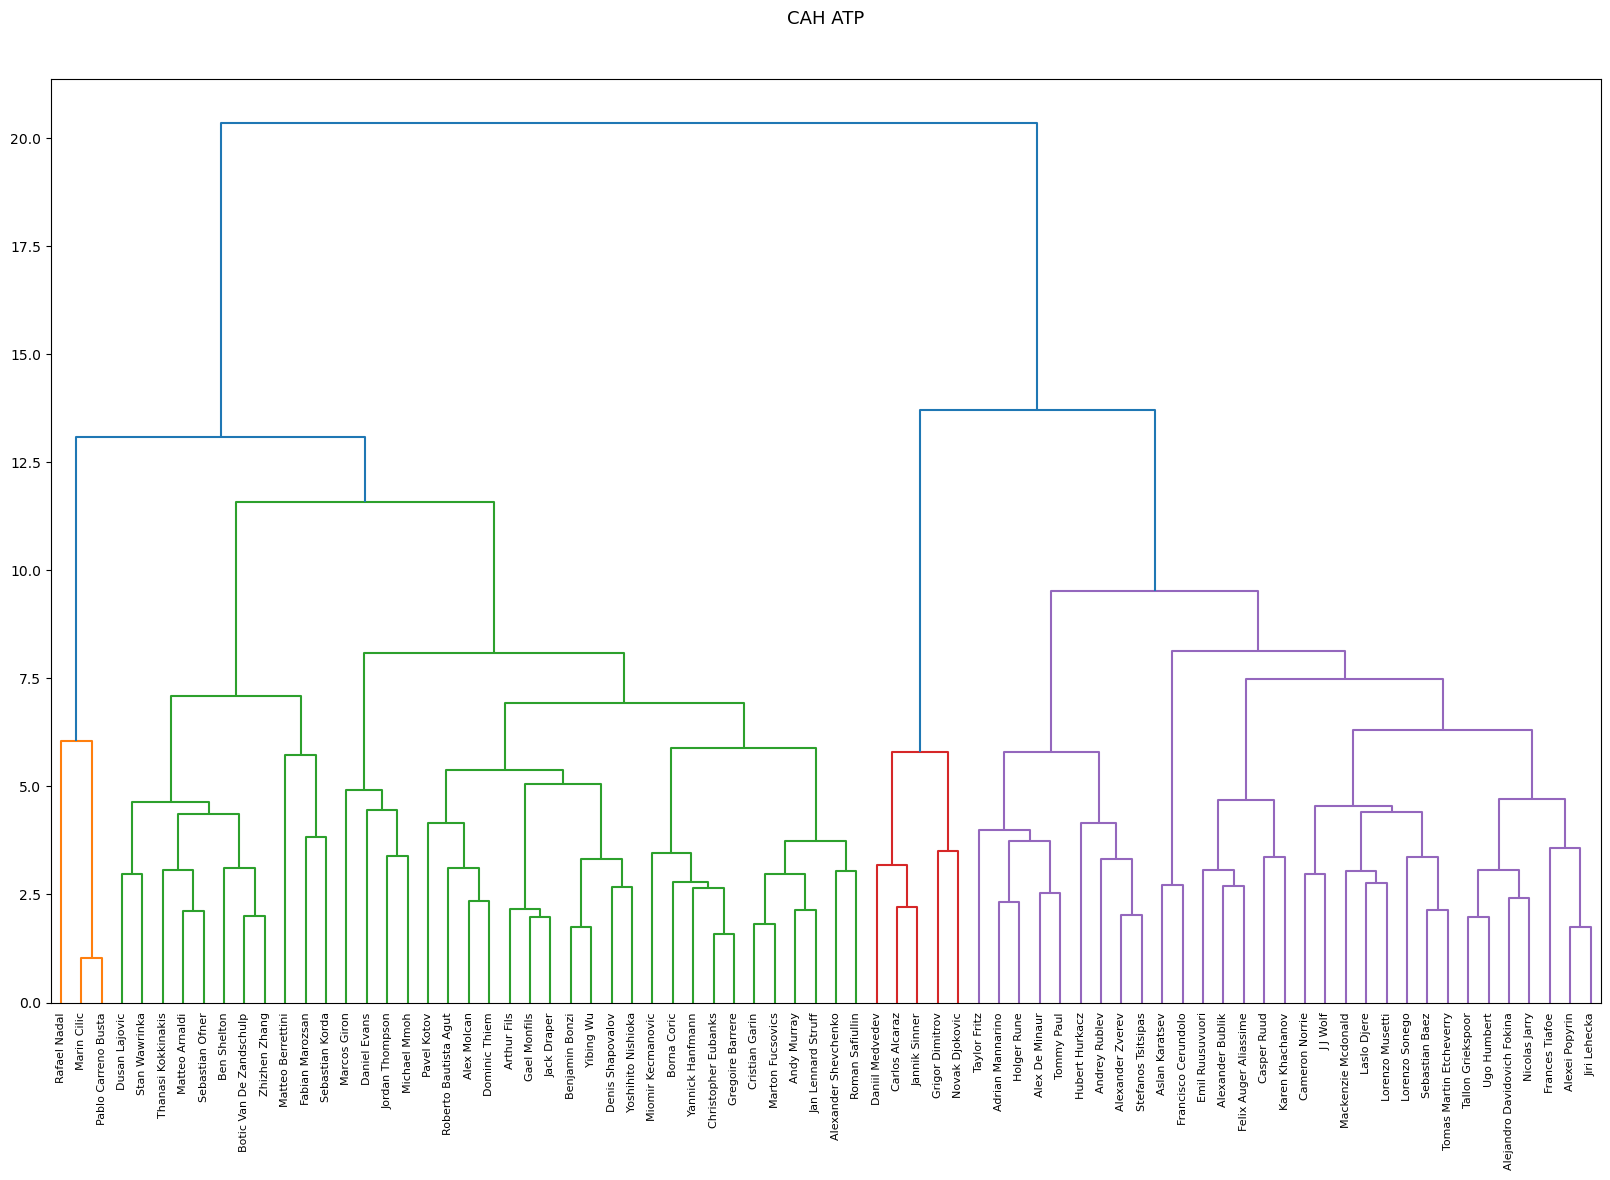

In [51]:
scal_h = pre.StandardScaler().fit_transform(bdd_h)
scal_h = pd.DataFrame(scal_h,index=bdd_h.index,columns=bdd_h.columns)
Zh = linkage(scal_h,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH ATP',y=1.05,fontsize=13)

dendrogram(Zh,labels=scal_h.index,leaf_font_size=8,color_threshold=12)

plt.show()

In [52]:
cah_cluster_h = fcluster(Zh,t=12,criterion='distance')
scal_h['cah cluster'] = cah_cluster_h
scal_h['cah cluster'] = scal_h['cah cluster'].astype('category')
scal_h.reset_index(inplace=True)
c1h = scal_h['cah cluster']==1
c2h = scal_h['cah cluster']==2
c3h = scal_h['cah cluster']==3
c4h = scal_h['cah cluster']==4

cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_h = cah_cluster_mean_h.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_h

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\3638243659.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T


Le G3 est nettement supérieur aux autres groupes et est composé de tous les joueurs de la TL I + Dimitrov de la TL II, ce dernier étant en duo proche avec Djokovic (possiblement de par leur nombre élevé de matchs, tous gagnés, en TL VI et aussi aucun match disputé en TL VII). Quoi qu'il en soit Dimitrov est très loin de la TL I

Autre chose à noter, Nadal, Cilic et Carreno Busta forment le G1, eux qui étaient top 20 en début d'année 2023, mais qui n'ont pu disputé qu'une poignée de matchs avec une seule victoire. J'ai décidé de les laisser dans la TL V tout de même, en sachant que cela ne changerai pas grand chose et que toutes façons ils n'étaient pas TL VI+ lors de leurs matchs, hormis peut-être pour Cilic en milieu d'année avant de repartir pour de nouvelles semaines d'absences. De plus ces 3 joueurs, mainteant bien au delà du top 200, n'apparassaient donc pas lors de la CAH pour ajuster la TL VI

A titre d'informations, voici les stats globals de la TL I :

**Djokovic - 1er 54M 91%W**

**Alcaraz - 2e 71M 86%W**

**Medvedev - 3e 79M 80%W**

**Sinner - 4e 74M 78%W**

&nbsp;

### WTA

In [53]:
I_wta

['Iga Swiatek',
 'Aryna Sabalenka',
 'Cori Gauff',
 'Elena Rybakina',
 'Jessica Pegula']

In [54]:
bdd_f = tennis_p.loc[tennis_p['name'].isin(TL_wta)==True]
bdd_f = pd.merge(bdd_f,tennis_wl,on='player_id',how='inner')
bdd_f.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_f.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_f = bdd_f.groupby(['name','tier_list']).sum()
bdd_f['M'] = bdd_f['win'] + bdd_f['lose']
bdd_f['%W'] = bdd_f['win'] / bdd_f['M']
bdd_f.drop(columns={'win','lose'},inplace=True)
bdd_f = bdd_f.pivot_table(index='name',columns='tier_list')
bdd_f.fillna(0,inplace=True)
bdd_f.head()

%W                                                  \
tier_list                   I    II       III    IV         V        VI   VII   
name                                                                            
Alycia Parks              0.0  0.00  0.500000  0.25  0.333333  0.500000  1.00   
Amanda Anisimova          0.0  0.00  0.333333  0.00  0.000000  0.000000  1.00   
Anastasia Pavlyuchenkova  0.0  0.25  0.571429  1.00  0.000000  0.800000  1.00   
Anastasia Potapova        0.4  0.50  0.250000  0.50  0.800000  0.733333  1.00   
Anhelina Kalinina         0.0  0.40  0.400000  0.25  0.538462  0.666667  0.75   

                            M                                   
tier_list                   I    II  III   IV     V    VI  VII  
name                                                            
Alycia Parks              0.0   5.0  4.0  4.0   6.0  14.0  1.0  
Amanda Anisimova          0.0   1.0  3.0  1.0   1.0   1.0  1.0  
Anastasia Pavlyuchenkova  1.0   4.0  7.0  3.0   4.0   5.0  2.0  
Anastasia Potapova        5.0   6.0  4.0  4.0  10.0  15.0  1.0  
Anhelina Kalinina         0.0  10.0  5.0  4.0  13.0  12.0  4.0

In [55]:
len(TL_wta)

74

In [56]:
bdd_f.shape

(74, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


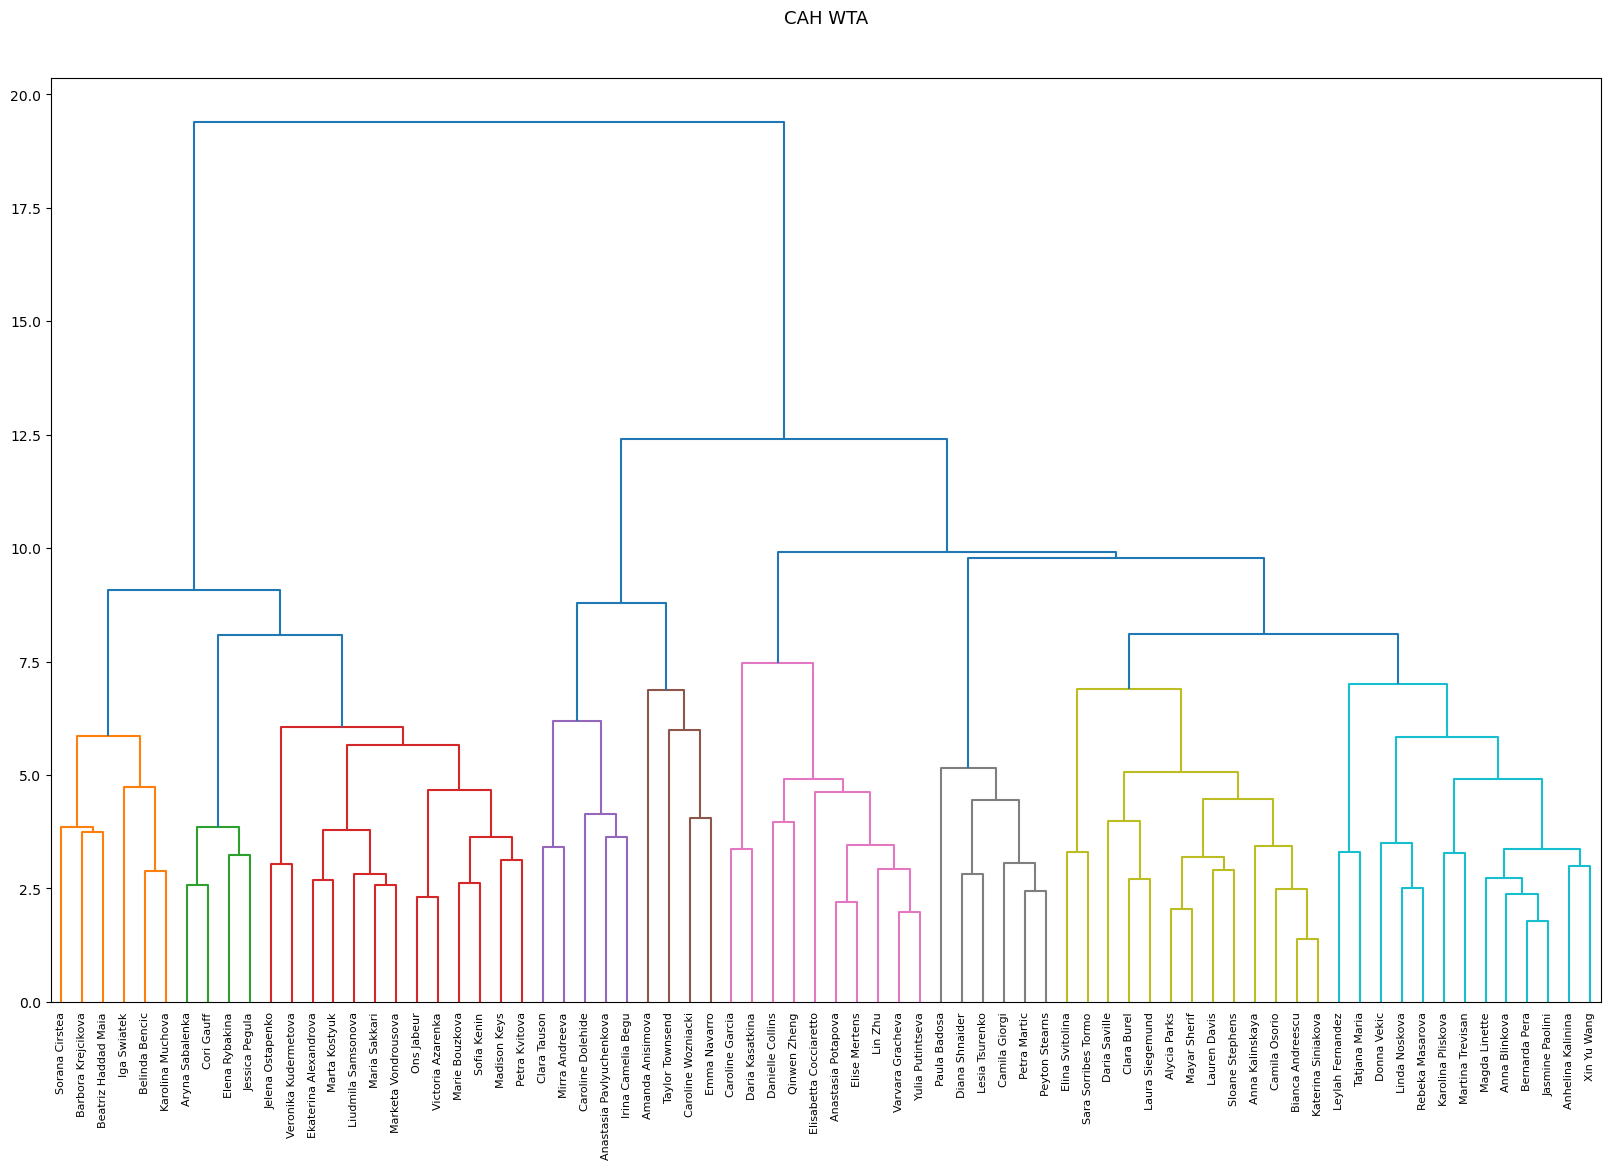

In [57]:
scal_f = pre.StandardScaler().fit_transform(bdd_f)
scal_f = pd.DataFrame(scal_f,index=bdd_f.index,columns=bdd_f.columns)

Zf = linkage(scal_f,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH WTA',y=1.05,fontsize=13)

dendrogram(Zf,labels=scal_f.index,leaf_font_size=8,color_threshold=8)

plt.show()

In [58]:
cah_cluster_f = fcluster(Zf,t=8,criterion='distance')
scal_f['cah cluster'] = cah_cluster_f
scal_f['cah cluster'] = scal_f['cah cluster'].astype('category')
scal_f.reset_index(inplace=True)
c1f = scal_f['cah cluster']==1
c2f = scal_f['cah cluster']==2
c3f = scal_f['cah cluster']==3
c4f = scal_f['cah cluster']==4
c5f = scal_f['cah cluster']==5
c6f = scal_f['cah cluster']==6
c7f = scal_f['cah cluster']==7
c8f = scal_f['cah cluster']==8
c9f = scal_f['cah cluster']==9

cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_f = cah_cluster_mean_f.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_f

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\442694601.py:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T


Il y a une grande séparation entre les groupes 1 à 3 et le reste, où les groupes 1 à 3 comportent essentiellement des caractéristiques positives, dont surtout le G2, composé de 4 joueuses de la TL I. La dernière, la n°1 Swiatek se situe dans le G1 surêment pour cause d'absence de matchs en TL VII

A titre d'informations, voici les stats globales de TL I :

**Swiatek - 1ere 67M 87%W**

**Sabalenka - 2e 65M 82%W**

**Gauff - 3e 62M 77%W**

**Rybakina - 4e 51M 78%W**

**Pegula - 5e 64M 75%W**

&nbsp;

## Tier List II
    
On va maintenant s'attaquer à la TL II en répétant le même schéma et en enlevant directement les joueurs de la TL I, ainsi que le G1 pour l'ATP

Pour cette TL, je vais principalement être regardant au niveau du %W global et du nombre de matchs joués. Ce qui sera également très important, ce sera la régularité contre les joueurs de TL inférieurs, en particuliers les TL V+.  
    
### ATP    

In [59]:
II_atp

['Andrey Rublev',
 'Stefanos Tsitsipas',
 'Alexander Zverev',
 'Holger Rune',
 'Hubert Hurkacz',
 'Grigor Dimitrov',
 'Karen Khachanov']

In [60]:
G1 = ['Rafael Nadal','Marin Cilic','Pablo Carreno Busta']
bdd_h = tennis_p.loc[(tennis_p['name'].isin(II_atp+III_atp+IV_atp+V_atp)==True)&(tennis_p['name'].isin(G1)==False)]
bdd_h = pd.merge(bdd_h,tennis_wl,on='player_id',how='inner')
bdd_h.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_h.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_h = bdd_h.groupby(['name','tier_list']).sum()
bdd_h['M'] = bdd_h['win'] + bdd_h['lose']
bdd_h['%W'] = bdd_h['win'] / bdd_h['M']
bdd_h.drop(columns={'win','lose'},inplace=True)
bdd_h = bdd_h.pivot_table(index='name',columns='tier_list')
bdd_h.fillna(0,inplace=True)

In [61]:
bdd_h.shape

(69, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


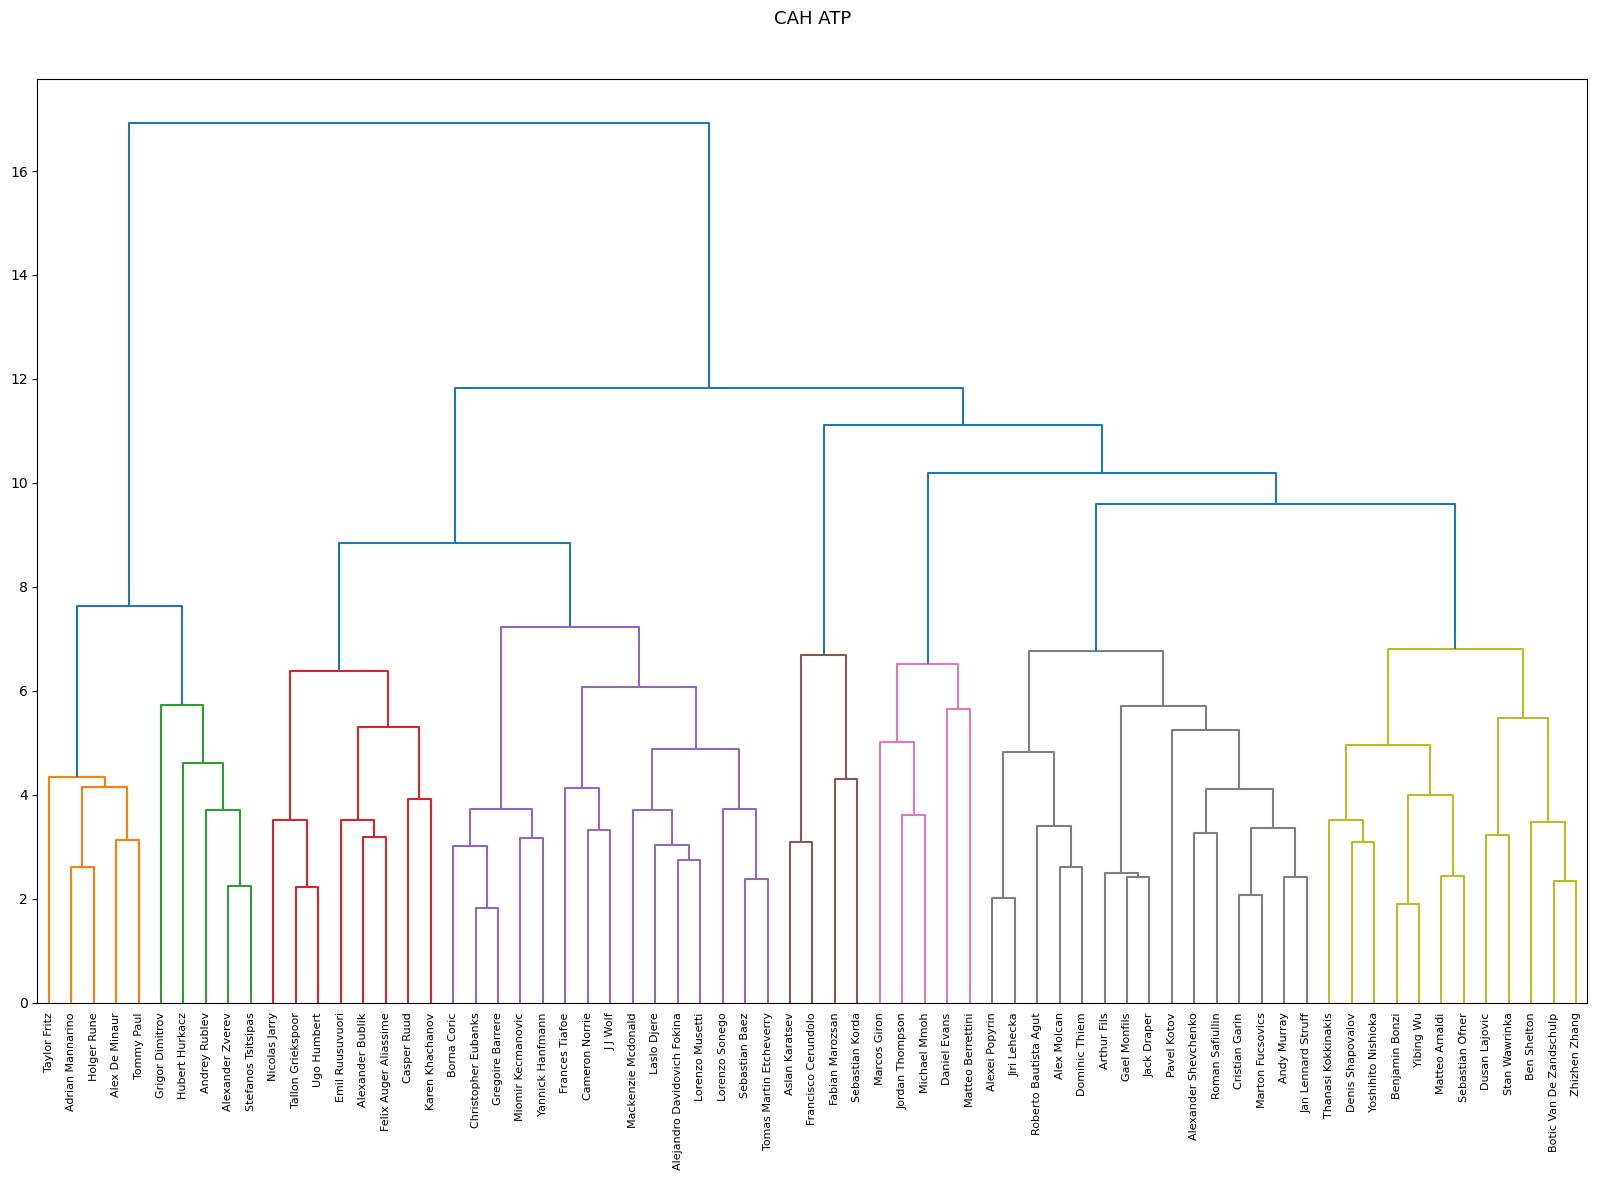

In [62]:
scal_h = pre.StandardScaler().fit_transform(bdd_h)
scal_h = pd.DataFrame(scal_h,index=bdd_h.index,columns=bdd_h.columns)
Zh = linkage(scal_h,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH ATP',y=1.05,fontsize=13)

dendrogram(Zh,labels=scal_h.index,leaf_font_size=8,color_threshold=7.5)

plt.show()

In [63]:
cah_cluster_h = fcluster(Zh,t=7.5,criterion='distance')
scal_h['cah cluster'] = cah_cluster_h
scal_h['cah cluster'] = scal_h['cah cluster'].astype('category')
scal_h.reset_index(inplace=True)
c1h = scal_h['cah cluster']==1
c2h = scal_h['cah cluster']==2
c3h = scal_h['cah cluster']==3
c4h = scal_h['cah cluster']==4
c5h = scal_h['cah cluster']==5
c6h = scal_h['cah cluster']==6
c7h = scal_h['cah cluster']==7
c8h = scal_h['cah cluster']==8

cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_h = cah_cluster_mean_h.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_h

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\2075689922.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T


On a une grande séparation entre les groupes 1 et 2 avec le reste, le G2 étant meilleur que le G1. Le G3 suit avec des caractéristiques plutôt bonne. Le G5 indique plutôt des exploits face aux TL I et III mais avec peu de matchs joués. Pour les autres groupes, c'est au mieux moyen

In [64]:
scal_h['name'][c1h]

0     Adrian Mannarino
2       Alex De Minaur
32         Holger Rune
60        Taylor Fritz
63          Tommy Paul
Name: name, dtype: object

Juste Rune fait partie de ma TL II, De Minaur, Fritz et Paul de ma TL III et Mannarino de ma TL IV

**Mannarino - 22e 61M 62%W**

Il peut potentiellement prétendre à la TL III mais clairement pas la TL II

**De Minaur - 12e 64M 64%W**

En 1-5 TL I, 3-4 TL II, 10-9 TL III-IV, 11-4 TL V et 12-1 TL VI et 4-0 TL VII. Il rivalise avec la TL II, ± solide TL III-IV mais pas mal de contre-perf notamment en TL V. Il est à la frontière des TL II et III, mais malheuresement il a plus un profil TL III

**Rune - 8e 59M 68%W**

Malgrés quelques contre-perfs, il reste 8e mondial et a 68%W, c'est énorme et aucun débat ne se pose

**Fritz - 10e 70M 69%**

Enormément de matchs, un très bon %W global. En 2-2 TL II, 10-5 TL III-IV, 18-8 TL V et 14-2 TL VI (+ une défaite TL VII). Son principal défaut est son bilan TL V avec trop de défaites et sa défaite vs un top200+, sinon c'est solide et son %W global est très élevé, il mérite la TL II.

<font color='green'> **Direction TL II**

**Paul - 13e 64M 61%W**

Recalé

In [65]:
scal_h['name'][c2h]

6       Alexander Zverev
8          Andrey Rublev
31       Grigor Dimitrov
33        Hubert Hurkacz
58    Stefanos Tsitsipas
Name: name, dtype: object

Ici, uniquement des joueurs de ma TL II, je vais afficher les stats globals à titre d'informations, mais aucun de devrait douter de sa place en TL II

**Zverev - 7e 74M 69%W**

**Rublev - 5e 78M 72%W**

**Dimitrov - 14e 59M 68%W**

**Hurkacz - 9e 63M 68%W**

**Tsitsipas - 6e 64M 67%W**

Bien évidemment que du lourd avec minimun 67%W

In [66]:
scal_h['name'][c3h]

4          Alexander Bublik
17              Casper Ruud
24          Emil Ruusuvuori
26    Felix Auger Aliassime
39          Karen Khachanov
50            Nicolas Jarry
59        Tallon Griekspoor
64              Ugo Humbert
Name: name, dtype: object

Seulement Khachanov fait partie de ma TL II et c'était d'ailleurs le cas le plus discutable

**Khachanov - 15e 51M 65%W**

En 2-4 TL II, 3-0 en TL III, 9-3 TL IV, 6-6 TL V et 13-0 TL VII. Mauvais pour la TL V, mais à part ça c'est plutôt intéressant. Il a malheuresement été absent pendant 3 mois entre RG et l'US, ce qui lui vaut d'être seulement 15e. Depuis quelques années, c'est un joueur plutôt régulier, notamment en grand chelem où il ne perd presque plus contre moins fort. Il mérite de rester en TL II 

Pour les autres, seulement Ruud à l'étoffe d'être en TL II (il l'était en 2022)

**Ruud - 11e 57M 61%W**

Recalé

In [67]:
scal_h['name'][~(c1h+c2h+c3h)][scal_h['name'][~(c1h+c2h+c3h)].isin(II_atp)==True]

Series([], Name: name, dtype: object)

Personne n'appartient à la TL II hors de ces 3 groupes, de toutes façons on a pu déjà apercevoir les meilleurs joueurs, il n'y a vraiment aucun doute pour cette TL II

### Récapitulatif

Il n'y a qu'une seule modification avec Fritz qui passe en TL II

In [68]:
II_atp = II_atp + ['Taylor Fritz']
III_atp = ['Alex De Minaur','Casper Ruud','Tommy Paul','Frances Tiafoe','Ben Shelton','Nicolas Jarry','Ugo Humbert',
           'Sebastian Korda','Matteo Berrettini']

### WTA

In [69]:
II_wta

['Ons Jabeur',
 'Marketa Vondrousova',
 'Karolina Muchova',
 'Maria Sakkari',
 'Barbora Krejcikova',
 'Beatriz Haddad Maia',
 'Madison Keys',
 'Petra Kvitova',
 'Qinwen Zheng',
 'Jelena Ostapenko',
 'Belinda Bencic',
 'Daria Kasatkina',
 'Elina Svitolina']

In [70]:
bdd_f = tennis_p.loc[tennis_p['name'].isin(II_wta+III_wta+IV_wta+V_wta)==True]
bdd_f = pd.merge(bdd_f,tennis_wl,on='player_id',how='inner')
bdd_f.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_f.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_f = bdd_f.groupby(['name','tier_list']).sum()
bdd_f['M'] = bdd_f['win'] + bdd_f['lose']
bdd_f['%W'] = bdd_f['win'] / bdd_f['M']
bdd_f.drop(columns={'win','lose'},inplace=True)
bdd_f = bdd_f.pivot_table(index='name',columns='tier_list')
bdd_f.fillna(0,inplace=True)
bdd_f.head()

%W                                                  \
tier_list                   I    II       III    IV         V        VI   VII   
name                                                                            
Alycia Parks              0.0  0.00  0.500000  0.25  0.333333  0.500000  1.00   
Amanda Anisimova          0.0  0.00  0.333333  0.00  0.000000  0.000000  1.00   
Anastasia Pavlyuchenkova  0.0  0.25  0.571429  1.00  0.000000  0.800000  1.00   
Anastasia Potapova        0.4  0.50  0.250000  0.50  0.800000  0.733333  1.00   
Anhelina Kalinina         0.0  0.40  0.400000  0.25  0.538462  0.666667  0.75   

                            M                                   
tier_list                   I    II  III   IV     V    VI  VII  
name                                                            
Alycia Parks              0.0   5.0  4.0  4.0   6.0  14.0  1.0  
Amanda Anisimova          0.0   1.0  3.0  1.0   1.0   1.0  1.0  
Anastasia Pavlyuchenkova  1.0   4.0  7.0  3.0   4.0   5.0  2.0  
Anastasia Potapova        5.0   6.0  4.0  4.0  10.0  15.0  1.0  
Anhelina Kalinina         0.0  10.0  5.0  4.0  13.0  12.0  4.0

In [71]:
bdd_f.shape

(69, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


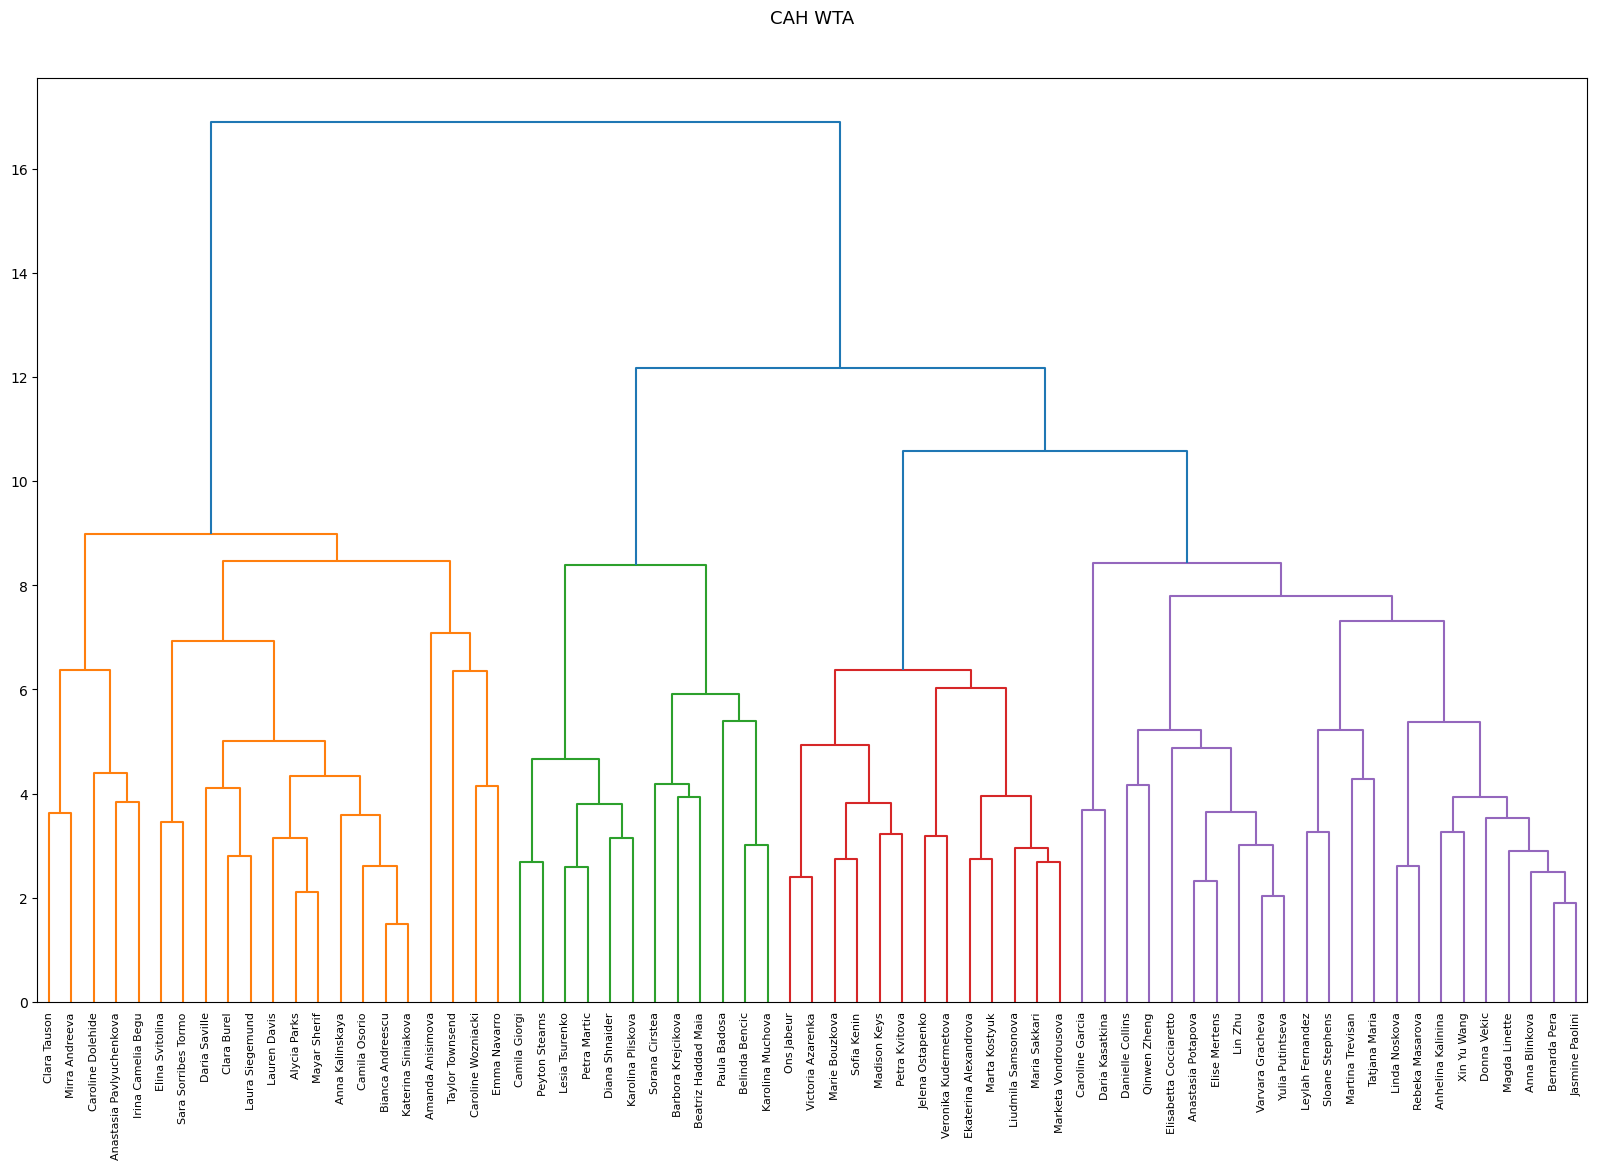

In [72]:
scal_f = pre.StandardScaler().fit_transform(bdd_f)
scal_f = pd.DataFrame(scal_f,index=bdd_f.index,columns=bdd_f.columns)

Zf = linkage(scal_f,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH WTA',y=1.05,fontsize=13)

dendrogram(Zf,labels=scal_f.index,leaf_font_size=8,color_threshold=9)

plt.show()

In [73]:
cah_cluster_f = fcluster(Zf,t=9,criterion='distance')
scal_f['cah cluster'] = cah_cluster_f
scal_f['cah cluster'] = scal_f['cah cluster'].astype('category')
scal_f.reset_index(inplace=True)
c1f = scal_f['cah cluster']==1
c2f = scal_f['cah cluster']==2
c3f = scal_f['cah cluster']==3
c4f = scal_f['cah cluster']==4

cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_f = cah_cluster_mean_f.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_f

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\2598583382.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T


Le G3 est de loin le meilleur, ensuite le G2 présente également des caractéristiques intéressantes au niveau des %W, c'est surtout le nombre de matchs qui lui fait défaut. Le G1 est le pire, mais le G4 n'est pas tellement mieux au niveau des %W.

In [74]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(II_wta)==True]

31       Jelena Ostapenko
42           Madison Keys
44          Maria Sakkari
46    Marketa Vondrousova
51             Ons Jabeur
53          Petra Kvitova
Name: name, dtype: object

In [75]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(II_wta)==False]

24    Ekaterina Alexandrova
41       Liudmila Samsonova
45           Marie Bouzkova
47            Marta Kostyuk
60              Sofia Kenin
65     Veronika Kudermetova
66        Victoria Azarenka
Name: name, dtype: object

Je vais checker toutes celles qui appartient à ma TL II et une majorité de celles qui n'en font partie (certaines en sont trop éloignées)

**Ostapenko - 12e 56M 64%W**
    
C'était le premier nom qui sortait lorsque l'on parlait de BlackList pour la WTA, en 2023 la donne à changer grâce à des résultats beaucoup plus réguliers notamment contre les joueuses beaucoup plus faibles.
    
En 3-6 TL I, 5-3 TL II et 4-3 TL III, c'est du solide contre les meilleurs joueuses du circuit. En 2-1 TL IV et 5-5 TL V, c'est très moyen, puis 14-0 TL VI et 3-2 TL VII c'est bien mais les 2 défaites contre des top 200+ ne sont évidemment pas terribles   

Sans les défaites TL VII le bilan aurait été plus propre, mais dans l'ensemble c'est plutôt bien et surtout elle est dangereuse quelque soit la joueuse en face. Elle mérite sa place en TL II

**Keys - 13e 40M 70%W**

RAS

**Sakkari - 8e 55M 62%W**
    
Cette année le niveau de Sakkari n'était vraiment pas terrible par rapport à son "statut" et pourtant elle est 8e mondiale, ce qui lui a valu sa place en TL II. 

Petit apparté :    
*Ici on a un cas très intéressant et selon mon opinon on a l'exemple du joueuse "surcotée" en terme de classement. Cela arrive chaque année à différent niveau, que ce soit pour l'ATP ou la WTA. Les circuits sont composés de 4 niveaux différent de tournois avec en récompsense 4 grilles de points différentes et une "surperformance" dans un tournoi important (GC ou M1000) va faire gagner énormément de points d'un coup. Le terme de surperformance désigne dans le langage commun plutôt des victoires en tant qu'outsider contre un joueur beaucoup mieux classé, mais il y a aussi des cas où tout simplement un joueur va atteindre un palier important dans gros tournoi sans forcément avoir joué de "bons" joueurs (il peut aussi y avoir des victoires par forfait) et va donc surperformer en terme de points obtenus par rapport au niveau réel du joueur.*
    
*Revenons au cas Sakkari et pourquoi cette digression ? J'ai été étonné par le classement de Sakkari (attention je ne dis pas qu'elle mériterait d'être plutôt 15-20), quand on regarde sa saison il y a 3 éliminations au 1er tour en GC (et un 3e tour), c'est pire que catastrophique... ensuite quelques résultats en M1000 avec 2 demi-finales et surtout une victoire à Guadalajara, un M1000 qui débute une semaine après l'US Open. On approche de la fin de saison, les joueuses viennent de jouer le dernier GC de l'année et ont peut-être besoin de se reposer après leur été bien fourni, notamment pour les joueuses ayant performé et joué beaucoup de matchs, ce qui est en général le cas des meilleurs joueuses. Du coup, on se retrouve avec un tournoi très important et pouvant rapporter gros qui est mal placé dans le calendrier et j'en veux pour preuve, l'édition 2023 pour laquelle ni Swiatek, ni Sabalenka, ni Gauff, ni Pegula et ni Rybakina n'étaient participantes, soit toute la TL I et on peut également citer Vondrousova, Krejcikova, Muchova, Haddad Maia, Kvitova, Zheng, Bencic, Kasatkina appartenant toutes au top 20 fin 2023, ou encore Svitolina (25e, qui est dans ma TL II mais n'est pas dans les groupes 1 à 3). Bref factuellement, il y avait 13 joueuses du top 20 absentes dont le top 5 entier, alors que normalement dans un M1000 il y a tout le monde, sauf les quelques cas de blessures, puis les 7 joueuses du top 20 restantes n'étaient pas celles le plus "en confiance", d'où leur présence.
Vous voyez où je veux en venir, le tournoi est beaucoup plus accessible et le niveau beaucoup plus facile que les autres M1000 (même la plupart des 500 offrent des tableaux bien plus complexes et difficiles à remporter). Sakkari gagne le tournoi en affrontant une seule joueuse du top 50, Garcia en demie dont le niveau varie entre TL II et TL VI selon les matchs et n'était peut-être celui d'une top 50, surtout lors de cette confrontation où Sakkari gagne 6-3 6-0. En finale, l'adversaire de Sakkari est Dolehide (qui a d'ailleurs précedemment héritée d'une promotion en TL V), joueuse peu connue du circuit avec seulement 8 matchs (4-4) en 2023 sur le circuit principal et 111e avant le début du tournoi. Félicitations pour Dolehide, qui a pour le coup bien surperformé lors de cette semaine avec de très belles victoires, mais auant vous dire que Sakkari était archi favoris face à une joueuse qui avait déjà plus que réussi sa semaine et qui n'a pas l'habitude de jouer au très haut niveau et encore moins en finale de M1000. Bref Sakkari gagne en 7-5 6-3 et 900 points au classement*
    
Bref elle a 62%W global c'est léger, elle est en 1-6 TL I, 4-4 TL II et 7-1 TL III, ce n'est pas trop mal elle rivalise très bien contre les joueuses de son niveau. Jusque là tout va bien, en 2-1 TL IV mais en 8-8 TL V et ça on n'aime pas du tout, par contre 9101 TL VI et 2-0 TL VII c'est excellent.
    
Finalement, le 7-1 TL III et le 9-8 TL V sont les principaux arguments pour la TL II ou III. Jusque là j'était peu regardant sur les résulats selon le niveau de tournoi (ce qui n'était pas nécessaire pour la répartition TL V-VI et la TL II de l'ATP), mais le 2-4 en GC fait très mal pour une joueuse du top 10 et aspirant à la TL II, hors Guadalajara, elle est en 12-8 en M1000 ce qui est correct mais pas non plus bon. Puis on peut ajouter le 1-6 TL I en dernier argument contre sa place en TL II.
    
**En résumé :** 
    
- **Une place de 8e surcotée**, elle a 840pts de plus que la 10e et en enlevant tous les points de Guadalajara, elle serait 11e, ce n'est pas une différence exceptionnelle mais quand même, plus on est haut dans le classement, plus la valeur d'une place est importante. D'ailleurs grâce à ces points, elle a pu assurer sa place au WTA FINALS qui comprends les 8 meilleurs joueuses au classement Race WTA (où elle a perdu ses 3 matchs).
    
- <font color='red'> **62%W**
    
- <font color='red'> **9-8 TL V**
    
- <font color='green'> **7-1 TL III**
    
- <font color='red'> **2-4 en GC**   
    
- <font color='red'> **1-6 TL II**    
     
Trop de points négatifs pour faire partie de la TL II

**<font color='red'> Direction TL III**

**Vondrousova - 7e 48M 71%W**
    
RAS    
    
**Jabeur - 6e 47M 70%W**
    
RAS    

**Kvitova - 17e 40M 68%W**
    
RAS    
           
&nbsp;
    
**Potapova - 28e 45M 62%W**
    
En soit, les stats sont intéressantes avec notamment 2-3 TL I et 3-3 TL II, néanmoins ce n'est pas tout le temps régulier, elle est 28e avec 45M (il n'y a pas eut de longue absence), essentiellement des bons résultats en 250 et 500, ça reste en TL III    

**Alexandrova - 21e 53M 60%W**
    
RAS    

**Samsonova - 15e 55M 60%W**
    
RAS 

**Kudermetova - 16e 53M 60%W**
    
RAS   

**Azarenka - 23e 42M 55%W**
    
RAS    

In [76]:
scal_f['name'][c2f][scal_f['name'][c2f].isin(II_wta)==True]

7      Barbora Krejcikova
8     Beatriz Haddad Maia
9          Belinda Bencic
32       Karolina Muchova
Name: name, dtype: object

In [77]:
scal_f['name'][c2f][scal_f['name'][c2f].isin(II_wta)==False]

12        Camila Giorgi
22       Diana Shnaider
33    Karolina Pliskova
37       Lesia Tsurenko
52         Paula Badosa
54         Petra Martic
55       Peyton Stearns
61       Sorana Cirstea
Name: name, dtype: object

**Krejcikova 10e 45M 64%W**

En 3-4 TL I et 5-4 TL II, c'est très solide contre des joueuses de son niveau voir plus fortes. En 1-4 TL III et 4-2 TL IV, c'est plus mitigé voire pas terrible. En 5-2 TL V et 11-0 TL VI, elle a eut peu de vraies contre-perfs. Au global, c'est une joueuse très dangereuse pour n'importe quelle joueuse du circuit, elle mérite sa place en TL II

**Haddad Maia 11e 45M 58%W**

RAS

**<font color='red'> Direction TL III**

**Bencic - 19e 41M 71%W**
    
RAS    

**Muchova - 9e 47M 72%W**
    
RAS    
    
Pour les autres, aucun intérêt d'aller vérifier sauf pour Badosa
    
**Badosa - 68e 25M 68%W**
    
Le %W est très élevé, mais elle n'a pas énormément de matchs joués (d'où seulement cette place de 68e).
    
En 1-4 TL I, 4-4 TL II-III, puis 1-0 TL IV, 5-0 TL V et 6-0 TL VI, c'est très bien. Ce n'est pas impérial sur la TL I-III, ce qui est sûr, c'est qu'avec le même %W et une quinzaine de matchs supplémentaire, elle aurait fini dans la TL II et pour son bilan ce n'est pas non plus absurde de la laisser en TL III     

In [78]:
scal_f['name'][c1f+c4f][scal_f['name'][c1f+c4f].isin(II_wta)==True]

20    Daria Kasatkina
25    Elina Svitolina
56       Qinwen Zheng
Name: name, dtype: object

**Kasatkina - 18e 60M 60%W**
    
RAS

**<font color='red'> Direction TL III**  
    
**Svitolina 25e 27M 67%W**

Devenue mère en fin 2022 et ukrainienne avec la famille confrontrée à la guerre Ukraine-Russie, Svitolina a fait une pause de compétition de plus d'un an. Elle revient début avril, les débuts sont compliqués avec 3 défaites en 3 matchs sur le circuit principal, sinon quelques victoires en challenger mais rien d'exceptionnel. Ensuite, la semaine précédent RG elle arrive à remporter directement un tournoi 250, puis elle va atteindre les QF à RG dans la foulée (défaite contre Sabalenka). C'est un retour innatendu et tonitruant, ensuite elle perd au 1er tour en 250 sur gazon. Arrive Wimbledon, où elle fait encore mieux avec une défaite en demi-finale après avoir battu Swiatek, n°1 mondiale (même si elle n'a jamais vraiment performé sur gazon).
Pour finir elle fait Washington et Montreal avec un 2-2, avant de finir sa saison contre Pegula au 3e tour de l'US.  

Cela aura duré 5 mois, dont un de réadaptation avec donc 3 défaites sur le circuit et pourtant les résultats sont énormes et elle obtient tout de même une 25e place en seulement 27M

Le %W est très bon, elle est en 1-3 TL I, 2-1 TL II et 2-0 TL III, c'est très correct. Ensuite c'est du 3-1 TL IV, 5-3 TL V 1-1 TL VI et 4-0 TL VII (dont les 2 premières en TL V après son retour), c'est plutôt correct aussi.

Contrairement à Badosa (elles ont environ le même nombre de matchs et %W), Svitolina a extrêment bien performé dans les GC (faut-il encore pouvoir y participer pour Badosa), où elle porte un bilan de 11-3 et ne fut stopper que par d'excellentes joueuses : Sabalenka, Vondrousova et Pegula.

L'histoire est incroyable et elle mérite sa place en TL II
    
**Zheng - 14e 59M 65%W**
    
En 0-5 TL I, 5-2 TL II et 1-7 TL III, c'est vraiment insuffisant. En 3-0 TL IV et 4-3 TL V, c'est mieux, puis 19-0 TL VI+ c'est parfait. Bon, elle est très forte quand favoris avec 26-3 en TL IV+, par contre elle devient "très" faible quand elle n'est plus favoris, pour l'instant elle a des résultats très bons et stables mais ça bloque contre les meilleurs joueuses du monde, et c'est qui lui manque pour atteindre la TL II, c'est encore une jeune joueuse et ce sera peut-être le cas l'année prochaine 
    
**<font color='red'> Direction TL III**
    
&nbsp;
    
### Récap : 
    
<font color='red'> **Passage en TL III :**
    
- Haddad Maia
    
- Kasatkina
    
- Sakkari
    
- Zheng
    
**Aucune promotion pour la TL II**    

In [79]:
II_wta = ['Ons Jabeur','Marketa Vondrousova','Karolina Muchova','Barbora Krejcikova','Madison Keys','Petra Kvitova',
          'Jelena Ostapenko','Belinda Bencic','Elina Svitolina']
III_wta = ['Liudmila Samsonova','Veronika Kudermetova','Caroline Garcia','Ekaterina Alexandrova','Victoria Azarenka',
           'Donna Vekic','Sorana Cirstea','Anastasia Potapova','Mirra Andreeva','Paula Badosa','Maria Sakkari','Beatriz Haddad Maia',
           'Qinwen Zheng','Daria Kasatkina']

Les TL II sont clôturées, je vais de nouveau rafraichir ma base de donnée avant de passer à la TL III

In [80]:
atp_pr['tier_list'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                       'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_pr['name'],atp_pr['rank'])]
wta_pr['tier_list'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                       'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_pr['name'],wta_pr['rank'])]
atp_matches['winner_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                            'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['winner_name'],atp_matches['winner_rank'])]
atp_matches['loser_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                           'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['loser_name'],atp_matches['loser_rank'])]
wta_matches['winner_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                            'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['winner_name'],wta_matches['winner_rank'])]
wta_matches['loser_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                           'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['loser_name'],wta_matches['loser_rank'])]
atp_pr['genre'] = 'H'
wta_pr['genre'] = 'F'

tennis_p = pd.concat([atp_pr,wta_pr])
tennis_m = pd.concat([atp_matches,wta_matches])
tennis_m.drop(columns={'winner_name','loser_name','tourney_name','tourney_date','winner_ioc','winner_age','loser_ioc','loser_age','round','score','winner_rank',
                       'loser_rank','match_num'},inplace=True)
tennis_w = tennis_m.drop(columns={'loser_id'}).copy()
tennis_w['win'] = 1
tennis_w = tennis_w.groupby(by=['winner_id','surface','tourney_level','loser_tl'],as_index=False).sum()
tennis_l = tennis_m.drop(columns={'winner_id'}).copy()
tennis_l['lose'] = 1
tennis_l = tennis_l.groupby(by=['loser_id','surface','tourney_level','winner_tl'],as_index=False).sum()
tennis_w.rename(columns={'winner_id':'player_id','loser_tl':'tier_list'},inplace=True)
tennis_l.rename(columns={'loser_id':'player_id','winner_tl':'tier_list'},inplace=True)
tennis_wl = pd.merge(tennis_w,tennis_l,how='outer',on=['player_id','tourney_level','surface','tier_list'])
tennis_wl.fillna(0,inplace=True)
tennis_wl['win'] = np.int64(tennis_wl['win'])
tennis_wl['lose'] = np.int64(tennis_wl['lose'])

In [81]:
tennis_wl.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_winlose.csv",index=False)
tennis_p.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_player.csv",index=False)

## Tier List III

Pour cette TL, les critères seront similaires à ceux de la TL II. La régularité sera très importante contre les TL VI+ mais je serai aussi regardant au niveau des résultats contre les TL III-.  

### ATP

In [82]:
III_atp

['Alex De Minaur',
 'Casper Ruud',
 'Tommy Paul',
 'Frances Tiafoe',
 'Ben Shelton',
 'Nicolas Jarry',
 'Ugo Humbert',
 'Sebastian Korda',
 'Matteo Berrettini']

In [83]:
bdd_h = tennis_p.loc[(tennis_p['name'].isin(III_atp+IV_atp+V_atp)==True)&(tennis_p['name'].isin(G1)==False)]
bdd_h = pd.merge(bdd_h,tennis_wl,on='player_id',how='inner')
bdd_h.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_h.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_h = bdd_h.groupby(['name','tier_list']).sum()
bdd_h['M'] = bdd_h['win'] + bdd_h['lose']
bdd_h['%W'] = bdd_h['win'] / bdd_h['M']
bdd_h.drop(columns={'win','lose'},inplace=True)
bdd_h = bdd_h.pivot_table(index='name',columns='tier_list')
bdd_h.fillna(0,inplace=True)

In [84]:
bdd_h.shape

(61, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


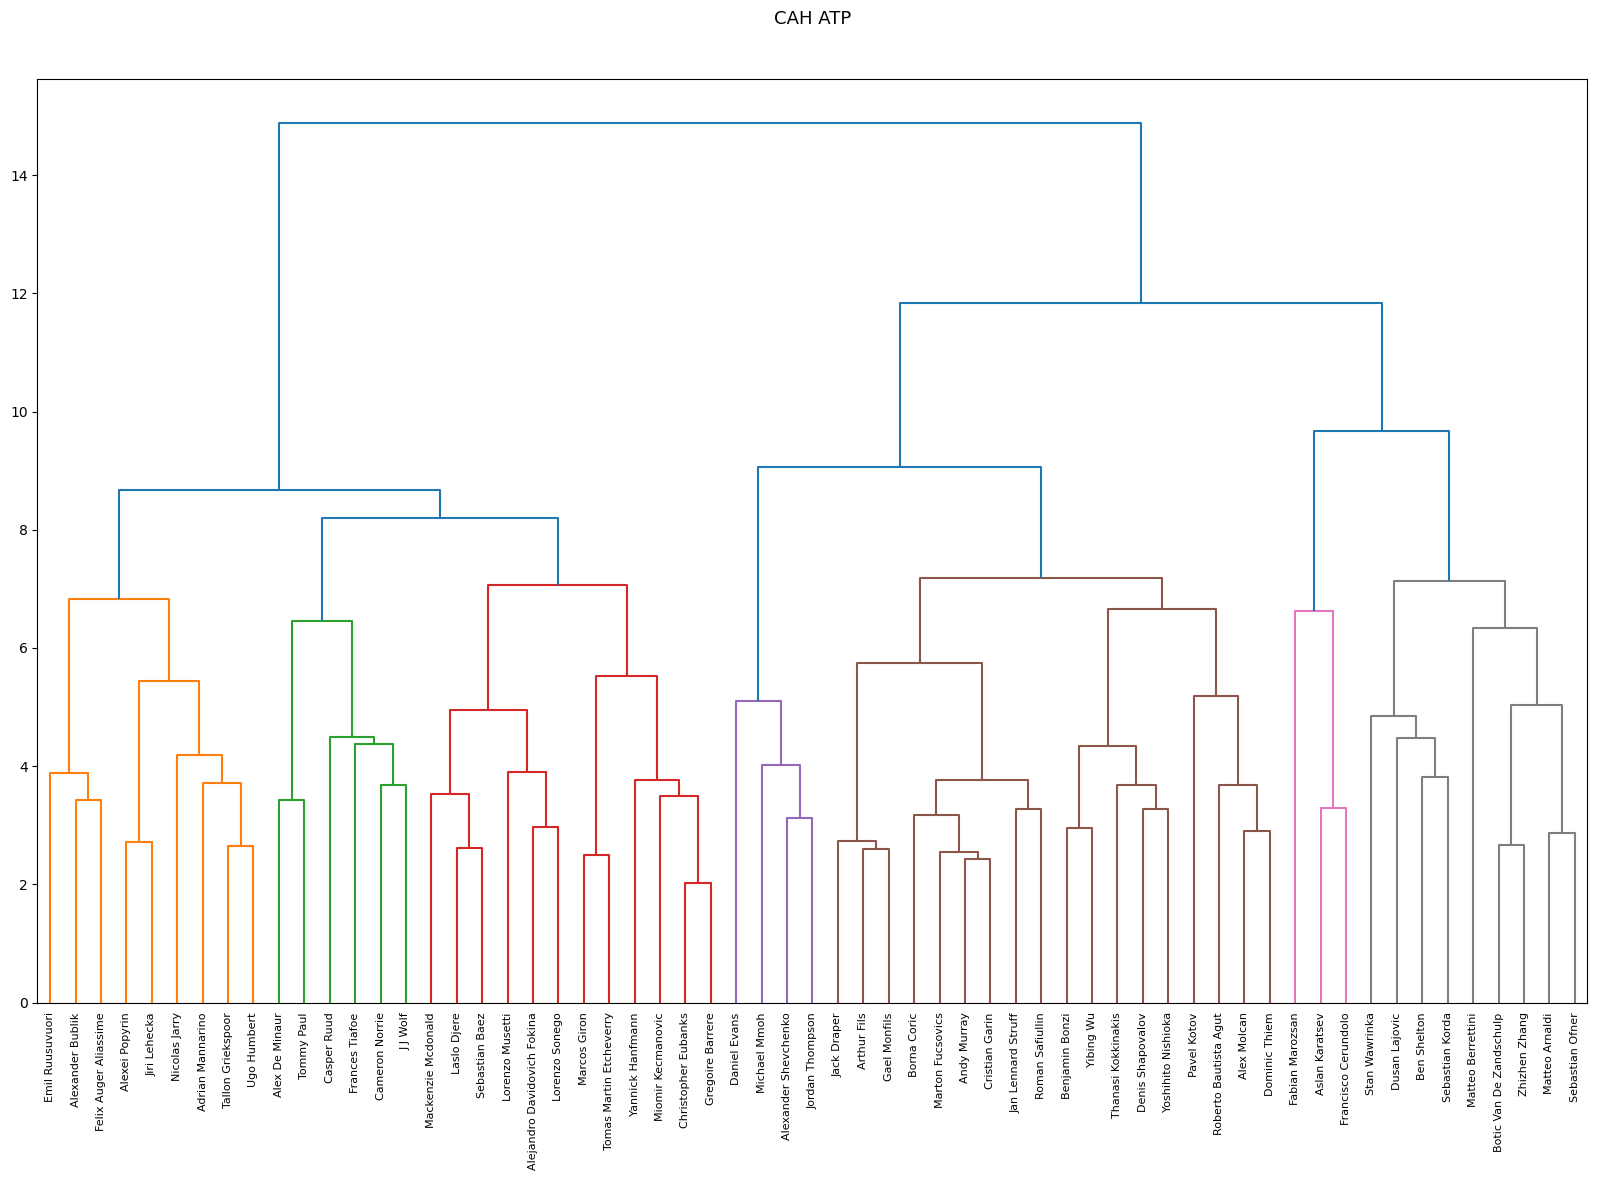

In [85]:
scal_h = pre.StandardScaler().fit_transform(bdd_h)
scal_h = pd.DataFrame(scal_h,index=bdd_h.index,columns=bdd_h.columns)
Zh = linkage(scal_h,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH ATP',y=1.05,fontsize=13)

dendrogram(Zh,labels=scal_h.index,leaf_font_size=8,color_threshold=8)

plt.show()

In [86]:
cah_cluster_h = fcluster(Zh,t=8,criterion='distance')
scal_h['cah cluster'] = cah_cluster_h
scal_h['cah cluster'] = scal_h['cah cluster'].astype('category')
scal_h.reset_index(inplace=True)
c1h = scal_h['cah cluster']==1
c2h = scal_h['cah cluster']==2
c3h = scal_h['cah cluster']==3
c4h = scal_h['cah cluster']==4
c5h = scal_h['cah cluster']==5
c6h = scal_h['cah cluster']==6
c7h = scal_h['cah cluster']==7

cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_h = cah_cluster_mean_h.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_h

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\1123860806.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T


Grande séparation entre les groupes 1 à 3 et les groupes 4 à 7, mais principalement par le nombre de matchs joués.

Si les groupes 1 et 2 présentent des caractéristiques intéressantes en %W, ce n'est pas le cas pour le G3. De l'autre coté le G6 et le G7 affichent également des caractéristiques intéressantes en %W

In [87]:
scal_h['name'][c2h][scal_h['name'][c2h].isin(III_atp)==True]

2     Alex De Minaur
15       Casper Ruud
25    Frances Tiafoe
55        Tommy Paul
Name: name, dtype: object

In [88]:
scal_h['name'][c2h][scal_h['name'][c2h].isin(III_atp)==False]

14    Cameron Norrie
29          J J Wolf
Name: name, dtype: object

**De Minaur - 12e 64M 64%W**

Il était très proche de la TL II, il a évidemment sa place en TL III

**Ruud - 11e 57M 61%W**

En 0-2 TL I, 2-2 TL II, 2-1 TL III c'est plutôt correct, en 10-7 TL IV, 9-5 TL V, 11-5 TL VI et 1-0 TL VII, on voit que ce n'est pas du tout régulier pour un joueur de ce standing et que "n'importe qui" pouvait le battre et c'est arrivé trop de fois, néanmoins ça reste un joueur solide, finaliste une seconde fois conséqutive à RG et gardera sa place en TL III

**Tiafoe - 16e 52M 63%W**

En 0-2 TL I, 0-4 TL II et 0-2 TL III, il n'y arrive pas contre l'élite de l'ATP et il n'a jamais battu un joueur mieux classé que lui cette saison. Ensuite c'est forcément mieux avec 11-3 TL IV, 7-6 TL V, 13-1 TL VI et 2-1 TL VII, il montre une petite domination lorsqu'il est favoris (attention 7-6 TL V et une défaite TL VII)

Encore un cas épineux pour lequel on va résumer les pour les contre :

- <font color='green'> **63%W**

- <font color='red'> **0-8 TL I-III (aucune victoire contre un joueur mieux classé)**

- <font color='green'> **10-3 TL IV**

- <font color='red'> **7-6 TL V**

- <font color='green'> **13-1 TL VI**

- <font color='red'> **2-1 TL VII**

(post edit : il aura finalement 2 victoires en TL III via les promotions de Mannarino et Griekspoor)
    
Il est 16e mondial et sur le papier je l'aurais signé en TL III sans problème, c'est un cas complexe. On va dire son 63%W sur 52M le sauve et qu'il peut garder sa place en TL III (la TL IV comportera forcément des cas bien pire que Tiafoe)
    
**Paul - 13e 64M 61%W**

En 1-5 TL I, 2-1 TL II, 2-5 TL III et 9-7 TL IV, on remarque des défaillances contre les meilleurs joueurs qui n'est pas rattrapé par un très bon %W TL IV. En 10-3 TL V, 11-4 TL VI et 4-0 TL VII, c'est mieux mais il a esquissé quelques contre perfs en TL VI.
    
Il reste dominateur dans l'ensemble et est capable de quelques bonnes perfs, il peut rester en TL III.    

&nbsp;    
    
**Norrie - 18e 53M 58%W**
    
En 1-2 TL I, 1-3 TL II, 0-3 TL III et 3-8 TL IV, c'est catastrophique.

**Wolf - 54e 51M 51%W**
    
RAS    

In [89]:
scal_h['name'][(c1h)][scal_h['name'][c1h].isin(III_atp)==True]

44    Nicolas Jarry
56      Ugo Humbert
Name: name, dtype: object

In [90]:
scal_h['name'][(c1h)][scal_h['name'][c1h].isin(III_atp)==False]

0          Adrian Mannarino
4          Alexander Bublik
6            Alexei Popyrin
22          Emil Ruusuvuori
24    Felix Auger Aliassime
32             Jiri Lehecka
52        Tallon Griekspoor
Name: name, dtype: object

**Jarry - 19e 53M 66%W**
    
Pour le coup, son %W est très élevé, il devrait rester dans la TL III sans trop de surprise
    
En 0-2 TL I, 4-6 TL II, 2-5 TL III et 6-2 TL IV, on voit un désavantage contre plus forts, mais c'est légèrement rattrapé par la TL IV et on peut consider ce bilan comme correct. En 8-2 TL V, 13-0 TL VI et 2-1 TL VII, sa supérioté se fait sentir malgré une vraie contre-perf en TL VII. Sa place est bien en TL III

**Humbert - 20e 49M 57%W****
    
En 0-1 TL I, 2-6 TL II, 3-2 TL III et 2-1 TL IV, c'est plutôt maitrisé à partir de la TL III. En 9-7 TL V, 10-3 TL VI et 2-1 TL VII, ce n'est pas execptionnel surtout en TL V.

Humbert a fortement progressé au cours de la saison, où le début n'était vraiment pas bon. Il a un peu de mal contre les TL II-, mis à part il est plutôt solide et malheuresemnt mauvais sur terre, il a souvent perdu et ce contre des joueurs de TL inférieures. Toutefois, il mérite sa place en TL III

&nbsp;

**Mannarino - 22e 61M 62%W**
    
En 1-2 TL I, 2-3 TL II et 3-5 TL III, il ne domine pas mais ne s'effondre pas pour autant et aura réussi pas mal de bonnes perfs. En 5-2 TL IV, 10-7 TL V, 14-4 RL VI et 3-0 TL VII, c'est plutôt correct. Il y a des hauts et des bas, comme pour la plupart des joueurs de cette TL et il mérite d'y être
    
<font color='green'> **Direction TL III**   
    
**Popyrin - 40e 43 49%W**
    
RAS    
    
**Ruusuvuori - 69e 44M  48%W**
    
RAS    
    
**Auger - 29e 41M 54%W**
    
En 0-3 TL I, 2-2 TL II et 2-0 TL III, on est sur des bons résultats. En 4-3 TL IV, 6-8 TL V, 7-3 TL VI et 1-0 TL VII, ça devient moyen et le 6-8 TL V est trop mauvais pour un passage dans la TL supérieure     
    
**Lehecka - 31e 51M 55%W**
    
En 0-1 TL I, 2-7 TL II et 1-2 TL III, c'est très léger voire pas bon contre l'élite. En 7-4 TL IV, 8-6 TL V, 7-3 TL VI et 3-0 TL VII, ce n'est pas non plus très régulier. Aucune chance pour la TL III
        
**Griekspoor - 23e 52M 62%W****
        
En 0-4 TL I, 3-6 TL II, 3-2 TL III et 3-1 TL IV, c'est plutôt mitigé et convenable. En 9-5 TL V, 13-2 TL VI et 2-0 TL VII, c'est un peu plus solide. Ces principaux défauts sont les TL I et II, ensuite c'est honorable et mérite une place en TL III
    
<font color='green'> **Direction TL III**

In [91]:
scal_h['name'][(c6h)][scal_h['name'][c6h].isin(III_atp)==True]

Series([], Name: name, dtype: object)

In [92]:
scal_h['name'][(c6h)][scal_h['name'][c6h].isin(III_atp)==False]

9          Aslan Karatsev
23        Fabian Marozsan
26    Francisco Cerundolo
Name: name, dtype: object

Aucun joueur de la TL III, mais en même il n'y a que 3 joueurs et on va prendre le temps de les étudier

**Karatsev - 35e 40M 55%W**

En 1-0 TL I, 0-4 TL II, 3-4 TL II et 4-2 TL IV, on est sur des stats corrects. En 5-4 TL V, 7-4 TL VI et 2-0 TL VII, on aperçoit de sérieuses lacunes et il n'est clairement pas assez impérial sur les TL V+ pour prétendre à la TL III

**Marozsan - 64e 18M 61%W**

18 matchs c'est très peu, en 1-0 TL I, 0-1 TL II, 2-0 TL III et 1-2 TL IV, il est imprésible et n'a pas peur des grands matchs, son bilan contre l'élite est excellent. En 2-1 TL V et 5-3 TL VI, ça reste correct. 

Ici, on a surtout un nombre très faible de matchs, donc on le connait moins et il est plus difficile de juger sa régularité, en témoigne un 5-3 TL VI. Maintenant il a 61%W et pas contre n'importe qui, il a 24 ans, il est jeune mais ce n'est pas un crack précoce. Il aura excellé lors des quelques tournois qu'il a joué, mais on a pas assez d'informations sur ce joueur pour le mettre en TL III

**Cerundolo - 21e 57M 61%W**

En 1-0 TL I, 1-5 TL II, 4-4 TL III et 5-5 TL IV, c'est dans l'ensemble correct. En 9-3, 3-4, 13-4, 2-1, ce n'est impérial tout le temps mais c'est sérieux et on a vu bien pire, je pense qu'il mérite sa place en TL III

<font color='green'> **Direction TL III**

In [93]:
scal_h['name'][(c7h)][scal_h['name'][c7h].isin(III_atp)==True]

10          Ben Shelton
41    Matteo Berrettini
49      Sebastian Korda
Name: name, dtype: object

In [94]:
scal_h['name'][(c7h)][scal_h['name'][c7h].isin(III_atp)==False]

13    Botic Van De Zandschulp
21              Dusan Lajovic
40             Matteo Arnaldi
50            Sebastian Ofner
51              Stan Wawrinka
60              Zhizhen Zhang
Name: name, dtype: object

**Shelton - 17e 48M 50%W**

RAS

<font color='red'> **Direction TL IV**
    
**Berrettini - 90e 16M 50%W**
    
RAS
    
<font color='red'> **Direction TL IV**     

**Korda - 24e 40M 63%W**
    
En 3-2 TL I, 1-3 TL II et 2-0 TL III, on est tout simplement sur du solide contre l'élite. En 5-3 TL IV, 8-4 TL V, 6-2 TL VI et 0-1 TL VII, c'est plutôt correct (on aurait aimé la défaite TL VII en moins). Korda c'est un très beau joueur, pour lequel on attends plus et flirtant avec la BlackList, néanmoins aucun doute sur sa place en TL III       
    
&nbsp;    

Pour les autres noms, inutile de regarder, ils n'ont aucune chance pour la TL III, on les retrouvera dans la prochaine partie   

In [95]:
scal_h['name'][~(c1h+c2h+c6h+c7h)][scal_h['name'][~(c1h+c2h+c6h+c7h)].isin(III_atp)==True]

Series([], Name: name, dtype: object)

Aucun joueur de la TL III dans les autres groupes, on ne penchera pas dessus

### Récapitulatif

Promotion en TL III :

- Mannarino
- Griekspoor
- Cerundolo

Relégation en TL IV :

- Shelton
- Berrettini


In [96]:
III_atp = ['Alex De Minaur','Casper Ruud','Tommy Paul','Frances Tiafoe','Nicolas Jarry','Ugo Humbert','Sebastian Korda',
          'Adrian Mannarino','Tallon Griekspoor','Francisco Cerundolo']
IV_atp = ['Cameron Norrie', 'Jan Lennard Struff','Alejandro Davidovich Fokina','Lorenzo Musetti','Sebastian Baez',
          'Felix Auger Aliassime','Tomas Martin Etcheverry','Jiri Lehecka','Alexander Bublik','Laslo Djere','Aslan Karatsev',
          'Arthur Fils','Roman Safiullin','Matteo Arnaldi','Jack Draper','Gael Monfils','Ben Shelton','Matteo Berrettini']

### WTA

In [97]:
III_wta

['Liudmila Samsonova',
 'Veronika Kudermetova',
 'Caroline Garcia',
 'Ekaterina Alexandrova',
 'Victoria Azarenka',
 'Donna Vekic',
 'Sorana Cirstea',
 'Anastasia Potapova',
 'Mirra Andreeva',
 'Paula Badosa',
 'Maria Sakkari',
 'Beatriz Haddad Maia',
 'Qinwen Zheng',
 'Daria Kasatkina']

In [98]:
bdd_f = tennis_p.loc[tennis_p['name'].isin(III_wta+IV_wta+V_wta)==True]
bdd_f = pd.merge(bdd_f,tennis_wl,on='player_id',how='inner')
bdd_f.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_f.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_f = bdd_f.groupby(['name','tier_list']).sum()
bdd_f['M'] = bdd_f['win'] + bdd_f['lose']
bdd_f['%W'] = bdd_f['win'] / bdd_f['M']
bdd_f.drop(columns={'win','lose'},inplace=True)
bdd_f = bdd_f.pivot_table(index='name',columns='tier_list')
bdd_f.fillna(0,inplace=True)
bdd_f.head()

%W                                                 \
tier_list                   I   II       III    IV         V        VI   VII   
name                                                                           
Alycia Parks              0.0  0.0  0.333333  0.25  0.333333  0.500000  1.00   
Amanda Anisimova          0.0  0.0  0.250000  0.00  0.000000  0.000000  1.00   
Anastasia Pavlyuchenkova  0.0  0.0  0.555556  1.00  0.000000  0.800000  1.00   
Anastasia Potapova        0.4  0.4  0.400000  0.50  0.800000  0.733333  1.00   
Anhelina Kalinina         0.0  0.5  0.333333  0.25  0.538462  0.666667  0.75   

                            M                                  
tier_list                   I   II  III   IV     V    VI  VII  
name                                                           
Alycia Parks              0.0  3.0  6.0  4.0   6.0  14.0  1.0  
Amanda Anisimova          0.0  0.0  4.0  1.0   1.0   1.0  1.0  
Anastasia Pavlyuchenkova  1.0  2.0  9.0  3.0   4.0   5.0  2.0  
Anastasia Potapova        5.0  5.0  5.0  4.0  10.0  15.0  1.0  
Anhelina Kalinina         0.0  6.0  9.0  4.0  13.0  12.0  4.0

In [99]:
bdd_f.shape

(60, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


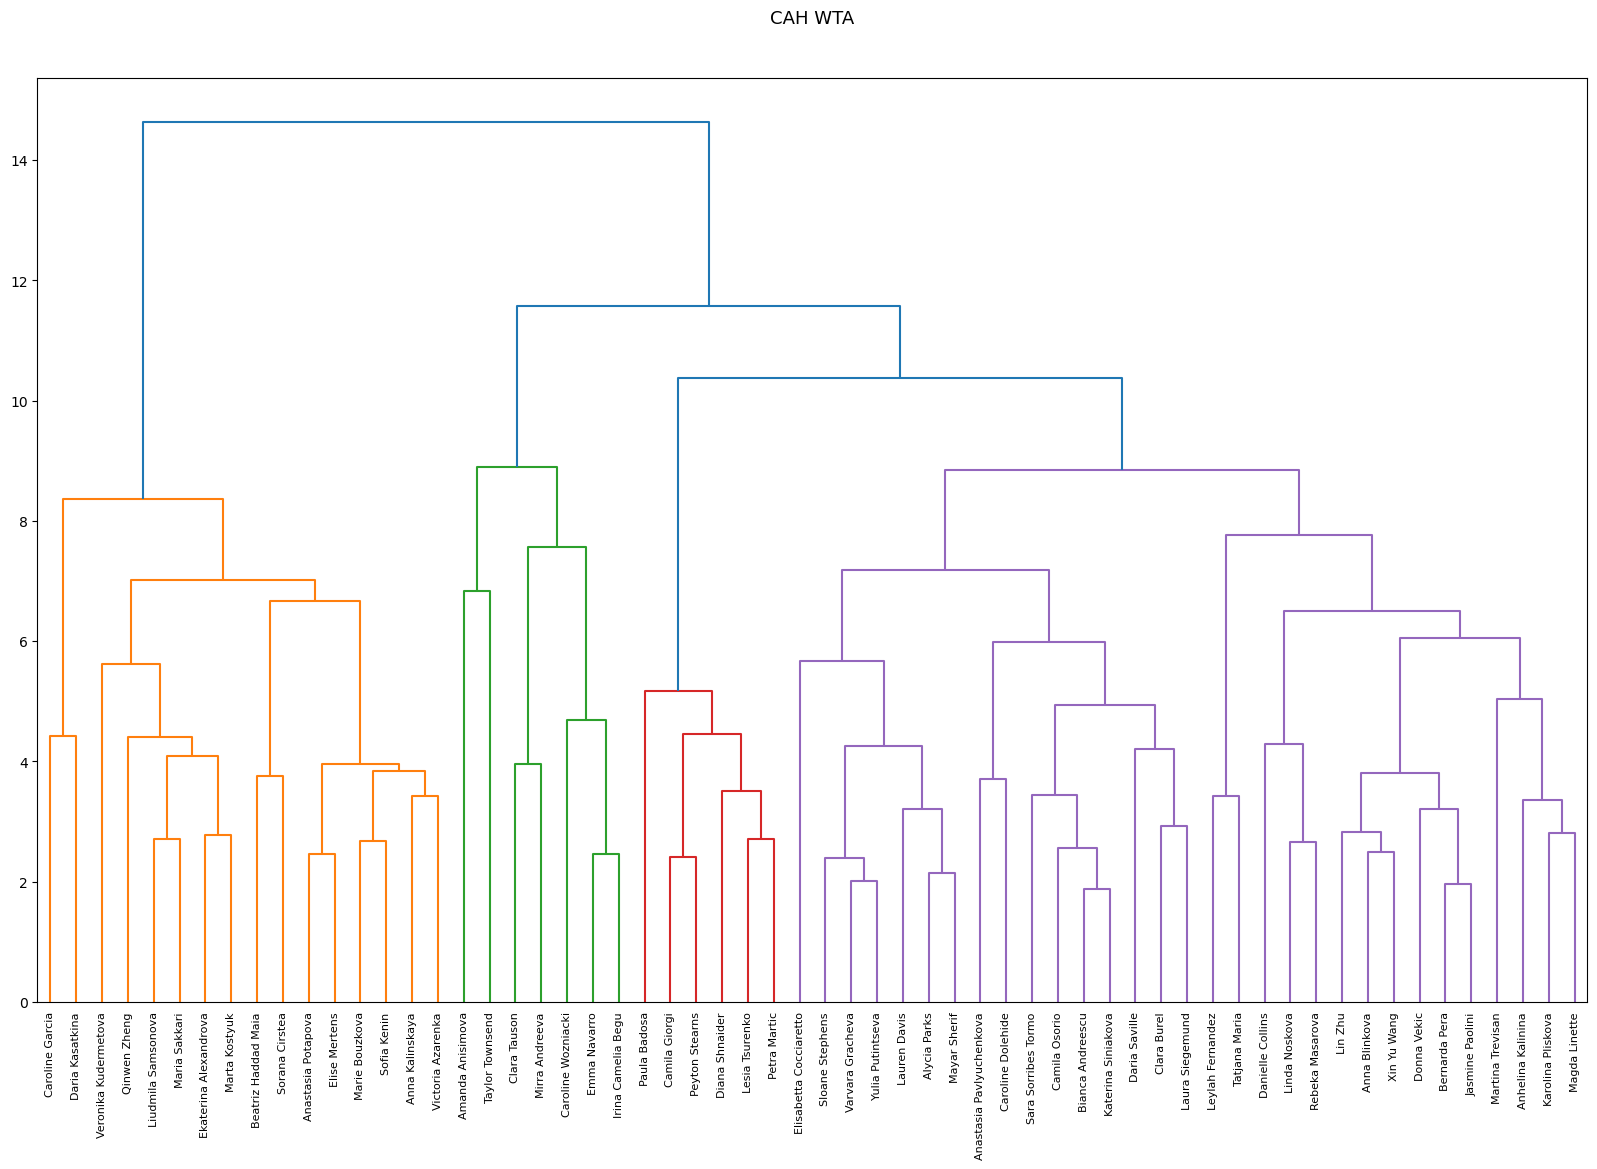

In [100]:
scal_f = pre.StandardScaler().fit_transform(bdd_f)
scal_f = pd.DataFrame(scal_f,index=bdd_f.index,columns=bdd_f.columns)

Zf = linkage(scal_f,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH WTA',y=1.05,fontsize=13)

dendrogram(Zf,labels=scal_f.index,leaf_font_size=8,color_threshold=9)

plt.show()

In [101]:
cah_cluster_f = fcluster(Zf,t=9,criterion='distance')
scal_f['cah cluster'] = cah_cluster_f
scal_f['cah cluster'] = scal_f['cah cluster'].astype('category')
scal_f.reset_index(inplace=True)
c1f = scal_f['cah cluster']==1
c2f = scal_f['cah cluster']==2
c3f = scal_f['cah cluster']==3
c4f = scal_f['cah cluster']==4

cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_f = cah_cluster_mean_f.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_f

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\2598583382.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T


Le G1 est de loin le meilleur groupe, ensuite le G2 et le G3, qui présente principalement des caractéristiques négatives sur le nombre de matchs joués, a des caractéristiques mitigées pour les %W (le G3 semble légèrement meilleur). Puis le G4, avec énormément de joueuse est le pire des 4. 

In [102]:
scal_f['name'][c1f][scal_f['name'][c1f].isin(III_wta)==True]

3        Anastasia Potapova
7       Beatriz Haddad Maia
13          Caroline Garcia
18          Daria Kasatkina
22    Ekaterina Alexandrova
36       Liudmila Samsonova
38            Maria Sakkari
47             Qinwen Zheng
52           Sorana Cirstea
56     Veronika Kudermetova
57        Victoria Azarenka
Name: name, dtype: object

In [103]:
scal_f['name'][c1f][scal_f['name'][c1f].isin(III_wta)==False]

6     Anna Kalinskaya
24      Elise Mertens
39     Marie Bouzkova
40      Marta Kostyuk
51        Sofia Kenin
Name: name, dtype: object

Logiquement il y a beaucoup de joueuse dans ma TL III, cependant on va tout de même bien regarder chacun des cas

**Potapova - 28e 45M 62%W**

En 2-3 TL I, II et III, on un bilan correct d'une joueuse dangereuse. En 2-2 TL IV, 8-2 TL V, 11-4 TL VI et 1-0 TL VII, c'est également solide dans l'ensemble. Elle a sa place en TL III

**Haddad - 11e 45M 58%W**
    
En 1-2 TL I, 1-5 TL II, 5-3 TL TII et 4-4 TL IV, c'est plutôt mitigé. En  10-1 TL V et 5-4 TL VI, c'est intéressant mais contre la TL VI on aurait espérer mieux pour une joueuse 11e mondiale. Elle est irréguliaire, mais en soit elle a sa place en TL III
    
**Garcia - 20e 59M 59%W**

En 0-1 TL I, 1-3 TL II et 1-7 TL III, c'est vraiment mauvais. En 7-4 TL IV et 9-8 TL V, ce n'est pas impérial. En 15-1 TL VI et 2-0 TL VII, c'est excellent et on voit d'où vient son %W.

Si on prends l'ensemble de la TL V-, elle est en 18-23 et c'est clairement insuffisant pour de la TL III

<font color='red'> **Direction TL IV**
    
**Kasatkina - 18e 60M 60%W**

En 0-4 TL I, 4-8 TL II et 0-5 TL III, on est également sur un bilan très mauvais. En 7-3 TL IV, 13-3 TL V, 9-1 TL VI et 3-0 TL VII, c'est forcément mieux et même bien.
    
On est quand même sur du 4-17 TL III-, malheuresement ce sera rédhibitoire pour la TL III     
    
<font color='red'> **Direction TL IV**        

**Alexandrova - 21e 53M 60%W**
    
En 1-3 TL I, 1-6 TL II, 4-4 TL III, 2-2 TL IV et 8-5 TL V, ça peine à battre régulièrement les bonnes joueuses du circuit. En 14-1 TL VI et 2-0 TL VII, c'est excellent.
    
Comme elle est équilibre en TL III-IV, contre les joueuses de son niveau c'est correct, c'est après que ça devient plus difficile. Ce n'est pas excellent contre la TL V mais lorsqu'elle est vraiment favoris, elle ne fait pas de doute. Elle peut garder sa place en TL III        

**Samsonova - 15e 55M 60%W**
 
En 3-5 TL I, 5-3 TL II et 5-5 TL III, là on est sur du très solide avec une joueuse qui a posé énormément de problèmes à l'élite du circuit. En 2-3 TL IV, 7-5 TL V, 10-1 TL VI et 1-0 TL VII, elle a des difficultés sur les TL IV et V, ensuite c'est parfait. Elle mérite largement sa place en TL III    

**Sakkari - 8e 55M 62%W**
    
Son cas fut longuement débattu pour la TL II, elle a bien évidemment sa place en TL III    

**Zheng - 14e 49M 65%W**

On a aussi déjà vu son cas pour la TL II, elle a sa évidemment sa place en TL II    

**Cirstea - 34e 44M 52%W**
    
En 2-2 TL I, 4-6 TL II et 4-4 TL III, c'est très solide. En 1-2 TL IV, 5-4 TL V et 7-3 TL VI, forcément c'est pas terrible au vu de %W global.

Ici on a une vraie coupeuse de tête, un cas typique de la BlackList. Même si son %W global est faible et que ses performances face à la TL IV+ sont moyennes, elle est extrêmement dangereuse, quelque soit la joueuse en face, et pour cela elle mérite sa place en TL III      

**Kudermetova - 16e 53M 60%W**
    
En 5-4 TL I, 1-2 TL II, 6-3 TL III et 5-3 TL IV, que dire de plus, là aussi ça coupe des têtes et beaucoup. En 4-5 TL V, 9-2 TL VI et 2-2 TL VII, c'est nul et on a encore un cas de la BlackList, néanmoins elle mérite place en TL III   

**Azarenka - 23e 42M 55%W**
    
En 1-1 TL I, 2-5 TL II, 3-3 TL III et 4-4 TL IV, c'est correct. En 5-3 TL V, 7-3 TL VI 2-0, c'est aussi ± correct.
    
Le bilan n'est ni exceptionnel, ni catastrophique, on peut la laisser en TL III    

&nbsp; 
    
**Kalinskaya - 80e 27M 57%W**
    
En 1-1 TL I, 1-1 TL II, 1-2 TL III et 2-2 TL IV, il y a peu de matchs mais c'est plutôt solide. En 2-3 TL V, 8-2 TL VI et 1-0 TL VII, c'est pas bon en TL V et ça s'en fort bien en TL VI+ 
    
Elle a joué 27 matchs, ce qui n'est énorme, même si elle a été solide sur les TL IV-, ce n'est pas le cas contre la TL V. Franchement 80e, je la connais peu et je ne pense pas qu'elle mérite sa place en TL III    
    
**Mertens - 30e 46M 57%W**

En 1-3 TL I, 1-1 TL II, 1-4 TL III et 2-3 TL IV, c'est pas terrible. En 9-6 TL V, 11-3 TL VI et 1-0 TL VII, elle se rattape et performe assez bien, mais ce n'est pas assez fort contre la TL IV- (également moyen en TL V) et n'a pas sa place en TL III 

**Bouzkova - 36e 41M 51%W**
    
En 2-3 TL I, 0-3 TL II, 2-4 TL III et 3-0 TL IV, c'est plutôt mitigé. En 4-6 TL V, 8-4 TL VI et 2-0 TL VII, c'est également mitigé. Elle n'a pas sa place en TL III

**Kostyuk - 38e 42M 52%W**
    
En 1-3 TL I, 1-5 TL II, 3-8 TL III et 1-1 TL IV, c'est vraiment mauvais. Elle n'a pas sa place en TL III    

**Kenin - 37e 39M 56%W**
    
En 2-3 TL I, 1-2 TL II, 3-3 TL III et 4-2 TL II, c'est plutôt correct. En 5-4 TL V, 5-3 TL VI et 2-0 TL VII, c'est vraiment pas terrible
    
Encore un cas de BlackList, anciennement 4e mondiale en 2020, elle a longtemps été absente du circuit et 2023 fut l'année de son retour. Elle est sur la bonne voie, mais contrairement à Cirstea et Kudermetova avec énormément de matchs en TL III-, je pense que la TL III est encore un peu juste pour Kenin     

In [104]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(III_wta)==True]

44    Paula Badosa
Name: name, dtype: object

In [105]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(III_wta)==False]

10     Camila Giorgi
20    Diana Shnaider
32    Lesia Tsurenko
45      Petra Martic
46    Peyton Stearns
Name: name, dtype: object

**Badosa - 68e 25M 68%W**

On a déjà étudié son cas, elle a sa place en TL III

&nbsp;

**Giorgi - 55e 33M 58%W**

En 2-8 TL III-, ce n'est pas assez fort pour la TL III

**Shnaider - 97e 26M 58%W**

En 2-7 TL II-IV, ce n'est pas assez fort pour la TL III 

**Tsurenko - 32e 31M 68%W**

Le %W est eceptionnel, en 0-2 TL I, 2-2 TL II, 2-3 TL III et 0-2 TL IV, pour le coup, ce n'est pas exceptionnel. Forcément ça va l'être avec 7-1 TL V et 10-0 TL VI, c'est dur de faire plus régulier que cela

<font color='green'> **Direction TL III**

**Martic - 41e 37M 49%W**

Recalée
    
**Stearns - 49e 29M 52%W**

En 1-6 TL III-, 1-1 TL IV et 4-5 TL V, c'est clairement insuffisant pour la TL III    

In [106]:
scal_f['name'][~(c1f+c3f)][scal_f['name'][~(c1f+c3f)].isin(III_wta)==True]

21       Donna Vekic
43    Mirra Andreeva
Name: name, dtype: object

Il n'y a que 2 joueuses de ma TL III figurant dans les 2 autres groupes, je ne m'attarderai pas sur les autres joueuses

**Vekic - 24e 42M 60%W**

En 1-2 TL I, 0-3 TL II, 6-1 TL III, 0-4 TL IV et 4-4 TL V, à part la TL III c'est catastrophique et malheuresement elle ne mérite pas sa place en TL III 

<font color='red'> **Direction TL IV**   

**Andreeva - 58e 21M 62%W**
    
En 0-4 TL I, 1-1 TL II, 2-0 TL III 3-1 TL IV, 0-1 TL et 7-1 TL VII, il y a peu de matchs mais dans l'ensemble c'est plutôt bon.
    
Ici on a le cas d'une crack précoce, agée de seulement 16 ans. Pour sa première vraie année sur le circuit, si on enllève la TL I, on est sur un solide 13-4 et rien que pour ça, elle mérite sa place en TL III.    

&nbsp;
    
### Récapitulatif
    
<font color='green'> **Promotion en TL III :**
    
- Tsurenko     
    
<font color='red'> **Relégation en TL IV :**

- Garcia    
- Kasatkina    
- Vekic    

In [107]:
III_wta

['Liudmila Samsonova',
 'Veronika Kudermetova',
 'Caroline Garcia',
 'Ekaterina Alexandrova',
 'Victoria Azarenka',
 'Donna Vekic',
 'Sorana Cirstea',
 'Anastasia Potapova',
 'Mirra Andreeva',
 'Paula Badosa',
 'Maria Sakkari',
 'Beatriz Haddad Maia',
 'Qinwen Zheng',
 'Daria Kasatkina']

In [108]:
III_wta = ['Liudmila Samsonova','Veronika Kudermetova','Ekaterina Alexandrova','Victoria Azarenka','Sorana Cirstea',
           'Anastasia Potapova','Mirra Andreeva','Paula Badosa','Maria Sakkari','Beatriz Haddad Maia','Qinwen Zheng',
           'Lesia Tsurenko']

IV_wta =   ['Magda Linette','Anhelina Kalinina','Elise Mertens','Jasmine Paolini','Sofia Kenin','Marie Bouzkova',
            'Leylah Fernandez','Petra Martic','Linda Noskova','Anastasia Pavlyuchenkova','Caroline Garcia','Donna Vekic',
            'Daria Kasatkina']

In [109]:
atp_pr['tier_list'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                       'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_pr['name'],atp_pr['rank'])]
wta_pr['tier_list'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                       'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_pr['name'],wta_pr['rank'])]
atp_matches['winner_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                            'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['winner_name'],atp_matches['winner_rank'])]
atp_matches['loser_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                           'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['loser_name'],atp_matches['loser_rank'])]
wta_matches['winner_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                            'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['winner_name'],wta_matches['winner_rank'])]
wta_matches['loser_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                           'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['loser_name'],wta_matches['loser_rank'])]
atp_pr['genre'] = 'H'
wta_pr['genre'] = 'F'

tennis_p = pd.concat([atp_pr,wta_pr])
tennis_m = pd.concat([atp_matches,wta_matches])
tennis_m.drop(columns={'winner_name','loser_name','tourney_name','tourney_date','winner_ioc','winner_age','loser_ioc','loser_age','round','score','winner_rank',
                       'loser_rank','match_num'},inplace=True)
tennis_w = tennis_m.drop(columns={'loser_id'}).copy()
tennis_w['win'] = 1
tennis_w = tennis_w.groupby(by=['winner_id','surface','tourney_level','loser_tl'],as_index=False).sum()
tennis_l = tennis_m.drop(columns={'winner_id'}).copy()
tennis_l['lose'] = 1
tennis_l = tennis_l.groupby(by=['loser_id','surface','tourney_level','winner_tl'],as_index=False).sum()
tennis_w.rename(columns={'winner_id':'player_id','loser_tl':'tier_list'},inplace=True)
tennis_l.rename(columns={'loser_id':'player_id','winner_tl':'tier_list'},inplace=True)
tennis_wl = pd.merge(tennis_w,tennis_l,how='outer',on=['player_id','tourney_level','surface','tier_list'])
tennis_wl.fillna(0,inplace=True)
tennis_wl['win'] = np.int64(tennis_wl['win'])
tennis_wl['lose'] = np.int64(tennis_wl['lose'])

In [110]:
tennis_wl.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_winlose.csv",index=False)
tennis_p.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_player.csv",index=False)

## Tier List IV

Pour cette dernière TL, les critères seront plus compliqués à définir. La régularité aura un impact bien moindre cette fois-ci et c'est plutôt les résultats face aux TL IV- qui vont m'intéresser pour faire en sorte d'avoir des joueurs "plus dangereux" que ceux de la TL V pour les meilleurs joueurs du circuit. Cela n'exclut pas qu'un joueur avec de très mauvais résultats contre les TL III-, mais excellent face au TL V+ puisse faire partie de la TL.

Pour résumer, on devrait avoir 3 profils de joueurs : des joueurs irréguliers capables de battre n'importe qui (souvent associés à la BlackList), des joueurs surdominant les TL inférieures, puis des joueurs semi-irréguliers dominant les TL inférieures 

### ATP

In [111]:
IV_atp

['Cameron Norrie',
 'Jan Lennard Struff',
 'Alejandro Davidovich Fokina',
 'Lorenzo Musetti',
 'Sebastian Baez',
 'Felix Auger Aliassime',
 'Tomas Martin Etcheverry',
 'Jiri Lehecka',
 'Alexander Bublik',
 'Laslo Djere',
 'Aslan Karatsev',
 'Arthur Fils',
 'Roman Safiullin',
 'Matteo Arnaldi',
 'Jack Draper',
 'Gael Monfils',
 'Ben Shelton',
 'Matteo Berrettini']

Pour rappel, lors de l'ajustement de la TL II, j'ai étudié certains cas de la TL III sur lesquels je ne reviendrai pas et qui feront partie de la TL III finale : Ruud, Korda, Paul et Mannarino

In [112]:
bdd_h = tennis_p.loc[(tennis_p['name'].isin(IV_atp+V_atp)==True)&(tennis_p['name'].isin(G1)==False)]
bdd_h = pd.merge(bdd_h,tennis_wl,on='player_id',how='inner')
bdd_h.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_h.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_h = bdd_h.groupby(['name','tier_list']).sum()
bdd_h['M'] = bdd_h['win'] + bdd_h['lose']
bdd_h['%W'] = bdd_h['win'] / bdd_h['M']
bdd_h.drop(columns={'win','lose'},inplace=True)
bdd_h = bdd_h.pivot_table(index='name',columns='tier_list')
bdd_h.fillna(0,inplace=True)

In [113]:
bdd_h.shape

(51, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


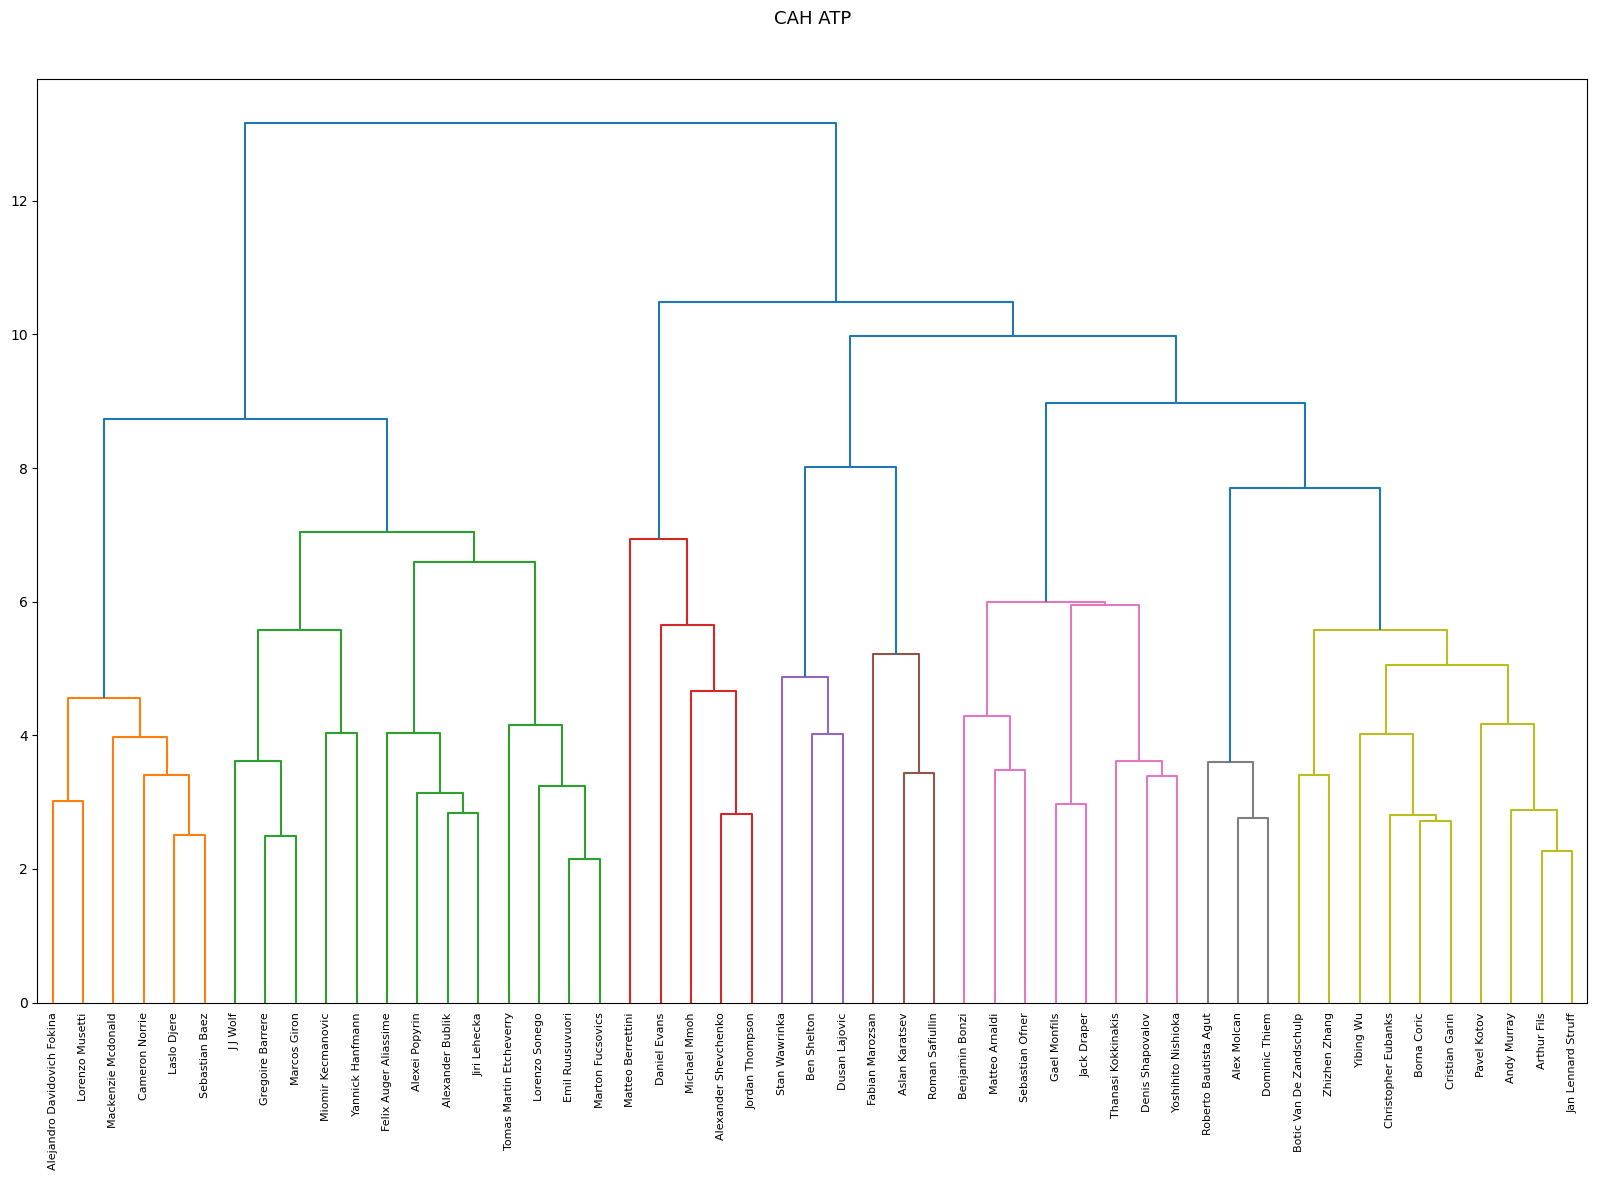

In [114]:
scal_h = pre.StandardScaler().fit_transform(bdd_h)
scal_h = pd.DataFrame(scal_h,index=bdd_h.index,columns=bdd_h.columns)
Zh = linkage(scal_h,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH ATP',y=1.05,fontsize=13)

dendrogram(Zh,labels=scal_h.index,leaf_font_size=8,color_threshold=7.6)

plt.show()

In [115]:
cah_cluster_h = fcluster(Zh,t=7.6,criterion='distance')
scal_h['cah cluster'] = cah_cluster_h
scal_h['cah cluster'] = scal_h['cah cluster'].astype('category')
scal_h.reset_index(inplace=True)
c1h = scal_h['cah cluster']==1
c2h = scal_h['cah cluster']==2
c3h = scal_h['cah cluster']==3
c4h = scal_h['cah cluster']==4
c5h = scal_h['cah cluster']==5
c6h = scal_h['cah cluster']==6
c7h = scal_h['cah cluster']==7

cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_h = cah_cluster_mean_h.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_h

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\3275738515.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_h = scal_h.groupby('cah cluster').mean().T


L'écart de niveau se resserant de plus en plus, cela devient plus difficile d'identifier des bons ou mauvais groupe avec la CAH.

Le G1 semble être le meilleur avec surtout beaucoup de matchs joués et des %W convenable dans l'ensemble. Pour les autres groupes, c'est clairement moins évident, on va donc tout simplement faire au cas par cas.

Le point positif, c'est qu'on a déjà vu des cas dans les parties précédentes "Tier List VI" et "Tier List III", ce qui nous permettera de passer rapidement plusieurs cas qui sont déjà assurer d'être en TL IV ou V

In [116]:
scal_h['name'][c1h][scal_h['name'][c1h].isin(IV_atp)==True]

0     Alejandro Davidovich Fokina
12                 Cameron Norrie
29                    Laslo Djere
30                Lorenzo Musetti
42                 Sebastian Baez
Name: name, dtype: object

In [117]:
scal_h['name'][c1h][scal_h['name'][c1h].isin(IV_atp)==False]

32    Mackenzie Mcdonald
Name: name, dtype: object

**Davidovich - 26e 54M 56%W**

En 3-5 TL II, 2-4 TL III, 5-4 TL IV et 7-3 TL V, c'est très correct. En 10-4 TL VI et 3-0 TL VII, c'est aussi correct. Il a bien sûr sa place en TL IV

**Norrie - 18e 53M 58%W**

Norrie c'était surtout catastrophique contre les meilleurs du circuit, il a bien sûr sa place en TL IV

**Djere - 33e 54M 56%W**
    
En 0-11 TL I-II, 1-1 TL III, 3-4 TL II, 6-3 TL V, 16-5 TL VI et 4-0 TL VII. Il peine principalement contre la TL II-, mis à part ça c'est plutôt solide et on peut le laisser en TL IV     

**Musetti - 27e 54M 52%W**
    
Un terrien (16-11 terre vs 6-12 dur) et un partisan de la BlackList
    
En 1-5 TL I, 1-6 TL II et 1-4 TL III, c'est vraiment dur contre les meilleurs joueurs. En 4-4 TL IV, 6-1 TL V, 14-6 TL VI et 1-0 TL VII, c'est bien mieux. Il s'en sort assez bien sur la TL IV+, il peut garder sa place en TL IV   

**Baez - 28e 54M 54%W**
    
Pur terrien (19-12 sinon 10-13)
    
En 0-10 TL III-, 4-4 TL IV, 7-4 TL V, 14-7 TL VI et 4-0 TL VII. Il a un profil ± similaire à celui de Musetti, sauf qu'il n'a aucune victoire un TL III-, ce qui indique que c'est une proie facile pour les meilleurs joueurs du circuit et malheuresement il a plutôt sa place en TL V

<font color='red'> **Direction TL V**
    
&nbsp;

**Mcdonald - 41e 55M 53%W**

En 0-1 TL I, 2-5 TL II et 0-6 TL III, on a encore un joueur qui éprouve beaucoup de difficultés face à la TL III-. En 2-2 TL IV, 8-2 TL V, 15-10 TL VI et 2-0 TL VII, on est proche d'un Musetti, mais les ratio TL V et VI sont légèrement inférieurs et sa place restera en TL V

In [118]:
scal_h['name'][c2h][scal_h['name'][c2h].isin(IV_atp)==True]

2            Alexander Bublik
21      Felix Auger Aliassime
27               Jiri Lehecka
46    Tomas Martin Etcheverry
Name: name, dtype: object

In [119]:
scal_h['name'][c2h][scal_h['name'][c2h].isin(IV_atp)==False]

4        Alexei Popyrin
19      Emil Ruusuvuori
23     Gregoire Barrere
24             J J Wolf
31       Lorenzo Sonego
33         Marcos Giron
34     Marton Fucsovics
38    Miomir Kecmanovic
47     Yannick Hanfmann
Name: name, dtype: object

**Bublik - 32e 44M 45%W**

En 0-2 TL I, 3-6 TL II, 2-2 TL III et 2-2 TL IV, c'est correct. Par contre en 5-8 TL V, 7-4 TL IV et 1-0 TL VII, c'est catastrophique.

Bublik est l'incarnation de l'irrégularité, notamment sur la motivation, et est un membre important de la BlackList. Avec son 45%W global, on pourrait se dire que c'est rédhibtoire, le problème est que quand il veut jouer il est plutôt au niveau de la TL III minimun

Il ne faut pas lui faire confiance, mais c'est un joueur trop dangereux pour être un TL V

**Auger - 29e 41M 54%W**

En 0-3 TL I, 2-2 TL II, 3-2 TL III et 3-1 TL IV, il pose énormément de problème, lui qui était top 10, la saison dernière. En 6-8 TL V, 7-3 TL VI et 1-0 TL VII, on aperçoit les limites de ce joueur, qui est devenu très irrégulier. Néanmoins, il a sa place en TL IV

**Lehecka - 31e 51M 55%W**

Cas déjà vu précédemment, il a sa place en TL IV

**Etcheverry - 30e 55M 51%W**

Terrien (18-12 10-15)

En 0-6 TL II-, 4-6 TL III, 1-5 TL IV et 9-6 TL V, c'est trop juste pour la TL IV

<font color='red'> **Direction TL V**

&nbsp;
    
**Popyrin - 40e 43M 49%W**
    
En 2-4 TL II, 1-4 TL III et 4-2 TL IV, c'est passable. Par contre en 8-7 TL V, 4-4 TL VI et 2-1 TL VII, c'est mauvais. Il n'y a aucun doute sur sa place en TL V     
    
**Ruusuvuori - 69e 44M 48%W**
    
Cas déjà étudié
    
**Barrere - 84e 45M 47%W**
    
Cas déjà étudié
    
**Wolf - 54e 51M 51%W**
    
En 1-3 TL II, 2-6 TL III, 5-5 TL IV et 4-6 TL V, ce n'est pas catastrophique, mais ce n'est pas suffisant pour la TL IV    
    
**Sonego - 47e 54M 50%W**
    
En 0-5 TL I, 1-5 TL II, 5-3 TL III, 3-4 TL IV et 7-6 TL V, on est aussi plus sur un profil TL V    
    
**Giron - 59e 53M 45%W**
    
Cas déjà étudié
    
**Fucsovics - 53e 41M 54%W**

En 0-3 TL I, 1-3 TL II, 4-3 TL III, 1-3 TL IV et 6-4 TL V, c'est léger pour accéder à la TL IV, mais pas si mauvais que ça et si on ajoute son 8-2 TL VI et 2-0 TL VII, ça montre une légère supérioté face à la TL V+. A la frontière de TL IV-V, on peut lui accorder le droite d'entrer en TL IV
    
<font color='green'> **Direction TL IV**   
    
**Kecmanovic - 55e 52M 44%W**
    
Cas déjà étudié
    
**Hanfmann - 52e 43M 49%W**
    
Cas déjà étudié

In [120]:
scal_h['name'][c3h][scal_h['name'][c3h].isin(IV_atp)==True]

36    Matteo Berrettini
Name: name, dtype: object

In [121]:
scal_h['name'][c3h][scal_h['name'][c3h].isin(IV_atp)==False]

3     Alexander Shevchenko
15            Daniel Evans
28         Jordan Thompson
37            Michael Mmoh
Name: name, dtype: object

**Fils - 36e 34M 56%W**

En 0-2 TL I, 1-2 TL II, 3-3 TL III et 2-4 TL IV, c'est passable. En 5-1 TL V, 7-4 TL VI et 1-0 TL VII, c'est plutôt solide et mérite dans l'ensemble d'être en TL IV

**Struff - 25e 37M 54%W**

Finaliste surprise au M1000 de Madrid

En 0-1 TL I, 2-3 TL II, 3-4 TL III et 2-5 TL IV, c'est passable. En 6-1 TL V, 6-2 TL VI et 1-1 TL VII, c'est solide sauf pour la défaite TL VII. Il mérite sa place en TL IV

**Safiullin - 39e 38M 50%W**

En 1-1 TL I, 1-3 TL II, 3-3 TL III et 1-3 TL IV, c'est un joueur dangereux pour les meilleurs joueurs du circuit. En 5-3 TL V, 6-5 TL VI et 2-1 TL VII, ce n'est pas impérial.

Un joueur qui a réussi à se hisser parmi les joueurs récurrents du circuit cette saison. Il est encore très irrégulier, mais est capable de rivaliser face à de gros joueurs, il mérite sa place en TL IV.

&nbsp;

**Murray - 42e 32M 47%W**

Sir Andy Murray, on ne le présente plus, malheuresement à 36 ans et une hanche en titane, cela devient plus compliqué.

En 1-9 TL III- et 3-4 TL IV, il est devenu en peu trop tendre face aux meilleurs du circuit et malheuresement cela ne lui laisse plus qu'une place en TL V

**Coric - 37e 35M 49%W**

En 0-2 TL I, 1-3 TL II, 1-1 TL III, 1-6 TL IV et 3-3 TL V, là aussi c'est trop juste pour de la TL IV

**Van de Zandschulp - 51e 42M 45%W**

En 0-1 TL I, 2-4 TL II, 3-4 TL III et 1-4 TL IV, c'est limite passable. En 5-4 TL V, 8-5 TL VI et 0-1 TL VII, c'est pas bon et sa place est en TL V

**Eubanks - 34e 41M 51%W**

En 0-2 TL I, 1-3 TL II, 3-2 TL III et 1-3 TL IV, c'est plutôt mitigé. En 3-3 TL V, 10-6 TL VI et 3-1 TL VII, c'est également mitigé. Dans l'ensemble c'est très moyen et proche de la TL IV, mais en même temps, c'est sa première grosse saison sur le circuit (avec tout de même un QF à Wimbledon perdu en 5 sets face à Medvedev) et une place en TL V semble plus appropriée

**Garin - 87e 34M 56%W**

En 0-1 TL I, 0-3 TL II, 2-2 TL III et 1-4 TL IV, ce n'est pas suffisant pour de la TL IV

**Kotov - 67e 29M 52%W**

En 0-3 TL II, 1-2 TL III et 1-4 TL IV, là aussi c'est insuffisant pour la TL IV

**Wu - 116e 26M 50%W**

Cas déjà étudié

**Zhang - 58e 35M 51%W**
    
En 2-1 TL II 1-2 TL III, 2-5 TL IV et 5-5 TL IV, c'est trop léger pour la TL IV 

In [122]:
scal_h['name'][c4h][scal_h['name'][c4h].isin(IV_atp)==True]

8    Ben Shelton
Name: name, dtype: object

In [123]:
scal_h['name'][c4h][scal_h['name'][c4h].isin(IV_atp)==False]

18    Dusan Lajovic
44    Stan Wawrinka
Name: name, dtype: object

**Berrettini - 90e 15M 53%W**

Ancien top 10 très régulier et TL II il n'y a pas si longtemps, malheuresment il enchaine les blessures.

En 0-2 TL I, 1-0 TL II, 3-0 TL III, 0-1 TL IV, 2-3 TL V et 2-1 TL VI. Il a très peu joué, mais il a réussi à rester très solide contre de bons joueurs, de plus il a un passif récent et il peut garder une place en TL IV

&nbsp;

**Shevchenko - 49e 32M 50%W**

Cas déjà étudié

**Evans - 38e 35M 40%W**

Recalé

**Thompson - 56e 39M 49%W**

En 0-2 TL I, 2-1 TL II, 2-3 TL III et 1-1 TL IV, c'est solide. En 3-4 TL V, 8-6 TL VII et 3-3 TL VII, c'est catastrophique avec 3 défaites en TL VII, on peut être irrégulier mais on peut pas accepter ça en TL IV

**Mmoh - 122e 22M 59%W**

Cas déjà étudié

In [124]:
scal_h['name'][c5h][scal_h['name'][c5h].isin(IV_atp)==True]

7      Aslan Karatsev
41    Roman Safiullin
Name: name, dtype: object

In [125]:
scal_h['name'][c5h][scal_h['name'][c5h].isin(IV_atp)==False]

20    Fabian Marozsan
Name: name, dtype: object

**Molcan - 113e 29M 48%W**

Cas déjà étudié

**Shapovalov - 105e 26M 50%W**

Un membre très important de la BlackList, il y a encore quelques temps, maintenant il est 105e et la question ne se pose même plus

En 0-8 TL III-, on peut passer au cas suivant 

**Thiem - 97e 39M 46%W**

Vainqueur de l'US 2020, depuis c'est très compliqué en témoigne ce 0-10 TL II-III

**Bautista - 62e 38M 45%W**
     
Cas déjà étudié

**Kokkinakis - 65e 29M 48%W**

Cas déjà étudié

**Nishioka - 48e 40M 50%W**

En 1-9 TL III-, 2-2 TL IV et 7-7 TL V, c'est largement insuffisant pour la TL IV

In [126]:
scal_h['name'][c6h][scal_h['name'][c6h].isin(IV_atp)==True]

22      Gael Monfils
25       Jack Draper
35    Matteo Arnaldi
Name: name, dtype: object

In [127]:
scal_h['name'][c6h][scal_h['name'][c6h].isin(IV_atp)==False]

9         Benjamin Bonzi
16      Denis Shapovalov
43       Sebastian Ofner
45    Thanasi Kokkinakis
49    Yoshihito Nishioka
Name: name, dtype: object

**Karatsev - 35e 40M 55%W**

On a déjà vu son cas précèdemment, il mérite sa place en TL IV

**Marozsan - 64e 18M 61%W**

Idem

<font color='green'> **Direction TL IV**

In [128]:
scal_h['name'][c7h][scal_h['name'][c7h].isin(IV_atp)==True]

Series([], Name: name, dtype: object)

In [129]:
scal_h['name'][c7h][scal_h['name'][c7h].isin(IV_atp)==False]

1               Alex Molcan
17            Dominic Thiem
40    Roberto Bautista Agut
Name: name, dtype: object

**Monfils - 74e 25M 60%W**

En 0-2 TL I, 1-1 TL II, 2-3 TL III et 4-1 TL IV, c'est du très solide. En 3-2 TL V, 4-1 TL VIet 1-0 TL VII, c'est également solide. IL a pas énormément joué cette saison, mais quand c'était le cas, il était présent et à réussi de très belles perfs. Il pourrait même y avoir un débat avec la TL III, mais on a peu de matchs et ce n'est non plus execptionnel, la place en TL IV lui sied à merveille

**Draper - 60e 26M 69%W**

Pour le coup, il n'y aura pas de débat pour la TL IV mais on va en ouvrir un pour la TL III. A 22 ans, il a déjà montré de très belles choses, malheuresement il patît d'un physique fragile et est trop souvent blessé, d'où cette place dans ma TL IV

En 2-3 TL II, 1-3 TL III et 3-0 TL IV, c'est passable. En 5-1 TL V, 6-1 TL VI et 1-0, c'est excellent. Là on parle du place en TL III et si on prends le bilan contre moins fort (TL IV+), il est en 14-2. Il surdomine la TL IV+, ensuite il est en 3-6 TL II-III, le tout en étant souvent blessé, malgrés son nombre léger de matchs joués, il fait partie de la TL III

<font color='green'> **Direction TL III**

**Arnaldi - 44e 30M 53%W**

En 0-3 TL I, 0-1 TL II, 1-1 TL III, 4-3 TL IV et 3-4 TL V, ce n'est pas catastrophique, mais on est plus sur de la TL V

<font color='red'> **Direction TL V**

&nbsp;
    
**Bonzi - 73e 30M 50%W**
    
Cas déjà étudié    
    
**Lajovic - 46e 42M 52%W**

En 2-3 TL I, 1-2 TL II, 1-1 TL III, 3-3 TL IV et 6-7 TL V, c'est un peu comme Arnaldi, mais avec beaucop plus de matchs et des victoires en TL II-. C'est clairement irrégulier, néanmoins c'est un joueur d'expérience qui peut prétendre à la TL IV

<font color='green'> **Direction TL IV**

**Ofner - 43e 26M 50%W**
    
En 1-7 TL II-III, 2-2 TL IV et 2-3 TL V, c'est insuffisant pour la TL IV   

**Wawrinka - 50e 42M 55%W**
    
En 0-4 TL I, 1-3 TL II, 2-0 TL III, 3-1 TL IV, 4-7 TL V et 13-4 TL VI.
    
Ancien vainqueur de l'AO, RG et l'US, à 38 ans il parvient encore à être compétitif. Le bilan I-V est très mitigé, s'il n'a plus les cannes pour la TL I, il est 10-11 TL II-V et 13-4 TL VI. Je n'ai trop tenu compte du bilan TL VI chez les autres joueurs, mais on parle d'un immense joueur qui continue de performer (contrairement à un Murray) et je pense qu'il peut prendre une place en TL IV    
    
<font color='green'> **Direction TL IV**

### *Post Edit*
    
J'avais malheuresement, mal écrit le nom de "Ben Shelton" à la fin de la partie sur la TL III, refaire une CAH avec ce joueur en plus ne changera pas grand chose pour cette partie, on va juste voir son cas maintenant (Malheuresement cela faussera peut-être légèrement les cas de certains joueurs, mais ce n'est pas une victoire ou une défaite de plus en TL IV qui changera grand chose en général) 
    
**Shelton - 17e 48M 50%W**
    
Première grosse saison pour ce jeune joueur, la première fois qu'il sort des USA d'ailleurs. Il atteint les QF à L'AO et les demies-finales à L'US, ce qui lui vaut cette très belle place dans le classement ATP. Sinon c'est tout de suite moins glorieux, mais il a été très fort contre de très bons joueurs en GC.
    
Il est en 1-7 TL II-, 4-4 TL III, 4-5 TL IV, c'est passable. En 8-4 TL V et 7-4 TL VI, c'est aussi passable. Il mérite sa place en TL IV     
    
### Récapitulatif 
    
<font color='green'> **Promotion en TL III :**
    
- Draper    
    
<font color='green'> **Promotion en TL IV :**
   
- Fucsovics   
- Maroszan   
- Lajovic    
- Wawrinka    
    
<font color='red'> **Relégation en TL V :**    

- Baez    
- Etcheverry    
- Arnaldi    

In [130]:
III_atp = ['Alex De Minaur','Casper Ruud','Tommy Paul','Frances Tiafoe','Nicolas Jarry','Ugo Humbert','Sebastian Korda',
           'Adrian Mannarino','Tallon Griekspoor','Francisco Cerundolo','Jack Draper']
IV_atp = ['Cameron Norrie','Jan Lennard Struff','Alejandro Davidovich Fokina','Lorenzo Musetti','Felix Auger Aliassime',
          'Jiri Lehecka','Alexander Bublik','Laslo Djere','Aslan Karatsev','Arthur Fils','Roman Safiullin','Gael Monfils',
          'Ben Shelton','Matteo Berrettini','Marton Fucsovics','Fabian Marozsan','Dusan Lajovic','Stan Wawrinka']
V_atp = ['Christopher Eubanks','Borna Coric','Daniel Evans','Alexei Popyrin','Mackenzie Mcdonald','Andy Murray',
         'Sebastian Ofner','Lorenzo Sonego','Yoshihito Nishioka','Alexander Shevchenko','Botic Van De Zandschulp',
         'Yannick Hanfmann','J J Wolf','Miomir Kecmanovic','Jordan Thompson','Roberto Bautista Agut','Zhizhen Zhang',
         'Marcos Giron','Thanasi Kokkinakis','Pavel Kotov','Emil Ruusuvuori','Dominic Thiem','Denis Shapovalov',
         'Pablo Carreno Busta','Marin Cilic','Rafael Nadal','Cristian Garin','Benjamin Bonzi','Alex Molcan','Yibing Wu',
         'Gregoire Barrere','Michael Mmoh','Sebastian Baez','Tomas Martin Etcheverry','Matteo Arnaldi']
TL_atp = I_atp + II_atp + III_atp + IV_atp +V_atp

### WTA

In [131]:
IV_wta

['Magda Linette',
 'Anhelina Kalinina',
 'Elise Mertens',
 'Jasmine Paolini',
 'Sofia Kenin',
 'Marie Bouzkova',
 'Leylah Fernandez',
 'Petra Martic',
 'Linda Noskova',
 'Anastasia Pavlyuchenkova',
 'Caroline Garcia',
 'Donna Vekic',
 'Daria Kasatkina']

In [132]:
bdd_f = tennis_p.loc[tennis_p['name'].isin(IV_wta+V_wta)==True]
bdd_f = pd.merge(bdd_f,tennis_wl,on='player_id',how='inner')
bdd_f.drop(columns={'player_id','ioc','rank','points','age','tier_list_x','genre'},inplace=True)
bdd_f.rename(columns={'tier_list_y':'tier_list'},inplace=True)
bdd_f = bdd_f.groupby(['name','tier_list']).sum()
bdd_f['M'] = bdd_f['win'] + bdd_f['lose']
bdd_f['%W'] = bdd_f['win'] / bdd_f['M']
bdd_f.drop(columns={'win','lose'},inplace=True)
bdd_f = bdd_f.pivot_table(index='name',columns='tier_list')
bdd_f.fillna(0,inplace=True)
bdd_f.head()

%W                                               \
tier_list                   I   II       III        IV         V        VI   
name                                                                         
Alycia Parks              0.0  0.0  0.250000  0.333333  0.333333  0.500000   
Amanda Anisimova          0.0  0.0  0.250000  0.000000  0.000000  0.000000   
Anastasia Pavlyuchenkova  0.0  0.0  0.571429  0.800000  0.000000  0.800000   
Anhelina Kalinina         0.0  0.5  0.500000  0.142857  0.538462  0.666667   
Anna Blinkova             0.0  0.0  0.000000  0.500000  0.615385  0.733333   

                                      M                                  
tier_list                      VII    I   II  III   IV     V    VI  VII  
name                                                                     
Alycia Parks              1.000000  0.0  3.0  4.0  6.0   6.0  14.0  1.0  
Amanda Anisimova          1.000000  0.0  0.0  4.0  1.0   1.0   1.0  1.0  
Anastasia Pavlyuchenkova  1.000000  1.0  2.0  7.0  5.0   4.0   5.0  2.0  
Anhelina Kalinina         0.750000  0.0  6.0  6.0  7.0  13.0  12.0  4.0  
Anna Blinkova             0.666667  4.0  4.0  1.0  8.0  13.0  15.0  3.0

In [133]:
bdd_f.shape

(48, 14)

C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\narab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


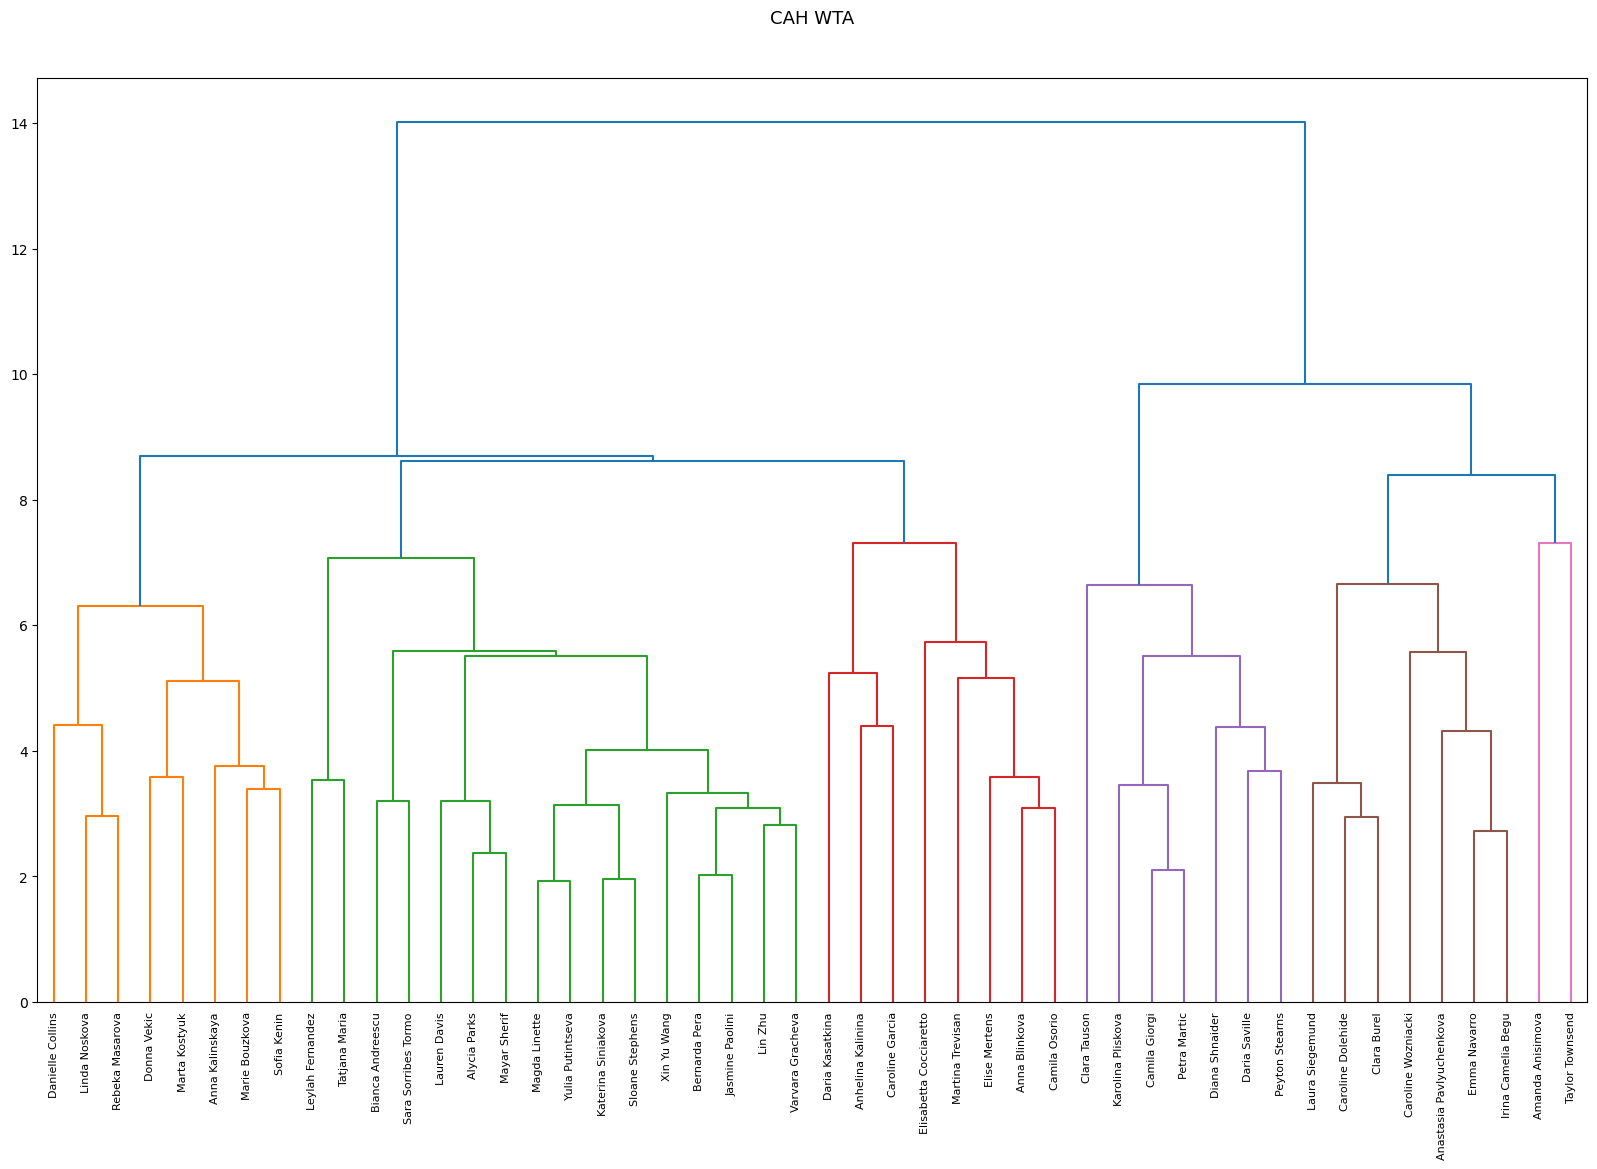

In [134]:
scal_f = pre.StandardScaler().fit_transform(bdd_f)
scal_f = pd.DataFrame(scal_f,index=bdd_f.index,columns=bdd_f.columns)

Zf = linkage(scal_f,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH WTA',y=1.05,fontsize=13)

dendrogram(Zf,labels=scal_f.index,leaf_font_size=8,color_threshold=8)

plt.show()

In [135]:
cah_cluster_f = fcluster(Zf,t=8,criterion='distance')
scal_f['cah cluster'] = cah_cluster_f
scal_f['cah cluster'] = scal_f['cah cluster'].astype('category')
scal_f.reset_index(inplace=True)
c1f = scal_f['cah cluster']==1
c2f = scal_f['cah cluster']==2
c3f = scal_f['cah cluster']==3
c4f = scal_f['cah cluster']==4
c5f = scal_f['cah cluster']==5
c6f = scal_f['cah cluster']==6

cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg_f = cah_cluster_mean_f.style.applymap(rg).applymap(lambda v: 'opacity: 50%;' if (v < 1) and (v > -1) else None
                                          ).applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
cah_cluster_mean_rg_f

C:\Users\narab\AppData\Local\Temp\ipykernel_9076\4285979001.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cah_cluster_mean_f = scal_f.groupby('cah cluster').mean().T


Le G1 montre uniquement des caractéristiques positives en %W, on devrait y trouver les meilleurs joueuses. Le G3 a de très bons %W avec également un nombre important de matchs disputés, sauf en TL III où son %W est très faible. Le G6 semble être le pire, mais il est composé de seulement 2 joueuses. Pour les G2, G4 et G5, c'est un peu plus mitigé.

In [136]:
scal_f['name'][c1f][scal_f['name'][c1f].isin(IV_wta)==True]

19       Donna Vekic
31     Linda Noskova
33    Marie Bouzkova
42       Sofia Kenin
Name: name, dtype: object

In [137]:
scal_f['name'][c1f][scal_f['name'][c1f].isin(IV_wta)==False]

5      Anna Kalinskaya
15    Danielle Collins
34       Marta Kostyuk
39     Rebeka Masarova
Name: name, dtype: object

**Vekic - 24e 42M 60%W**

Cas déjà étudié

**Noskova - 40e 38M 58%W**

En 0-5 TL I, 2-3 TL II, 2-1 TL III 1-3 TL IV, c'est mitigé. En 3-1 TL V, 12-3 TL VI et 2-0 TL VII, c'est excellent et cela rattrape le bilan mitigé contre la TL IV-, elle a sa place en TL IV 

**Bouzkova - 36e 41M 51%W**

En 2-3 TL I, 0-3 TL II, 0-3 TL III et 5-1 TL IV, c'est passable. En 4-6 TL V, 8-4 TL VI et 2-0 TL VII, c'est pas terrible et malheuresement ça l'empêchera d'obtenir une place en TL IV

<font color='red'> **Direction TL V**

**Kenin - 37e 39M 56%W**

Cas déjà étudié

&nbsp;

**Kalinskaya - 80e 27M 59%W**

Cas déjà étudié
    
<font color='green'> **Direction TL IV**    

**Collins - 54e 36M 50%W**

En 0-7 TL I, elle n'a pas forcément eut beaucoup de chance cette année sur les tirages. En 3-3 TL II, 1-2 TL III, 4-1 TL IV et 3-1 TL V, c'est bien et elle mérite sa place en TL IV

<font color='green'> **Direction TL IV**

**Kostyuk - 38e 42M 52%W**

En 1-3 TL I, 1-5 TL II, 2-7 TL III (soit un total de 4-15 TL III-) et 2-2 TL IV, c'est insuffisant pour la TL IV        

**Masarova - 65e 28M 57%W**

En 0-2 TL I, 1-1 TL II, 2-1 TL III et 1-2 TL IV, c'est très correct. En 4-2 TL IV, 7-4 TL VI et 1-0 TL VII, c'est passable.
    
Elle a pas énormement de matchs et ce n'est pas la plus connue, néanmoins le bilan est satisfaisant et elle mérite une place en TL IV
    
<font color='green'> **Direction TL IV**    

In [138]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(IV_wta)==True]

3     Anhelina Kalinina
11      Caroline Garcia
16      Daria Kasatkina
21        Elise Mertens
Name: name, dtype: object

In [139]:
scal_f['name'][c3f][scal_f['name'][c3f].isin(IV_wta)==False]

4              Anna Blinkova
9              Camila Osorio
20    Elisabetta Cocciaretto
35          Martina Trevisan
Name: name, dtype: object

**Kalinina - 27e 48M 52%W**

En 3-3 TL II, 3-3 TL III, c'est très solide. Par contre 1-6 TL IV, 7-6 TL V, 8-4 TL VI et 3-1 Tl VII, c'est pas terrible.

C'est une joueuse irrégulaire qui entre parfaitement dans la BlackList, ceci étant dit, elle a posé beaucoup de problèmes en TL II-III, certes le 1-6 TL IV et le 7-6 TL V font défauts, mais on peut la laisser en TL IV

**Garcia - 20e 59M 59%W**

Cas déjà étudié

**Kasatkina - 18e 60M 60%W**

Cas déjà étudié

**Mertens - 30e 46M 57%W**

Cas déjà étudié

&nbsp;

**Blinkova - 48e 48M 52%W**

En 0-4 TL I, 0-4 TL II, 0-1 TL III et 4-4 TL IV, c'est clairement insuffisant

**Osorio - 81e 30M 57%W**

En 0-3 TL I, 0-1 TL II, 0-1 TL III, 3-4 TL IV et 4-3 TL V, c'est aussi trop léger pour la TL IV

**Cocciaretto - 47e 35M 54%W**

En 0-2 TL I, 1-0 TL II, 0-2 TL III, 2-1 TL IV et 7-9 TL V, c'est également léger pour la TL IV

**Trevisan - 46e 36M 47%W**

En 0-3 TL I, 2-6 TL II, 2-2 TL IV et 4-4 TL V, une nouvelle fois, c'est trop léger pour la TL IV

In [140]:
scal_f['name'][c2f][scal_f['name'][c2f].isin(IV_wta)==True]

24     Jasmine Paolini
29    Leylah Fernandez
32       Magda Linette
Name: name, dtype: object

In [141]:
scal_f['name'][c2f][scal_f['name'][c2f].isin(IV_wta)==False]

0            Alycia Parks
6           Bernarda Pera
7        Bianca Andreescu
26     Katerina Siniakova
28           Lauren Davis
30                Lin Zhu
36           Mayar Sherif
40    Sara Sorribes Tormo
41        Sloane Stephens
43          Tatjana Maria
45       Varvara Gracheva
46            Xin Yu Wang
47       Yulia Putintseva
Name: name, dtype: object

**Paolini - 29e 46M 50%W**
    
En 0-4 TL I, 0-4 TL II, 3-3 TL III, 3-3 TL IV et 5-6 TL V, c'est insuffisant pour la TL IV       

<font color='red'> **Direction TL V**    

**Fernandez - 34e 46M 57%W**

En 0-1 TL I, 0-1 TL II, 4-5 TL III, 3-4 TL IV et 6-6 TL V, c'est plutôt mitigé. En 7-3 TL VI et 6-0 TL VII, on voit d'où sort son 57%W global et je pense c'est encore trop léger pour la TL IV
    
<font color='red'> **Direction TL V**        
    
**Linette - 22e 44M 50%W**
    
22e grâce à une demi-finale surprise à l'AO, son vrai niveau est très loin de son classement
    
En 0-3 TL I, 1-2 TL II, 3-3 TL III et 3-3 TL IV, c'est passable. En 6-3 TL V, 6-7 TL VI et 2-1 TL VII, c'est innacceptable et ce sera rédhibitoire pour une place en TL IV    
    
<font color='red'> **Direction TL V**
    
&nbsp;
    
**Parks - 84e 34M 38%W**
    
Ici, on a un cas passé sous les radars lors de la partie sur la TL VI et 38%W c'est trop peu pour figurer dans la TL V
    
<font color='red'> **Direction TL VI**    
    
**Pera - 69e 40M 48%W**
    
En 0-3 TL I, 0-3 TL II, 3-2 TL III, 2-2 TL IV et 3-6 TL V, c'est clairement insuffisant    
    
**Andreescu - 100e 29M 52%W**

En 0-2 TL I, 0-3 TL II, 2-2 TL III, 3-0 TL IV et 3-4 TL V , c'est passable. En 5-3 TL VI et 2-0 TL VII, c'est passable aussi. Rien d'execptionnel, c'est irrégulier mais c'est compétitif sur la TL III+, on peut accorder une petite place en TL IV à cette vainqueuse de l'US 2019
    
<font color='green'> **Direction TL IV**    

**Siniakova - 50e 34M 56%W**

En 0-2 TL I, 0-1 TL II, 3-3 TL III, 3-2 TL IV et 5-4 TL V, c'est passable. En 6-3 TL VI et 2-0 TL VII, c'est passable aussi. Elle peut prendre une petite place en TL IV
    
**Davis - 72e 29M 48%W**

Cas déjà étudé
    
**Zhu - 33e 48M 56%W**
    
En 0-2 TL I, 0-3 TL II, 3-3 TL III, 2-3 TL IV et 6-5 TL V, c'est passable. En 15-5 TL VI et 1-0 TL VII, c'est très bien et elle mérite une place en TL IV
    
<font color='green'> **TL IV**    
    
**Sherif - 59e 33M 36%W**
    
Un autre cas passé sous les radars de la TL VI
    
<font color='red'> **Direction TL VI**    

**Sorribes Tormo 53e 26M 65%W**

Déjà on a un %W global très élevé sur tout de même 26 matchs, elle devrait accéder à la TL IV sans soucis, mais c'est surtout pour la TL III que l'on sera attentif

En 0-2 TL I, 2-1 TL III, 2-1 TL IV, c'est correct. En 7-3 TL V, 2-2 TL VI et 4-0 TL VII, c'est correct.
    
Maintenant on voit qu'il y a déjà 4 victoires sur 26 matchs contre de la TL VII, elle joue essentiellement des 250 et des GC (1 défaite en M1000). Elle a très bien performé en 250, mais sa saison ne résume qu'à ça, il n'y a pas vraiment eut de prises de risque dans des 500 ou M1000, elle prend sa place en TL IV tout de même, mais elle est encore loin de la TL III   

<font color='green'> **Direction TL IV**

**Stephens - 44e 40M 50%W**

En 0-2 TL I, 0-1 TL II, 1-4 TL III, 3-3 TL IV et 8-6 TL V, c'est trop léger pour la TL IV
    
**Maria - 43e 48M 48%W**
    
En 0-9 TL III-, c'est clairement insuffisant    
    
**Gracheva - 42e 46M 52%W**
    
En 0-3 TL I, 1-2 TL II, 1-2 TL III, 4-3 TL IV et 6-8 TL V, c'est trop léger pour la TL IV    
    
**Xin Yu Wang - 35e 45M 53%W**
    
En 0-1 TL I, 0-3 TL II, 1-2 TL III, 4-3 TL IV, 3-8 TL V, également trop léger pour la TL IV  
    
**Putintseva - 63e 42M 52%W**

En 0-2 TL I, 1-2 TL II, 2-3 TL III, 2-3 TL IV et 6-5 TL V, c'est mitigé. En 8-5 TL VI et 3-0 TL VII, c'est pas exceptionnel non plus, elle restera en TL V    

In [142]:
scal_f['name'][c4f][scal_f['name'][c4f].isin(IV_wta)==True]

37    Petra Martic
Name: name, dtype: object

In [143]:
scal_f['name'][c4f][scal_f['name'][c4f].isin(IV_wta)==False]

8         Camila Giorgi
14         Clara Tauson
17        Daria Saville
18       Diana Shnaider
25    Karolina Pliskova
38       Peyton Stearns
Name: name, dtype: object

**Martic - 41e 37M 49%W**

En 0-4 TL I, 1-3 TL II, 2-3 TL III, 1-2 TL IV et 5-5 Tl V, c'est trop léger pour la TL IV
    
<font color='red'> **Direction TL V** 
    
&nbsp;
    
**Giorgi - 55e 33M 58%W**

En 0-2 TL I, 1-3 TL II, 1-2 TL III, 1-1 TL IV et 5-3 TL V, c'est correct. En 11-2 TL VI et 0-1 TL VII, c'est presque très bien, elle peut aller en TL IV
    
<font color='green'> **Direction TL IV**
    
**Tauson - 107e 15M 60%W**

Un très fort %W mais sur seulement 15M
    
En 1-0 TL II, 1-0 TL III et 1-1 TL IV, y a très peu de matchs mais c'est extrêment solide. En 2-3 TL V et 4-2 TL VI, c'est moyen. 
    
Une joueuse de 20 ans qui n'a pas beaucoup joué sur le circuit principal cette saison, elle qui avait atteint la 33e en février 2022. C'était une joueuse prometteuse à l'époque, ce doit toujours être le cas, son %W élevé n'est pas dû principalement à des victoires contre plus faible, elle peut prendre sa place en TL IV
    
<font color='green'> **Direction TL IV**
    
<font color='red'> **Saville - 209e 14M 43%W**
    
Elle n'était pas dans la partie Tier List VI car 209e ,une joueuse qu'on voit de temps, qui arrivait parfois à performer mais plutôt en 2022, là maintenant y a trop peu de matchs, le %W n'est pas terrible, elle n'a plus sa place en TL V
    
**Direction TL VI ou plutôt TL VII**    

**Shnaider - 97e 26M 58%W**

En 1-1 TL II, 1-4 TL III et 0-2 TL IV, ça semble trop léger pour la TL IV

**Pliskova - 39e 35M 46%W**

En 0-3 TL I, 1-4 TL II, 3-2 TL III et 2-3 TL IV, c'est très moyen. En 5-3 TL V, 4-2 Tl VI et 1-2 TL VII, c'est pas bon.
    
Ancienne n°1 mondiale (on se demande encore comment), mais c'était une autre époque, elle n'a pas sa place en TL IV    

**Stearns - 49e 29M 52%W**

En 0-1 TL I, 1-2 TL II, 1-4 TL IV et 3-4 TL V, c'est insuffisant   

In [144]:
scal_f['name'][c5f][scal_f['name'][c5f].isin(IV_wta)==True]

2    Anastasia Pavlyuchenkova
Name: name, dtype: object

In [145]:
scal_f['name'][c5f][scal_f['name'][c5f].isin(IV_wta)==False]

10     Caroline Dolehide
12    Caroline Wozniacki
13           Clara Burel
22          Emma Navarro
23    Irina Camelia Begu
27       Laura Siegemund
Name: name, dtype: object

**Pavlyuchenkova - 60e 26M 54%W**

En 0-1 TL I, 0-2 TL II, 4-3 TL III et 4-1 TL IV, c'est correct. En 0-4 TL V, 4-1 TL VI et 2-0 TL VII, c'est pas bon.

Ici c'est compliqué, on va dire que le 0-4 TL s'annule avec le 4-1 TL IV, Ensuite 0-3 TL II-, c'est pardonnable, puis 4-3 TL III et 6-1 TL VI+ c'est honorable. Elle a eut des difficultés ces dernières années, elle revient petit à petit et dans l'ensemble, elle reste une joueuse ± dangereuse et peut garder sa place en TL IV

&nbsp;

**Dolehide - 45e 14M 64%W**

Un %W très élevé, mais sur très peu de matchs, finaliste du "M1000" de Guadalajara, c'est très bien.

Elle est en 5-0 TL VI+, ce qui fait que ensuite elle est en 4-5 TL V-, ça fait vraiment peu de matchs et on est loin d'une petit superioté pour espérer une place en TL IV

**Wozniacki - 256e 7M 57%W**

Retour après une longue absence (maternité), ancienne n°1 mondiale, elle revient sans être catastrophique, la place en TL V lui sied déjà parfaitement

**Burel - 56e 25M 60%W**

En 0-1 TL I, 0-2 TL II, 1-1 TL III, 0-1 TL IV et 4-5 TL V, c'est pas assez fort pour la TL IV 

**Navarro - 31e 29M 52%W**

En 1-1 TL II, 1-2 TL III, 1-5 TL IV et 0-4 TL V, c'est clairement insuffisant pour la TL IV. La question pourrait se pose également pour la TL V, mais elle est 31e, on va lui laisser cette place 

**Begu - 79e 26M 50%W**

Cas déjà étudié

**Siegemund - 92e 23M 57%W**

Cas déjà étudié

In [146]:
scal_f['name'][c6f]

1     Amanda Anisimova
44     Taylor Townsend
Name: name, dtype: object

**Anisimova - 373e 8M 25%W**

Encore un cas passé sous les radars, si elle est en forme, c'est une joueuse redoutable qui a déjà fait une demie-finale à RG, un QF à Wimbledon, mais là seulement 8 matchs et 25%W, elle n'a malheureusement pas sa place en TL V

<font color='red'> **Direction TL VI ou plutôt TL VII**

**Townsend - 82e 15M 53%W**

Très peu de matchs également, elle est revenu après une pause maternité. Elle ne pourra pas prétendre à une place en TL IV, mais elle peut garder sa place en TL V

&nbsp;
    
### Récapitulatif
    
<font color='green'>**Promotion en TL IV :**

- Kalinskaya    
- Collins    
- Masarova    
- Andreescu
- Zhu    
- Sorribes    
- Giorgi
- Tauson    
    
<font color='red'>**Relégation en TL V :**

- Bouzkova    
- Paolini    
- Fernandez    
- Linette    
- Martic
    
<font color='red'>**Relégation en TL VI+ :**
    
- Parks
- Sherif
- Saville    
- Anisimova    
        

In [147]:
IV_wta = ['Anhelina Kalinina','Elise Mertens','Sofia Kenin','Linda Noskova','Anastasia Pavlyuchenkova','Caroline Garcia',
          'Donna Vekic','Daria Kasatkina','Anna Kalinskaya','Danielle Collins','Rebeka Masarova','Bianca Andreescu',
          'Lin Zhu','Sara Sorribes Tormo','Camila Giorgi','Clara Tauson']           
V_wta = ['Emma Navarro','Xin Yu Wang','Karolina Pliskova','Marta Kostyuk','Martina Trevisan','Varvara Gracheva',
         'Caroline Dolehide','Katerina Siniakova','Sloane Stephens','Elisabetta Cocciaretto','Peyton Stearns','Anna Blinkova',
         'Tatjana Maria','Bernarda Pera','Yulia Putintseva','Lauren Davis','Irina Camelia Begu','Taylor Townsend',
         'Caroline Wozniacki','Camila Osorio','Diana Shnaider','Clara Burel','Laura Siegemund']
TL_wta = I_wta + II_wta + III_wta + IV_wta + V_wta

In [148]:
atp_pr['tier_list'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                       'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_pr['name'],atp_pr['rank'])]
wta_pr['tier_list'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                       'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_pr['name'],wta_pr['rank'])]
atp_matches['winner_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                            'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['winner_name'],atp_matches['winner_rank'])]
atp_matches['loser_tl'] = ['I' if i in I_atp else 'II' if i in II_atp else 'III' if i in III_atp else 'IV' if i in IV_atp else
                           'V' if i in V_atp else 'VI' if j<200 else 'VII' for i,j in zip(atp_matches['loser_name'],atp_matches['loser_rank'])]
wta_matches['winner_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                            'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['winner_name'],wta_matches['winner_rank'])]
wta_matches['loser_tl'] = ['I' if i in I_wta else 'II' if i in II_wta else 'III' if i in III_wta else 'IV' if i in IV_wta else
                           'V' if i in V_wta else 'VI' if j<200 else 'VII' for i,j in zip(wta_matches['loser_name'],wta_matches['loser_rank'])]
atp_pr['genre'] = 'H'
wta_pr['genre'] = 'F'

tennis_p = pd.concat([atp_pr,wta_pr])
tennis_m = pd.concat([atp_matches,wta_matches])
tennis_m.drop(columns={'winner_name','loser_name','tourney_name','tourney_date','winner_ioc','winner_age','loser_ioc','loser_age','round','score','winner_rank',
                       'loser_rank','match_num'},inplace=True)
tennis_w = tennis_m.drop(columns={'loser_id'}).copy()
tennis_w['win'] = 1
tennis_w = tennis_w.groupby(by=['winner_id','surface','tourney_level','loser_tl'],as_index=False).sum()
tennis_l = tennis_m.drop(columns={'winner_id'}).copy()
tennis_l['lose'] = 1
tennis_l = tennis_l.groupby(by=['loser_id','surface','tourney_level','winner_tl'],as_index=False).sum()
tennis_w.rename(columns={'winner_id':'player_id','loser_tl':'tier_list'},inplace=True)
tennis_l.rename(columns={'loser_id':'player_id','winner_tl':'tier_list'},inplace=True)
tennis_wl = pd.merge(tennis_w,tennis_l,how='outer',on=['player_id','tourney_level','surface','tier_list'])
tennis_wl.fillna(0,inplace=True)
tennis_wl['win'] = np.int64(tennis_wl['win'])
tennis_wl['lose'] = np.int64(tennis_wl['lose'])

In [149]:
#Sauvegarde de la BDD en fichier CSV
tennis_wl.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_winlose.csv",index=False)
tennis_p.to_csv("C:\\Users\\narab\\OneDrive\\Documents\\Data Analyse\\Tennis\\Tennis_player.csv",index=False)

Toutes les TL sont maintenant ajustées, ce qui rendra mon outils sur Tableau plus pertinent.

Toutefois, il reste des axes d'améliorations pour la TL à étudier (TL par surface, découpage de l'année en plusieurs segments, retour après une longue absence, etc...) 